# Nucleotide diversity 
  
**Author**: Katarina Braun   

## Overview
- The purpose of this script is to generate genewise nucleotide diversity (π) using the SNPGenie script and then to gnerate plots to visualize and compare genewise πS (synonymous diversity) and πN (nonsynonymous diversity). 

First, this notebook will go over syntax to run (SNPGenie)[https://github.com/chasewnelson/SNPGenie]. SNPGenie is a collection of Perl scripts for estimating πN/πS, dN/dS, and gene diversity from next-generation sequencing (NGS) single-nucleotide polymorphism (SNP) variant data. 

WITHIN-POOL ANALYSIS. Use snpgenie.pl, the original SNPGenie. Analyzes within-sample πN/πS from pooled NGS SNP data. SNP reports (VCF) must each correspond to a single population/pool, with variants called relative to one reference sequence (one sequence in one FASTA file).

Here's the syntax for running SNPGenie that I am using: 

```bash
perl snpgenie.pl --vcfformat=4 --snpreport=path/to/SNPREPORT.vcf --fastafile=path/to/ref.fasta --gtffile=/path/to/GTF.gtf

```
This notebook will take raw diveristy (π) data and generate plots to visualize and compare genewise πS (synonymous diveristy) and πN(nonsynonymous diversity). 
- will plot π, pulled from `population_summary.txt` files -- fifth column 
- plot each gene within each sample

### Reference 

Everything was mapped to the Japan reference sequence (MW219695.1) -- this is the consensus sequence for the inoculum that was used to infect the cats we are evaluating here. 

Nucleotide numbering scheme will therefore differ from the the numbering scheme used in Nextstrain. 

[Link](https://www.ncbi.nlm.nih.gov/nuccore/MW219695.1) to GenBank accession page for the reference sequence.

[Link](https://www.nejm.org/doi/full/10.1056/nejmc2013400) to the original NEJM report on transmission of SARS-CoV-2 in domestic cats by Halfmann et al. 


## Transmission events: 
1. pair 1 day 2 --> day 3
2. pair 2 day 5 --> day 6 
3. pair 3 day 4 --> day 5

## Input: 

1. Cleaned vcf files: 
    - `SARSCoV2_transmission_in_domestic_cats/data_derived/cleaned/*`

## Output: 

1. Figures showing variants frequencies over time:   
     - `SARSCoV2_in_domestic_cats/figure/*`



### import modules and dependencies

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import os
import seaborn as sns; sns.set()
from matplotlib import pyplot
import matplotlib.pyplot as plt
from functools import reduce
import matplotlib as mpl
from matplotlib import gridspec
import itertools
import pysam
import matplotlib.patches as mpatches
import random 
from pylab import *
from matplotlib.font_manager import FontProperties 
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
from matplotlib import gridspec
from matplotlib.colors import ListedColormap
import matplotlib.patches as patches
from scipy.stats import ttest_ind

# Generate diversity statistics by running SNPGenie on each sample

In [2]:
%%bash 

# cat 1 

perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/1_1A.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/1_1A'
perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/1_1B.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/1_1B'

perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/1_2A.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/1_2A'
perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/1_2B.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/1_2B'

perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/1_3A.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/1_3A'
perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/1_3B.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/1_3B'

perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/1_4A.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/1_4A'
perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/1_4B.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/1_4B'

perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/1_5A.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/1_5A'
perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/1_5B.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/1_5B'

perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/1_6A.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/1_6A'
perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/1_6B.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/1_6B'

perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/1_7A.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/1_7A'
perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/1_7B.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/1_7B'

perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/1_8A.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/1_8A'
perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/1_8B.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/1_8B'

###


output_folder is /Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/1_1A


################################################################################
##                                                                            ##
##                             SNPGenie Initiated!                            ##
##                                                                            ##
################################################################################

  ###############################  LICENSE:  #################################
  ##            SNPGenie Copyright (C) 2015-18 Chase W. Nelson              ##
  ##            This program comes with ABSOLUTELY NO WARRANTY;             ##
  ##     This is free software, and you are welcome to redistribute it      ##
  ##               under certain conditions; see LICENSE.txt.               ##
  #########################

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
%%bash 

# cat 2 

perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/2_1A.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/2_1A'
perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/2_1B.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/2_1B'

perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/2_2A.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/2_2A'
perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/2_2B.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/2_2B'

perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/2_3A.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/2_3A'
perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/2_3B.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/2_3B'

perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/2_4A.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/2_4A'
perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/2_4B.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/2_4B'

perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/2_5A.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/2_5A'
perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/2_5B.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/2_5B'

perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/2_6A.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/2_6A'
perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/2_6B.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/2_6B'

perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/2_7A.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/2_7A'
perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/2_7B.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/2_7B'

perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/2_8A.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/2_8A'
perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/2_8B.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/2_8B'

###


output_folder is /Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/2_1A


################################################################################
##                                                                            ##
##                             SNPGenie Initiated!                            ##
##                                                                            ##
################################################################################

  ###############################  LICENSE:  #################################
  ##            SNPGenie Copyright (C) 2015-18 Chase W. Nelson              ##
  ##            This program comes with ABSOLUTELY NO WARRANTY;             ##
  ##     This is free software, and you are welcome to redistribute it      ##
  ##               under certain conditions; see LICENSE.txt.               ##
  #########################

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
%%bash 

# cat 3 

perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/3_1A.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/3_1A'
perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/3_1B.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/3_1B'

perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/3_2A.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/3_2A'
perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/3_2B.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/3_2B'

perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/3_3A.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/3_3A'
perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/3_3B.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/3_3B'

perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/3_4A.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/3_4A'
perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/3_4B.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/3_4B'

perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/3_5A.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/3_5A'
perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/3_5B.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/3_5B'

perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/3_6A.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/3_6A'
perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/3_6B.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/3_6B'

perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/3_7A.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/3_7A'
perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/3_7B.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/3_7B'

perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/3_8A.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/3_8A'
perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/3_8B.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/3_8B'

###

In [45]:
%%bash 

# cat 4

perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/4_3A.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/4_3A'
perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/4_3B.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/4_3B'

perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/4_4A.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/4_4A'
perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/4_4B.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/4_4B'

perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/4_5A.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/4_5A'
perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/4_5B.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/4_5B'

perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/4_6A.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/4_6A'
perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/4_6B.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/4_6B'

perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/4_7A.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/4_7A'
perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/4_7B.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/4_7B'

perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/4_8A.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/4_8A'
perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/4_8B.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/4_8B'

perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/4_9A.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/4_9A'
perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/4_9B.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/4_9B'

perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/4_10A.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/4_10A'
perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/4_10B.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/4_10B'


###


output_folder is /Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_in_domestic_cats/data_derived/relative_to_tokyo/diversity_without_primer_binding_sites/4_3A


################################################################################
##                                                                            ##
##                             SNPGenie Initiated!                            ##
##                                                                            ##
################################################################################

  ###############################  LICENSE:  #################################
  ##            SNPGenie Copyright (C) 2015-18 Chase W. Nelson              ##
  ##            This program comes with ABSOLUTELY NO WARRANTY;             ##
  ##     This is free software, and you are welcome to redistribute it      ##
  ##               under certain conditions; see LICENSE.txt.           

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [47]:
%%bash 

# cat 5

perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/5_3A.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/5_3A'
perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/5_3B.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/5_3B'

perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/5_4A.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/5_4A'
perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/5_4B.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/5_4B'

perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/5_5A.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/5_5A'
perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/5_5B.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/5_5B'

perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/5_6A.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/5_6A'
perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/5_6B.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/5_6B'

perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/5_7A.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/5_7A'
perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/5_7B.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/5_7B'

perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/5_8A.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/5_8A'
perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/5_8B.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/5_8B'

perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/5_9A.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/5_9A'
perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/5_9B.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/5_9B'

perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/5_10A.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/5_10A'
perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/5_10B.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/5_10B'


###


output_folder is /Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_in_domestic_cats/data_derived/relative_to_tokyo/diversity_without_primer_binding_sites/5_3A


################################################################################
##                                                                            ##
##                             SNPGenie Initiated!                            ##
##                                                                            ##
################################################################################

  ###############################  LICENSE:  #################################
  ##            SNPGenie Copyright (C) 2015-18 Chase W. Nelson              ##
  ##            This program comes with ABSOLUTELY NO WARRANTY;             ##
  ##     This is free software, and you are welcome to redistribute it      ##
  ##               under certain conditions; see LICENSE.txt.           

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [48]:
%%bash 

# cat 6

perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/6_3A.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/6_3A'
perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/6_3B.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/6_3B'

perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/6_4A.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/6_4A'
perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/6_4B.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/6_4B'

perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/6_5A.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/6_5A'
perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/6_5B.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/6_5B'

perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/6_6A.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/6_6A'
perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/6_6B.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/6_6B'

perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/6_7A.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/6_7A'
perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/6_7B.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/6_7B'

perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/6_8A.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/6_8A'
perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/6_8B.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/6_8B'

perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/6_9A.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/6_9A'
perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/6_9B.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/6_9B'

perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/6_10A.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/6_10A'
perl snpgenie.pl --vcfformat=4 --snpreport='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/6_10B.vcf.recode.vcf' --fastafile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/MW219695.1.fasta' --gtffile='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/MW219695.1/genes.gtf' --o='/Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_transmission_in_domestic_cats/data_derived/diversity/6_10B'


###


output_folder is /Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_in_domestic_cats/data_derived/relative_to_tokyo/diversity_without_primer_binding_sites/6_3A


################################################################################
##                                                                            ##
##                             SNPGenie Initiated!                            ##
##                                                                            ##
################################################################################

  ###############################  LICENSE:  #################################
  ##            SNPGenie Copyright (C) 2015-18 Chase W. Nelson              ##
  ##            This program comes with ABSOLUTELY NO WARRANTY;             ##
  ##     This is free software, and you are welcome to redistribute it      ##
  ##               under certain conditions; see LICENSE.txt.           



## WARNING:
## The SNP Report /Volumes/GoogleDrive/Shared drives/2019-nCoV open research team/Sequencing Data/Cats/SARSCoV2_in_domestic_cats/data_derived/relative_to_tokyo/6_3A.vcf.recode.vcf has no header.
## TERMINATED.


## WARNING: Conflicting coverages reported at temp_vcf4_6-3C-B.vcf|gene-ORF1ab|520
## An averaging has taken place.

## WARNING: Conflicting coverages reported at temp_vcf4_6-3C-B.vcf|gene-ORF1ab|520
## An averaging has taken place.

## WARNING: Conflicting coverages reported at temp_vcf4_6-3C-B.vcf|gene-ORF1ab|4845
## An averaging has taken place.

## WARNING: Conflicting coverages reported at temp_vcf4_6-3C-B.vcf|gene-ORF1ab|4845
## An averaging has taken place.

## WARNING: Conflicting coverages reported at temp_vcf4_6-3C-B.vcf|gene-ORF1ab|13357
## An averaging has taken place.

## WARNING: Conflicting coverages reported at temp_vcf4_6-3C-B.vcf|gene-ORF1ab|13357
## An averaging has taken place.

## WARNING: Conflicting coverages reported at temp_vcf4_6-3C-B.vcf

In [38]:
# load SNPGenie π output files 
# cat 1, replicate A

pd.options.display.float_format = '{:3,.12f}'.format

reorderlist = ['gene-orf1ab', 'gene-S', 'gene-ORF3a', 'gene-E', 'gene-M', 'gene-ORF6', 'gene-ORF7a', 'gene-ORF8', 'gene-N', 'gene-ORF10']

rep1_1_1 = pd.read_csv('../data_derived/diversity/1_1A/product_results.txt', header=0, sep='\t', low_memory=False)
rep1_1_1 = rep1_1_1.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep1_1_1 = rep1_1_1.set_index('product')
rep1_1_1 = rep1_1_1.reindex(reorderlist)
rep1_1_1 = rep1_1_1.astype(float)
rep1_1_1.rename(columns={'piN':'piN_1'}, inplace=True)
rep1_1_1.to_csv('../data_derived/diversity/π/rep1_1_1.csv', sep='\t')

rep1_1_2 = pd.read_csv('../data_derived/diversity/1_2A/product_results.txt', header=0, sep='\t', low_memory=False)
rep1_1_2 = rep1_1_2.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep1_1_2 = rep1_1_2.set_index('product')
rep1_1_2 = rep1_1_2.reindex(reorderlist)
rep1_1_2 = rep1_1_2.astype(float)
rep1_1_2.rename(columns={'piN':'piN_1'}, inplace=True)
rep1_1_2.to_csv('../data_derived/diversity/π/rep1_1_2.csv', sep='\t')

rep1_1_3 = pd.read_csv('../data_derived/diversity/1_3A/product_results.txt', header=0, sep='\t', low_memory=False)
rep1_1_3 = rep1_1_3.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep1_1_3 = rep1_1_3.set_index('product')
rep1_1_3 = rep1_1_3.reindex(reorderlist)
rep1_1_3 = rep1_1_3.astype(float)
rep1_1_3.rename(columns={'piN':'piN_1'}, inplace=True)
rep1_1_3.to_csv('../data_derived/diversity/π/rep1_1_3.csv', sep='\t')

rep1_1_4 = pd.read_csv('../data_derived/diversity/1_4A/product_results.txt', header=0, sep='\t', low_memory=False)
rep1_1_4 = rep1_1_4.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep1_1_4 = rep1_1_4.set_index('product')
rep1_1_4 = rep1_1_4.reindex(reorderlist)
rep1_1_4 = rep1_1_4.astype(float)
rep1_1_4.rename(columns={'piN':'piN_1'}, inplace=True)
rep1_1_4.to_csv('../data_derived/diversity/π/rep1_1_4.csv', sep='\t')

rep1_1_5 = pd.read_csv('../data_derived/diversity/1_5A/product_results.txt', header=0, sep='\t', low_memory=False)
rep1_1_5 = rep1_1_5.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep1_1_5 = rep1_1_5.set_index('product')
rep1_1_5 = rep1_1_5.reindex(reorderlist)
rep1_1_5 = rep1_1_5.astype(float)
rep1_1_5.rename(columns={'piN':'piN_1'}, inplace=True)
rep1_1_5.to_csv('../data_derived/diversity/π/rep1_1_5.csv', sep='\t')

rep1_1_6 = pd.read_csv('../data_derived/diversity/1_6A/product_results.txt', header=0, sep='\t', low_memory=False)
rep1_1_6 = rep1_1_6.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep1_1_6 = rep1_1_6.set_index('product')
rep1_1_6 = rep1_1_6.reindex(reorderlist)
rep1_1_6 = rep1_1_6.astype(float)
rep1_1_6.rename(columns={'piN':'piN_1'}, inplace=True)
rep1_1_6.to_csv('../data_derived/diversity/π/rep1_1_6.csv', sep='\t')

rep1_1_7 = pd.read_csv('../data_derived/diversity/1_7A/product_results.txt', header=0, sep='\t', low_memory=False)
rep1_1_7 = rep1_1_7.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep1_1_7 = rep1_1_7.set_index('product')
rep1_1_7 = rep1_1_7.reindex(reorderlist)
rep1_1_7 = rep1_1_7.astype(float)
rep1_1_7.rename(columns={'piN':'piN_1'}, inplace=True)
rep1_1_7.to_csv('../data_derived/diversity/π/rep1_1_7.csv', sep='\t')

rep1_1_8 = pd.read_csv('../data_derived/diversity/1_8A/product_results.txt', header=0, sep='\t', low_memory=False)
rep1_1_8 = rep1_1_8.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep1_1_8 = rep1_1_8.set_index('product')
rep1_1_8 = rep1_1_8.reindex(reorderlist)
rep1_1_8 = rep1_1_8.astype(float)
rep1_1_8.rename(columns={'piN':'piN_1'}, inplace=True)
rep1_1_8.to_csv('../data_derived/diversity/π/rep1_1_8.csv', sep='\t')

#

In [39]:
# load SNPGenie π output files 
# cat 1, replicate B

pd.options.display.float_format = '{:3,.12f}'.format

reorderlist = ['gene-orf1ab', 'gene-S', 'gene-ORF3a', 'gene-E', 'gene-M', 'gene-ORF6', 'gene-ORF7a', 'gene-ORF8', 'gene-N', 'gene-ORF10']

rep2_1_1 = pd.read_csv('../data_derived/diversity/1_1B/product_results.txt', header=0, sep='\t', low_memory=False)
rep2_1_1 = rep2_1_1.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep2_1_1 = rep2_1_1.set_index('product')
rep2_1_1 = rep2_1_1.reindex(reorderlist)
rep2_1_1 = rep2_1_1.astype(float)
rep2_1_1.rename(columns={'piN':'piN_2'}, inplace=True)
rep2_1_1.to_csv('../data_derived/diversity/π/rep2_1_1.csv', sep='\t')

rep2_1_2 = pd.read_csv('../data_derived/diversity/1_2B/product_results.txt', header=0, sep='\t', low_memory=False)
rep2_1_2 = rep2_1_2.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep2_1_2 = rep2_1_2.set_index('product')
rep2_1_2 = rep2_1_2.reindex(reorderlist)
rep2_1_2 = rep2_1_2.astype(float)
rep2_1_2.rename(columns={'piN':'piN_2'}, inplace=True)
rep2_1_2.to_csv('../data_derived/diversity/π/rep2_1_2.csv', sep='\t')

rep2_1_3 = pd.read_csv('../data_derived/diversity/1_3B/product_results.txt', header=0, sep='\t', low_memory=False)
rep2_1_3 = rep2_1_3.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep2_1_3 = rep2_1_3.set_index('product')
rep2_1_3 = rep2_1_3.reindex(reorderlist)
rep2_1_3 = rep2_1_3.astype(float)
rep2_1_3.rename(columns={'piN':'piN_2'}, inplace=True)
rep2_1_3.to_csv('../data_derived/diversity/π/rep2_1_3.csv', sep='\t')

rep2_1_4 = pd.read_csv('../data_derived/diversity/1_4B/product_results.txt', header=0, sep='\t', low_memory=False)
rep2_1_4 = rep2_1_4.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep2_1_4 = rep2_1_4.set_index('product')
rep2_1_4 = rep2_1_4.reindex(reorderlist)
rep2_1_4 = rep2_1_4.astype(float)
rep2_1_4.rename(columns={'piN':'piN_2'}, inplace=True)
rep2_1_4.to_csv('../data_derived/diversity/π/rep2_1_4.csv', sep='\t')

rep2_1_5 = pd.read_csv('../data_derived/diversity/1_5B/product_results.txt', header=0, sep='\t', low_memory=False)
rep2_1_5 = rep2_1_5.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep2_1_5 = rep2_1_5.set_index('product')
rep2_1_5 = rep2_1_5.reindex(reorderlist)
rep2_1_5 = rep2_1_5.astype(float)
rep2_1_5.rename(columns={'piN':'piN_2'}, inplace=True)
rep2_1_5.to_csv('../data_derived/diversity/π/rep2_1_5.csv', sep='\t')

rep2_1_6 = pd.read_csv('../data_derived/diversity/1_6B/product_results.txt', header=0, sep='\t', low_memory=False)
rep2_1_6 = rep2_1_6.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep2_1_6 = rep2_1_6.set_index('product')
rep2_1_6 = rep2_1_6.reindex(reorderlist)
rep2_1_6 = rep2_1_6.astype(float)
rep2_1_6.rename(columns={'piN':'piN_2'}, inplace=True)
rep2_1_6.to_csv('../data_derived/diversity/π/rep2_1_6.csv', sep='\t')

rep2_1_7 = pd.read_csv('../data_derived/diversity/1_7B/product_results.txt', header=0, sep='\t', low_memory=False)
rep2_1_7 = rep2_1_7.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep2_1_7 = rep2_1_7.set_index('product')
rep2_1_7 = rep2_1_7.reindex(reorderlist)
rep2_1_7 = rep2_1_7.astype(float)
rep2_1_7.rename(columns={'piN':'piN_2'}, inplace=True)
rep2_1_7.to_csv('../data_derived/diversity/π/rep2_1_7.csv', sep='\t')

rep2_1_8 = pd.read_csv('../data_derived/diversity/1_8B/product_results.txt', header=0, sep='\t', low_memory=False)
rep2_1_8 = rep2_1_8.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep2_1_8 = rep2_1_8.set_index('product')
rep2_1_8 = rep2_1_8.reindex(reorderlist)
rep2_1_8 = rep2_1_8.astype(float)
rep2_1_8.rename(columns={'piN':'piN_2'}, inplace=True)
rep2_1_8.to_csv('../data_derived/diversity/π/rep2_1_8.csv', sep='\t')

#

In [15]:
# load SNPGenie π output files 
# cat 2, replicate A

pd.options.display.float_format = '{:3,.12f}'.format

reorderlist = ['gene-orf1ab', 'gene-S', 'gene-ORF3a', 'gene-E', 'gene-M', 'gene-ORF6', 'gene-ORF7a', 'gene-ORF8', 'gene-N', 'gene-ORF10']

rep1_2_1 = pd.read_csv('../data_derived/diversity/2_1A/product_results.txt', header=0, sep='\t', low_memory=False)
rep1_2_1 = rep1_2_1.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep1_2_1 = rep1_2_1.set_index('product')
rep1_2_1 = rep1_2_1.reindex(reorderlist)
rep1_2_1 = rep1_2_1.astype(float)
rep1_2_1.rename(columns={'piN':'piN_1'}, inplace=True)
rep1_2_1.to_csv('../data_derived/diversity/π/rep1_2_1.csv', sep='\t')

rep1_2_2 = pd.read_csv('../data_derived/diversity/2_2A/product_results.txt', header=0, sep='\t', low_memory=False)
rep1_2_2 = rep1_2_2.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep1_2_2 = rep1_2_2.set_index('product')
rep1_2_2 = rep1_2_2.reindex(reorderlist)
rep1_2_2 = rep1_2_2.astype(float)
rep1_2_2.rename(columns={'piN':'piN_1'}, inplace=True)
rep1_2_2.to_csv('../data_derived/diversity/π/rep1_2_2.csv', sep='\t')

rep1_2_3 = pd.read_csv('../data_derived/diversity/2_3A/product_results.txt', header=0, sep='\t', low_memory=False)
rep1_2_3 = rep1_2_3.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep1_2_3 = rep1_2_3.set_index('product')
rep1_2_3 = rep1_2_3.reindex(reorderlist)
rep1_2_3 = rep1_2_3.astype(float)
rep1_2_3.rename(columns={'piN':'piN_1'}, inplace=True)
rep1_2_3.to_csv('../data_derived/diversity/π/rep1_2_3.csv', sep='\t')

rep1_2_4 = pd.read_csv('../data_derived/diversity/2_4A/product_results.txt', header=0, sep='\t', low_memory=False)
rep1_2_4 = rep1_2_4.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep1_2_4 = rep1_2_4.set_index('product')
rep1_2_4 = rep1_2_4.reindex(reorderlist)
rep1_2_4 = rep1_2_4.astype(float)
rep1_2_4.rename(columns={'piN':'piN_1'}, inplace=True)
rep1_2_4.to_csv('../data_derived/diversity/π/rep1_2_4.csv', sep='\t')

rep1_2_5 = pd.read_csv('../data_derived/diversity/2_5A/product_results.txt', header=0, sep='\t', low_memory=False)
rep1_2_5 = rep1_2_5.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep1_2_5 = rep1_2_5.set_index('product')
rep1_2_5 = rep1_2_5.reindex(reorderlist)
rep1_2_5 = rep1_2_5.astype(float)
rep1_2_5.rename(columns={'piN':'piN_1'}, inplace=True)
rep1_2_5.to_csv('../data_derived/diversity/π/rep1_2_5.csv', sep='\t')

rep1_2_6 = pd.read_csv('../data_derived/diversity/2_6A/product_results.txt', header=0, sep='\t', low_memory=False)
rep1_2_6 = rep1_2_6.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep1_2_6 = rep1_2_6.set_index('product')
rep1_2_6 = rep1_2_6.reindex(reorderlist)
rep1_2_6 = rep1_2_6.astype(float)
rep1_2_6.rename(columns={'piN':'piN_1'}, inplace=True)
rep1_2_6.to_csv('../data_derived/diversity/π/rep1_2_6.csv', sep='\t')

rep1_2_7 = pd.read_csv('../data_derived/diversity/2_7A/product_results.txt', header=0, sep='\t', low_memory=False)
rep1_2_7 = rep1_2_7.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep1_2_7 = rep1_2_7.set_index('product')
rep1_2_7 = rep1_2_7.reindex(reorderlist)
rep1_2_7 = rep1_2_7.astype(float)
rep1_2_7.rename(columns={'piN':'piN_1'}, inplace=True)
rep1_2_7.to_csv('../data_derived/diversity/π/rep1_2_7.csv', sep='\t')

rep1_2_8 = pd.read_csv('../data_derived/diversity/2_8A/product_results.txt', header=0, sep='\t', low_memory=False)
rep1_2_8 = rep1_2_8.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep1_2_8 = rep1_2_8.set_index('product')
rep1_2_8 = rep1_2_8.reindex(reorderlist)
rep1_2_8 = rep1_2_8.astype(float)
rep1_2_8.rename(columns={'piN':'piN_1'}, inplace=True)
rep1_2_8.to_csv('../data_derived/diversity/π/rep1_2_8.csv', sep='\t')

#

In [16]:
# load SNPGenie π output files 
# cat 2, replicate B

pd.options.display.float_format = '{:3,.12f}'.format

reorderlist = ['gene-orf1ab', 'gene-S', 'gene-ORF3a', 'gene-E', 'gene-M', 'gene-ORF6', 'gene-ORF7a', 'gene-ORF8', 'gene-N', 'gene-ORF10']

rep2_2_1 = pd.read_csv('../data_derived/diversity/2_1B/product_results.txt', header=0, sep='\t', low_memory=False)
rep2_2_1 = rep2_2_1.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep2_2_1 = rep2_2_1.set_index('product')
rep2_2_1 = rep2_2_1.reindex(reorderlist)
rep2_2_1 = rep2_2_1.astype(float)
rep2_2_1.rename(columns={'piN':'piN_2'}, inplace=True)
rep2_2_1.to_csv('../data_derived/diversity/π/rep2_2_1.csv', sep='\t')

rep2_2_2 = pd.read_csv('../data_derived/diversity/2_2B/product_results.txt', header=0, sep='\t', low_memory=False)
rep2_2_2 = rep2_2_2.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep2_2_2 = rep2_2_2.set_index('product')
rep2_2_2 = rep2_2_2.reindex(reorderlist)
rep2_2_2 = rep2_2_2.astype(float)
rep2_2_2.rename(columns={'piN':'piN_2'}, inplace=True)
rep2_2_2.to_csv('../data_derived/diversity/π/rep2_2_2.csv', sep='\t')

rep2_2_3 = pd.read_csv('../data_derived/diversity/2_3B/product_results.txt', header=0, sep='\t', low_memory=False)
rep2_2_3 = rep2_2_3.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep2_2_3 = rep2_2_3.set_index('product')
rep2_2_3 = rep2_2_3.reindex(reorderlist)
rep2_2_3 = rep2_2_3.astype(float)
rep2_2_3.rename(columns={'piN':'piN_2'}, inplace=True)
rep2_2_3.to_csv('../data_derived/diversity/π/rep2_2_3.csv', sep='\t')

rep2_2_4 = pd.read_csv('../data_derived/diversity/2_4B/product_results.txt', header=0, sep='\t', low_memory=False)
rep2_2_4 = rep2_2_4.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep2_2_4 = rep2_2_4.set_index('product')
rep2_2_4 = rep2_2_4.reindex(reorderlist)
rep2_2_4 = rep2_2_4.astype(float)
rep2_2_4.rename(columns={'piN':'piN_2'}, inplace=True)
rep2_2_4.to_csv('../data_derived/diversity/π/rep2_2_4.csv', sep='\t')

rep2_2_5 = pd.read_csv('../data_derived/diversity/2_5B/product_results.txt', header=0, sep='\t', low_memory=False)
rep2_2_5 = rep2_2_5.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep2_2_5 = rep2_2_5.set_index('product')
rep2_2_5 = rep2_2_5.reindex(reorderlist)
rep2_2_5 = rep2_2_5.astype(float)
rep2_2_5.rename(columns={'piN':'piN_2'}, inplace=True)
rep2_2_5.to_csv('../data_derived/diversity/π/rep2_2_5.csv', sep='\t')

rep2_2_6 = pd.read_csv('../data_derived/diversity/2_6B/product_results.txt', header=0, sep='\t', low_memory=False)
rep2_2_6 = rep2_2_6.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep2_2_6 = rep2_2_6.set_index('product')
rep2_2_6 = rep2_2_6.reindex(reorderlist)
rep2_2_6 = rep2_2_6.astype(float)
rep2_2_6.rename(columns={'piN':'piN_2'}, inplace=True)
rep2_2_6.to_csv('../data_derived/diversity/π/rep2_2_6.csv', sep='\t')

rep2_2_7 = pd.read_csv('../data_derived/diversity/2_7B/product_results.txt', header=0, sep='\t', low_memory=False)
rep2_2_7 = rep2_2_7.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep2_2_7 = rep2_2_7.set_index('product')
rep2_2_7 = rep2_2_7.reindex(reorderlist)
rep2_2_7 = rep2_2_7.astype(float)
rep2_2_7.rename(columns={'piN':'piN_2'}, inplace=True)
rep2_2_7.to_csv('../data_derived/diversity/π/rep2_2_7.csv', sep='\t')

rep2_2_8 = pd.read_csv('../data_derived/diversity/2_8B/product_results.txt', header=0, sep='\t', low_memory=False)
rep2_2_8 = rep2_2_8.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep2_2_8 = rep2_2_8.set_index('product')
rep2_2_8 = rep2_2_8.reindex(reorderlist)
rep2_2_8 = rep2_2_8.astype(float)
rep2_2_8.rename(columns={'piN':'piN_2'}, inplace=True)
rep2_2_8.to_csv('../data_derived/diversity/π/rep2_2_8.csv', sep='\t')

#

In [17]:
# load SNPGenie π output files 
# cat 3, replicate A

pd.options.display.float_format = '{:3,.12f}'.format

reorderlist = ['gene-orf1ab', 'gene-S', 'gene-ORF3a', 'gene-E', 'gene-M', 'gene-ORF6', 'gene-ORF7a', 'gene-ORF8', 'gene-N', 'gene-ORF10']

rep1_3_1 = pd.read_csv('../data_derived/diversity/3_1A/product_results.txt', header=0, sep='\t', low_memory=False)
rep1_3_1 = rep1_3_1.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep1_3_1 = rep1_3_1.set_index('product')
rep1_3_1 = rep1_3_1.reindex(reorderlist)
rep1_3_1 = rep1_3_1.astype(float)
rep1_3_1.rename(columns={'piN':'piN_1'}, inplace=True)
rep1_3_1.to_csv('../data_derived/diversity/π/rep1_3_1.csv', sep='\t')

rep1_3_2 = pd.read_csv('../data_derived/diversity/3_2A/product_results.txt', header=0, sep='\t', low_memory=False)
rep1_3_2 = rep1_3_2.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep1_3_2 = rep1_3_2.set_index('product')
rep1_3_2 = rep1_3_2.reindex(reorderlist)
rep1_3_2 = rep1_3_2.astype(float)
rep1_3_2.rename(columns={'piN':'piN_1'}, inplace=True)
rep1_3_2.to_csv('../data_derived/diversity/π/rep1_3_2.csv', sep='\t')

rep1_3_3 = pd.read_csv('../data_derived/diversity/3_3A/product_results.txt', header=0, sep='\t', low_memory=False)
rep1_3_3 = rep1_3_3.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep1_3_3 = rep1_3_3.set_index('product')
rep1_3_3 = rep1_3_3.reindex(reorderlist)
rep1_3_3 = rep1_3_3.astype(float)
rep1_3_3.rename(columns={'piN':'piN_1'}, inplace=True)
rep1_3_3.to_csv('../data_derived/diversity/π/rep1_3_3.csv', sep='\t')

rep1_3_4 = pd.read_csv('../data_derived/diversity/3_4A/product_results.txt', header=0, sep='\t', low_memory=False)
rep1_3_4 = rep1_3_4.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep1_3_4 = rep1_3_4.set_index('product')
rep1_3_4 = rep1_3_4.reindex(reorderlist)
rep1_3_4 = rep1_3_4.astype(float)
rep1_3_4.rename(columns={'piN':'piN_1'}, inplace=True)
rep1_3_4.to_csv('../data_derived/diversity/π/rep1_3_4.csv', sep='\t')

rep1_3_5 = pd.read_csv('../data_derived/diversity/3_5A/product_results.txt', header=0, sep='\t', low_memory=False)
rep1_3_5 = rep1_3_5.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep1_3_5 = rep1_3_5.set_index('product')
rep1_3_5 = rep1_3_5.reindex(reorderlist)
rep1_3_5 = rep1_3_5.astype(float)
rep1_3_5.rename(columns={'piN':'piN_1'}, inplace=True)
rep1_3_5.to_csv('../data_derived/diversity/π/rep1_3_5.csv', sep='\t')

rep1_3_6 = pd.read_csv('../data_derived/diversity/3_6A/product_results.txt', header=0, sep='\t', low_memory=False)
rep1_3_6 = rep1_3_6.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep1_3_6 = rep1_3_6.set_index('product')
rep1_3_6 = rep1_3_6.reindex(reorderlist)
rep1_3_6 = rep1_3_6.astype(float)
rep1_3_6.rename(columns={'piN':'piN_1'}, inplace=True)
rep1_3_6.to_csv('../data_derived/diversity/π/rep1_3_6.csv', sep='\t')

rep1_3_7 = pd.read_csv('../data_derived/diversity/3_7A/product_results.txt', header=0, sep='\t', low_memory=False)
rep1_3_7 = rep1_3_7.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep1_3_7 = rep1_3_7.set_index('product')
rep1_3_7 = rep1_3_7.reindex(reorderlist)
rep1_3_7 = rep1_3_7.astype(float)
rep1_3_7.rename(columns={'piN':'piN_1'}, inplace=True)
rep1_3_7.to_csv('../data_derived/diversity/π/rep1_3_7.csv', sep='\t')

rep1_3_8 = pd.read_csv('../data_derived/diversity/3_8A/product_results.txt', header=0, sep='\t', low_memory=False)
rep1_3_8 = rep1_3_8.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep1_3_8 = rep1_3_8.set_index('product')
rep1_3_8 = rep1_3_8.reindex(reorderlist)
rep1_3_8 = rep1_3_8.astype(float)
rep1_3_8.rename(columns={'piN':'piN_1'}, inplace=True)
rep1_3_8.to_csv('../data_derived/diversity/π/rep1_3_8.csv', sep='\t')

#

In [18]:
# load SNPGenie π output files 
# cat 3, replicate B

pd.options.display.float_format = '{:3,.12f}'.format

reorderlist = ['gene-orf1ab', 'gene-S', 'gene-ORF3a', 'gene-E', 'gene-M', 'gene-ORF6', 'gene-ORF7a', 'gene-ORF8', 'gene-N', 'gene-ORF10']

rep2_3_1 = pd.read_csv('../data_derived/diversity/3_1B/product_results.txt', header=0, sep='\t', low_memory=False)
rep2_3_1 = rep2_3_1.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep2_3_1 = rep2_3_1.set_index('product')
rep2_3_1 = rep2_3_1.reindex(reorderlist)
rep2_3_1 = rep2_3_1.astype(float)
rep2_3_1.rename(columns={'piN':'piN_2'}, inplace=True)
rep2_3_1.to_csv('../data_derived/diversity/π/rep2_3_1.csv', sep='\t')

rep2_3_2 = pd.read_csv('../data_derived/diversity/3_2B/product_results.txt', header=0, sep='\t', low_memory=False)
rep2_3_2 = rep2_3_2.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep2_3_2 = rep2_3_2.set_index('product')
rep2_3_2 = rep2_3_2.reindex(reorderlist)
rep2_3_2 = rep2_3_2.astype(float)
rep2_3_2.rename(columns={'piN':'piN_2'}, inplace=True)
rep2_3_2.to_csv('../data_derived/diversity/π/rep2_3_2.csv', sep='\t')

rep2_3_3 = pd.read_csv('../data_derived/diversity/3_3B/product_results.txt', header=0, sep='\t', low_memory=False)
rep2_3_3 = rep2_3_3.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep2_3_3 = rep2_3_3.set_index('product')
rep2_3_3 = rep2_3_3.reindex(reorderlist)
rep2_3_3 = rep2_3_3.astype(float)
rep2_3_3.rename(columns={'piN':'piN_2'}, inplace=True)
rep2_3_3.to_csv('../data_derived/diversity/π/rep2_3_3.csv', sep='\t')

rep2_3_4 = pd.read_csv('../data_derived/diversity/3_4B/product_results.txt', header=0, sep='\t', low_memory=False)
rep2_3_4 = rep2_3_4.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep2_3_4 = rep2_3_4.set_index('product')
rep2_3_4 = rep2_3_4.reindex(reorderlist)
rep2_3_4 = rep2_3_4.astype(float)
rep2_3_4.rename(columns={'piN':'piN_2'}, inplace=True)
rep2_3_4.to_csv('../data_derived/diversity/π/rep2_3_4.csv', sep='\t')

rep2_3_5 = pd.read_csv('../data_derived/diversity/3_5B/product_results.txt', header=0, sep='\t', low_memory=False)
rep2_3_5 = rep2_3_5.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep2_3_5 = rep2_3_5.set_index('product')
rep2_3_5 = rep2_3_5.reindex(reorderlist)
rep2_3_5 = rep2_3_5.astype(float)
rep2_3_5.rename(columns={'piN':'piN_2'}, inplace=True)
rep2_3_5.to_csv('../data_derived/diversity/π/rep2_3_5.csv', sep='\t')

rep2_3_6 = pd.read_csv('../data_derived/diversity/3_6B/product_results.txt', header=0, sep='\t', low_memory=False)
rep2_3_6 = rep2_3_6.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep2_3_6 = rep2_3_6.set_index('product')
rep2_3_6 = rep2_3_6.reindex(reorderlist)
rep2_3_6 = rep2_3_6.astype(float)
rep2_3_6.rename(columns={'piN':'piN_2'}, inplace=True)
rep2_3_6.to_csv('../data_derived/diversity/π/rep2_3_6.csv', sep='\t')

rep2_3_7 = pd.read_csv('../data_derived/diversity/3_7B/product_results.txt', header=0, sep='\t', low_memory=False)
rep2_3_7 = rep2_3_7.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep2_3_7 = rep2_3_7.set_index('product')
rep2_3_7 = rep2_3_7.reindex(reorderlist)
rep2_3_7 = rep2_3_7.astype(float)
rep2_3_7.rename(columns={'piN':'piN_2'}, inplace=True)
rep2_3_7.to_csv('../data_derived/diversity/π/rep2_3_7.csv', sep='\t')

rep2_3_8 = pd.read_csv('../data_derived/diversity/3_8B/product_results.txt', header=0, sep='\t', low_memory=False)
rep2_3_8 = rep2_3_8.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep2_3_8 = rep2_3_8.set_index('product')
rep2_3_8 = rep2_3_8.reindex(reorderlist)
rep2_3_8 = rep2_3_8.astype(float)
rep2_3_8.rename(columns={'piN':'piN_2'}, inplace=True)
rep2_3_8.to_csv('../data_derived/diversity/π/rep2_3_8.csv', sep='\t')

#

In [19]:
# load SNPGenie π output files 
# cat 4, replicate A

pd.options.display.float_format = '{:3,.12f}'.format

reorderlist = ['gene-orf1ab', 'gene-S', 'gene-ORF3a', 'gene-E', 'gene-M', 'gene-ORF6', 'gene-ORF7a', 'gene-ORF8', 'gene-N', 'gene-ORF10']

rep1_4_3 = pd.read_csv('../data_derived/diversity/4_3A/product_results.txt', header=0, sep='\t', low_memory=False)
rep1_4_3 = rep1_4_3.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep1_4_3 = rep1_4_3.set_index('product')
rep1_4_3 = rep1_4_3.reindex(reorderlist)
rep1_4_3 = rep1_4_3.astype(float)
rep1_4_3.rename(columns={'piN':'piN_1'}, inplace=True)
rep1_4_3.to_csv('../data_derived/diversity/π/rep1_4_3.csv', sep='\t')

rep1_4_4 = pd.read_csv('../data_derived/diversity/4_4A/product_results.txt', header=0, sep='\t', low_memory=False)
rep1_4_4 = rep1_4_4.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep1_4_4 = rep1_4_4.set_index('product')
rep1_4_4 = rep1_4_4.reindex(reorderlist)
rep1_4_4 = rep1_4_4.astype(float)
rep1_4_4.rename(columns={'piN':'piN_1'}, inplace=True)
rep1_4_4.to_csv('../data_derived/diversity/π/rep1_4_4.csv', sep='\t')

rep1_4_5 = pd.read_csv('../data_derived/diversity/4_5A/product_results.txt', header=0, sep='\t', low_memory=False)
rep1_4_5 = rep1_4_5.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep1_4_5 = rep1_4_5.set_index('product')
rep1_4_5 = rep1_4_5.reindex(reorderlist)
rep1_4_5 = rep1_4_5.astype(float)
rep1_4_5.rename(columns={'piN':'piN_1'}, inplace=True)
rep1_4_5.to_csv('../data_derived/diversity/π/rep1_4_5.csv', sep='\t')

rep1_4_6 = pd.read_csv('../data_derived/diversity/4_6A/product_results.txt', header=0, sep='\t', low_memory=False)
rep1_4_6 = rep1_4_6.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep1_4_6 = rep1_4_6.set_index('product')
rep1_4_6 = rep1_4_6.reindex(reorderlist)
rep1_4_6 = rep1_4_6.astype(float)
rep1_4_6.rename(columns={'piN':'piN_1'}, inplace=True)
rep1_4_6.to_csv('../data_derived/diversity/π/rep1_4_6.csv', sep='\t')

rep1_4_7 = pd.read_csv('../data_derived/diversity/4_7A/product_results.txt', header=0, sep='\t', low_memory=False)
rep1_4_7 = rep1_4_7.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep1_4_7 = rep1_4_7.set_index('product')
rep1_4_7 = rep1_4_7.reindex(reorderlist)
rep1_4_7 = rep1_4_7.astype(float)
rep1_4_7.rename(columns={'piN':'piN_1'}, inplace=True)
rep1_4_7.to_csv('../data_derived/diversity/π/rep1_4_7.csv', sep='\t')

rep1_4_8 = pd.read_csv('../data_derived/diversity/4_8A/product_results.txt', header=0, sep='\t', low_memory=False)
rep1_4_8 = rep1_4_8.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep1_4_8 = rep1_4_8.set_index('product')
rep1_4_8 = rep1_4_8.reindex(reorderlist)
rep1_4_8 = rep1_4_8.astype(float)
rep1_4_8.rename(columns={'piN':'piN_1'}, inplace=True)
rep1_4_8.to_csv('../data_derived/diversity/π/rep1_4_8.csv', sep='\t')

rep1_4_9 = pd.read_csv('../data_derived/diversity/4_9A/product_results.txt', header=0, sep='\t', low_memory=False)
rep1_4_9 = rep1_4_9.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep1_4_9 = rep1_4_9.set_index('product')
rep1_4_9 = rep1_4_9.reindex(reorderlist)
rep1_4_9 = rep1_4_9.astype(float)
rep1_4_9.rename(columns={'piN':'piN_1'}, inplace=True)
rep1_4_9.to_csv('../data_derived/diversity/π/rep1_4_9.csv', sep='\t')

rep1_4_10 = pd.read_csv('../data_derived/diversity/4_10A/product_results.txt', header=0, sep='\t', low_memory=False)
rep1_4_10 = rep1_4_10.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep1_4_10 = rep1_4_10.set_index('product')
rep1_4_10 = rep1_4_10.reindex(reorderlist)
rep1_4_10 = rep1_4_10.astype(float)
rep1_4_10.rename(columns={'piN':'piN_1'}, inplace=True)
rep1_4_10.to_csv('../data_derived/diversity/π/rep1_4_10.csv', sep='\t')


#

In [20]:
# load SNPGenie π output files 
# cat 4, replicate B

pd.options.display.float_format = '{:3,.12f}'.format

reorderlist = ['gene-orf1ab', 'gene-S', 'gene-ORF3a', 'gene-E', 'gene-M', 'gene-ORF6', 'gene-ORF7a', 'gene-ORF8', 'gene-N', 'gene-ORF10']

rep2_4_3 = pd.read_csv('../data_derived/diversity/4_3B/product_results.txt', header=0, sep='\t', low_memory=False)
rep2_4_3 = rep2_4_3.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep2_4_3 = rep2_4_3.set_index('product')
rep2_4_3 = rep2_4_3.reindex(reorderlist)
rep2_4_3 = rep2_4_3.astype(float)
rep2_4_3.rename(columns={'piN':'piN_2'}, inplace=True)
rep2_4_3.to_csv('../data_derived/diversity/π/rep2_4_3.csv', sep='\t')

rep2_4_4 = pd.read_csv('../data_derived/diversity/4_4B/product_results.txt', header=0, sep='\t', low_memory=False)
rep2_4_4 = rep2_4_4.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep2_4_4 = rep2_4_4.set_index('product')
rep2_4_4 = rep2_4_4.reindex(reorderlist)
rep2_4_4 = rep2_4_4.astype(float)
rep2_4_4.rename(columns={'piN':'piN_2'}, inplace=True)
rep2_4_4.to_csv('../data_derived/diversity/π/rep2_4_4.csv', sep='\t')

rep2_4_5 = pd.read_csv('../data_derived/diversity/4_5B/product_results.txt', header=0, sep='\t', low_memory=False)
rep2_4_5 = rep2_4_5.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep2_4_5 = rep2_4_5.set_index('product')
rep2_4_5 = rep2_4_5.reindex(reorderlist)
rep2_4_5 = rep2_4_5.astype(float)
rep2_4_5.rename(columns={'piN':'piN_2'}, inplace=True)
rep2_4_5.to_csv('../data_derived/diversity/π/rep2_4_5.csv', sep='\t')

rep2_4_6 = pd.read_csv('../data_derived/diversity/4_6B/product_results.txt', header=0, sep='\t', low_memory=False)
rep2_4_6 = rep2_4_6.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep2_4_6 = rep2_4_6.set_index('product')
rep2_4_6 = rep2_4_6.reindex(reorderlist)
rep2_4_6 = rep2_4_6.astype(float)
rep2_4_6.rename(columns={'piN':'piN_2'}, inplace=True)
rep2_4_6.to_csv('../data_derived/diversity/π/rep2_4_6.csv', sep='\t')

rep2_4_7 = pd.read_csv('../data_derived/diversity/4_7B/product_results.txt', header=0, sep='\t', low_memory=False)
rep2_4_7 = rep2_4_7.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep2_4_7 = rep2_4_7.set_index('product')
rep2_4_7 = rep2_4_7.reindex(reorderlist)
rep2_4_7 = rep2_4_7.astype(float)
rep2_4_7.rename(columns={'piN':'piN_2'}, inplace=True)
rep2_4_7.to_csv('../data_derived/diversity/π/rep2_4_7.csv', sep='\t')

rep2_4_8 = pd.read_csv('../data_derived/diversity/4_8B/product_results.txt', header=0, sep='\t', low_memory=False)
rep2_4_8 = rep2_4_8.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep2_4_8 = rep2_4_8.set_index('product')
rep2_4_8 = rep2_4_8.reindex(reorderlist)
rep2_4_8 = rep2_4_8.astype(float)
rep2_4_8.rename(columns={'piN':'piN_2'}, inplace=True)
rep2_4_8.to_csv('../data_derived/diversity/π/rep2_4_8.csv', sep='\t')

rep2_4_9 = pd.read_csv('../data_derived/diversity/4_9B/product_results.txt', header=0, sep='\t', low_memory=False)
rep2_4_9 = rep2_4_9.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep2_4_9 = rep2_4_9.set_index('product')
rep2_4_9 = rep2_4_9.reindex(reorderlist)
rep2_4_9 = rep2_4_9.astype(float)
rep2_4_9.rename(columns={'piN':'piN_2'}, inplace=True)
rep2_4_9.to_csv('../data_derived/diversity/π/rep2_4_9.csv', sep='\t')

rep2_4_10 = pd.read_csv('../data_derived/diversity/4_10B/product_results.txt', header=0, sep='\t', low_memory=False)
rep2_4_10 = rep2_4_10.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep2_4_10 = rep2_4_10.set_index('product')
rep2_4_10 = rep2_4_10.reindex(reorderlist)
rep2_4_10 = rep2_4_10.astype(float)
rep2_4_10.rename(columns={'piN':'piN_2'}, inplace=True)
rep2_4_10.to_csv('../data_derived/diversity/π/rep2_4_10.csv', sep='\t')

#

In [21]:
# load SNPGenie π output files 
# cat 5, replicate A

pd.options.display.float_format = '{:3,.12f}'.format

reorderlist = ['gene-orf1ab', 'gene-S', 'gene-ORF3a', 'gene-E', 'gene-M', 'gene-ORF6', 'gene-ORF7a', 'gene-ORF8', 'gene-N', 'gene-ORF10']

rep1_5_3 = pd.read_csv('../data_derived/diversity/5_3A/product_results.txt', header=0, sep='\t', low_memory=False)
rep1_5_3 = rep1_5_3.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep1_5_3 = rep1_5_3.set_index('product')
rep1_5_3 = rep1_5_3.reindex(reorderlist)
rep1_5_3 = rep1_5_3.astype(float)
rep1_5_3.rename(columns={'piN':'piN_1'}, inplace=True)
rep1_5_3.to_csv('../data_derived/diversity/π/rep1_5_3.csv', sep='\t')

rep1_5_4 = pd.read_csv('../data_derived/diversity/5_4A/product_results.txt', header=0, sep='\t', low_memory=False)
rep1_5_4 = rep1_5_4.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep1_5_4 = rep1_5_4.set_index('product')
rep1_5_4 = rep1_5_4.reindex(reorderlist)
rep1_5_4 = rep1_5_4.astype(float)
rep1_5_4.rename(columns={'piN':'piN_1'}, inplace=True)
rep1_5_4.to_csv('../data_derived/diversity/π/rep1_5_4.csv', sep='\t')

rep1_5_5 = pd.read_csv('../data_derived/diversity/5_5A/product_results.txt', header=0, sep='\t', low_memory=False)
rep1_5_5 = rep1_5_5.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep1_5_5 = rep1_5_5.set_index('product')
rep1_5_5 = rep1_5_5.reindex(reorderlist)
rep1_5_5 = rep1_5_5.astype(float)
rep1_5_5.rename(columns={'piN':'piN_1'}, inplace=True)
rep1_5_5.to_csv('../data_derived/diversity/π/rep1_5_5.csv', sep='\t')

rep1_5_6 = pd.read_csv('../data_derived/diversity/5_6A/product_results.txt', header=0, sep='\t', low_memory=False)
rep1_5_6 = rep1_5_6.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep1_5_6 = rep1_5_6.set_index('product')
rep1_5_6 = rep1_5_6.reindex(reorderlist)
rep1_5_6 = rep1_5_6.astype(float)
rep1_5_6.rename(columns={'piN':'piN_1'}, inplace=True)
rep1_5_6.to_csv('../data_derived/diversity/π/rep1_5_6.csv', sep='\t')

rep1_5_7 = pd.read_csv('../data_derived/diversity/5_7A/product_results.txt', header=0, sep='\t', low_memory=False)
rep1_5_7 = rep1_5_7.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep1_5_7 = rep1_5_7.set_index('product')
rep1_5_7 = rep1_5_7.reindex(reorderlist)
rep1_5_7 = rep1_5_7.astype(float)
rep1_5_7.rename(columns={'piN':'piN_1'}, inplace=True)
rep1_5_7.to_csv('../data_derived/diversity/π/rep1_5_7.csv', sep='\t')

rep1_5_8 = pd.read_csv('../data_derived/diversity/5_8A/product_results.txt', header=0, sep='\t', low_memory=False)
rep1_5_8 = rep1_5_8.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep1_5_8 = rep1_5_8.set_index('product')
rep1_5_8 = rep1_5_8.reindex(reorderlist)
rep1_5_8 = rep1_5_8.astype(float)
rep1_5_8.rename(columns={'piN':'piN_1'}, inplace=True)
rep1_5_8.to_csv('../data_derived/diversity/π/rep1_5_8.csv', sep='\t')

rep1_5_9 = pd.read_csv('../data_derived/diversity/5_9A/product_results.txt', header=0, sep='\t', low_memory=False)
rep1_5_9 = rep1_5_9.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep1_5_9 = rep1_5_9.set_index('product')
rep1_5_9 = rep1_5_9.reindex(reorderlist)
rep1_5_9 = rep1_5_9.astype(float)
rep1_5_9.rename(columns={'piN':'piN_1'}, inplace=True)
rep1_5_9.to_csv('../data_derived/diversity/π/rep1_5_9.csv', sep='\t')

rep1_5_10 = pd.read_csv('../data_derived/diversity/5_10A/product_results.txt', header=0, sep='\t', low_memory=False)
rep1_5_10 = rep1_5_10.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep1_5_10 = rep1_5_10.set_index('product')
rep1_5_10 = rep1_5_10.reindex(reorderlist)
rep1_5_10 = rep1_5_10.astype(float)
rep1_5_10.rename(columns={'piN':'piN_1'}, inplace=True)
rep1_5_10.to_csv('../data_derived/diversity/π/rep1_5_10.csv', sep='\t')


#

In [22]:
# load SNPGenie π output files 
# cat 5, replicate B

pd.options.display.float_format = '{:3,.12f}'.format

reorderlist = ['gene-orf1ab', 'gene-S', 'gene-ORF3a', 'gene-E', 'gene-M', 'gene-ORF6', 'gene-ORF7a', 'gene-ORF8', 'gene-N', 'gene-ORF10']

rep2_5_3 = pd.read_csv('../data_derived/diversity/5_3B/product_results.txt', header=0, sep='\t', low_memory=False)
rep2_5_3 = rep2_5_3.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep2_5_3 = rep2_5_3.set_index('product')
rep2_5_3 = rep2_5_3.reindex(reorderlist)
rep2_5_3 = rep2_5_3.astype(float)
rep2_5_3.rename(columns={'piN':'piN_2'}, inplace=True)
rep2_5_3.to_csv('../data_derived/diversity/π/rep2_5_3.csv', sep='\t')

rep2_5_4 = pd.read_csv('../data_derived/diversity/5_4B/product_results.txt', header=0, sep='\t', low_memory=False)
rep2_5_4 = rep2_5_4.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep2_5_4 = rep2_5_4.set_index('product')
rep2_5_4 = rep2_5_4.reindex(reorderlist)
rep2_5_4 = rep2_5_4.astype(float)
rep2_5_4.rename(columns={'piN':'piN_2'}, inplace=True)
rep2_5_4.to_csv('../data_derived/diversity/π/rep2_5_4.csv', sep='\t')

rep2_5_5 = pd.read_csv('../data_derived/diversity/5_5B/product_results.txt', header=0, sep='\t', low_memory=False)
rep2_5_5 = rep2_5_5.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep2_5_5 = rep2_5_5.set_index('product')
rep2_5_5 = rep2_5_5.reindex(reorderlist)
rep2_5_5 = rep2_5_5.astype(float)
rep2_5_5.rename(columns={'piN':'piN_2'}, inplace=True)
rep2_5_5.to_csv('../data_derived/diversity/π/rep2_5_5.csv', sep='\t')

rep2_5_6 = pd.read_csv('../data_derived/diversity/5_6B/product_results.txt', header=0, sep='\t', low_memory=False)
rep2_5_6 = rep2_5_6.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep2_5_6 = rep2_5_6.set_index('product')
rep2_5_6 = rep2_5_6.reindex(reorderlist)
rep2_5_6 = rep2_5_6.astype(float)
rep2_5_6.rename(columns={'piN':'piN_2'}, inplace=True)
rep2_5_6.to_csv('../data_derived/diversity/π/rep2_5_6.csv', sep='\t')

rep2_5_7 = pd.read_csv('../data_derived/diversity/5_7B/product_results.txt', header=0, sep='\t', low_memory=False)
rep2_5_7 = rep2_5_7.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep2_5_7 = rep2_5_7.set_index('product')
rep2_5_7 = rep2_5_7.reindex(reorderlist)
rep2_5_7 = rep2_5_7.astype(float)
rep2_5_7.rename(columns={'piN':'piN_2'}, inplace=True)
rep2_5_7.to_csv('../data_derived/diversity/π/rep2_5_7.csv', sep='\t')

rep2_5_8 = pd.read_csv('../data_derived/diversity/5_8B/product_results.txt', header=0, sep='\t', low_memory=False)
rep2_5_8 = rep2_5_8.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep2_5_8 = rep2_5_8.set_index('product')
rep2_5_8 = rep2_5_8.reindex(reorderlist)
rep2_5_8 = rep2_5_8.astype(float)
rep2_5_8.rename(columns={'piN':'piN_2'}, inplace=True)
rep2_5_8.to_csv('../data_derived/diversity/π/rep2_5_8.csv', sep='\t')

rep2_5_9 = pd.read_csv('../data_derived/diversity/5_9B/product_results.txt', header=0, sep='\t', low_memory=False)
rep2_5_9 = rep2_5_9.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep2_5_9 = rep2_5_9.set_index('product')
rep2_5_9 = rep2_5_9.reindex(reorderlist)
rep2_5_9 = rep2_5_9.astype(float)
rep2_5_9.rename(columns={'piN':'piN_2'}, inplace=True)
rep2_5_9.to_csv('../data_derived/diversity/π/rep2_5_9.csv', sep='\t')

rep2_5_10 = pd.read_csv('../data_derived/diversity/5_10B/product_results.txt', header=0, sep='\t', low_memory=False)
rep2_5_10 = rep2_5_10.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep2_5_10 = rep2_5_10.set_index('product')
rep2_5_10 = rep2_5_10.reindex(reorderlist)
rep2_5_10 = rep2_5_10.astype(float)
rep2_5_10.rename(columns={'piN':'piN_2'}, inplace=True)
rep2_5_10.to_csv('../data_derived/diversity/π/rep2_5_10.csv', sep='\t')

#

In [23]:
# load SNPGenie π output files 
# cat 6, replicate A

pd.options.display.float_format = '{:3,.12f}'.format

reorderlist = ['gene-orf1ab', 'gene-S', 'gene-ORF3a', 'gene-E', 'gene-M', 'gene-ORF6', 'gene-ORF7a', 'gene-ORF8', 'gene-N', 'gene-ORF10']

rep1_6_3 = pd.read_csv('../data_derived/diversity/6_3A/product_results.txt', header=0, sep='\t', low_memory=False)
rep1_6_3 = rep1_6_3.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep1_6_3 = rep1_6_3.set_index('product')
rep1_6_3 = rep1_6_3.reindex(reorderlist)
rep1_6_3 = rep1_6_3.astype(float)
rep1_6_3.rename(columns={'piN':'piN_1'}, inplace=True)
rep1_6_3.to_csv('../data_derived/diversity/π/rep1_6_3.csv', sep='\t')

rep1_6_4 = pd.read_csv('../data_derived/diversity/6_4A/product_results.txt', header=0, sep='\t', low_memory=False)
rep1_6_4 = rep1_6_4.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep1_6_4 = rep1_6_4.set_index('product')
rep1_6_4 = rep1_6_4.reindex(reorderlist)
rep1_6_4 = rep1_6_4.astype(float)
rep1_6_4.rename(columns={'piN':'piN_1'}, inplace=True)
rep1_6_4.to_csv('../data_derived/diversity/π/rep1_6_4.csv', sep='\t')

rep1_6_5 = pd.read_csv('../data_derived/diversity/6_5A/product_results.txt', header=0, sep='\t', low_memory=False)
rep1_6_5 = rep1_6_5.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep1_6_5 = rep1_6_5.set_index('product')
rep1_6_5 = rep1_6_5.reindex(reorderlist)
rep1_6_5 = rep1_6_5.astype(float)
rep1_6_5.rename(columns={'piN':'piN_1'}, inplace=True)
rep1_6_5.to_csv('../data_derived/diversity/π/rep1_6_5.csv', sep='\t')

rep1_6_6 = pd.read_csv('../data_derived/diversity/6_6A/product_results.txt', header=0, sep='\t', low_memory=False)
rep1_6_6 = rep1_6_6.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep1_6_6 = rep1_6_6.set_index('product')
rep1_6_6 = rep1_6_6.reindex(reorderlist)
rep1_6_6 = rep1_6_6.astype(float)
rep1_6_6.rename(columns={'piN':'piN_1'}, inplace=True)
rep1_6_6.to_csv('../data_derived/diversity/π/rep1_6_6.csv', sep='\t')

rep1_6_7 = pd.read_csv('../data_derived/diversity/6_7A/product_results.txt', header=0, sep='\t', low_memory=False)
rep1_6_7 = rep1_6_7.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep1_6_7 = rep1_6_7.set_index('product')
rep1_6_7 = rep1_6_7.reindex(reorderlist)
rep1_6_7 = rep1_6_7.astype(float)
rep1_6_7.rename(columns={'piN':'piN_1'}, inplace=True)
rep1_6_7.to_csv('../data_derived/diversity/π/rep1_6_7.csv', sep='\t')

rep1_6_8 = pd.read_csv('../data_derived/diversity/6_8A/product_results.txt', header=0, sep='\t', low_memory=False)
rep1_6_8 = rep1_6_8.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep1_6_8 = rep1_6_8.set_index('product')
rep1_6_8 = rep1_6_8.reindex(reorderlist)
rep1_6_8 = rep1_6_8.astype(float)
rep1_6_8.rename(columns={'piN':'piN_1'}, inplace=True)
rep1_6_8.to_csv('../data_derived/diversity/π/rep1_6_8.csv', sep='\t')

rep1_6_9 = pd.read_csv('../data_derived/diversity/6_9A/product_results.txt', header=0, sep='\t', low_memory=False)
rep1_6_9 = rep1_6_9.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep1_6_9 = rep1_6_9.set_index('product')
rep1_6_9 = rep1_6_9.reindex(reorderlist)
rep1_6_9 = rep1_6_9.astype(float)
rep1_6_9.rename(columns={'piN':'piN_1'}, inplace=True)
rep1_6_9.to_csv('../data_derived/diversity/π/rep1_6_9.csv', sep='\t')

rep1_6_10 = pd.read_csv('../data_derived/diversity/6_10A/product_results.txt', header=0, sep='\t', low_memory=False)
rep1_6_10 = rep1_6_10.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep1_6_10 = rep1_6_10.set_index('product')
rep1_6_10 = rep1_6_10.reindex(reorderlist)
rep1_6_10 = rep1_6_10.astype(float)
rep1_6_10.rename(columns={'piN':'piN_1'}, inplace=True)
rep1_6_10.to_csv('../data_derived/diversity/π/rep1_6_10.csv', sep='\t')


#

In [24]:
# load SNPGenie π output files 
# cat 6, replicate B

pd.options.display.float_format = '{:3,.12f}'.format

reorderlist = ['gene-orf1ab', 'gene-S', 'gene-ORF3a', 'gene-E', 'gene-M', 'gene-ORF6', 'gene-ORF7a', 'gene-ORF8', 'gene-N', 'gene-ORF10']

rep2_6_3 = pd.read_csv('../data_derived/diversity/6_3B/product_results.txt', header=0, sep='\t', low_memory=False)
rep2_6_3 = rep2_6_3.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep2_6_3 = rep2_6_3.set_index('product')
rep2_6_3 = rep2_6_3.reindex(reorderlist)
rep2_6_3 = rep2_6_3.astype(float)
rep2_6_3.rename(columns={'piN':'piN_2'}, inplace=True)
rep2_6_3.to_csv('../data_derived/diversity/π/rep2_6_3.csv', sep='\t')

rep2_6_4 = pd.read_csv('../data_derived/diversity/6_4B/product_results.txt', header=0, sep='\t', low_memory=False)
rep2_6_4 = rep2_6_4.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep2_6_4 = rep2_6_4.set_index('product')
rep2_6_4 = rep2_6_4.reindex(reorderlist)
rep2_6_4 = rep2_6_4.astype(float)
rep2_6_4.rename(columns={'piN':'piN_2'}, inplace=True)
rep2_6_4.to_csv('../data_derived/diversity/π/rep2_6_4.csv', sep='\t')

rep2_6_5 = pd.read_csv('../data_derived/diversity/6_5B/product_results.txt', header=0, sep='\t', low_memory=False)
rep2_6_5 = rep2_6_5.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep2_6_5 = rep2_6_5.set_index('product')
rep2_6_5 = rep2_6_5.reindex(reorderlist)
rep2_6_5 = rep2_6_5.astype(float)
rep2_6_5.rename(columns={'piN':'piN_2'}, inplace=True)
rep2_6_5.to_csv('../data_derived/diversity/π/rep2_6_5.csv', sep='\t')

rep2_6_6 = pd.read_csv('../data_derived/diversity/6_6B/product_results.txt', header=0, sep='\t', low_memory=False)
rep2_6_6 = rep2_6_6.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep2_6_6 = rep2_6_6.set_index('product')
rep2_6_6 = rep2_6_6.reindex(reorderlist)
rep2_6_6 = rep2_6_6.astype(float)
rep2_6_6.rename(columns={'piN':'piN_2'}, inplace=True)
rep2_6_6.to_csv('../data_derived/diversity/π/rep2_6_6.csv', sep='\t')

rep2_6_7 = pd.read_csv('../data_derived/diversity/6_7B/product_results.txt', header=0, sep='\t', low_memory=False)
rep2_6_7 = rep2_6_7.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep2_6_7 = rep2_6_7.set_index('product')
rep2_6_7 = rep2_6_7.reindex(reorderlist)
rep2_6_7 = rep2_6_7.astype(float)
rep2_6_7.rename(columns={'piN':'piN_2'}, inplace=True)
rep2_6_7.to_csv('../data_derived/diversity/π/rep2_6_7.csv', sep='\t')

rep2_6_8 = pd.read_csv('../data_derived/diversity/6_8B/product_results.txt', header=0, sep='\t', low_memory=False)
rep2_6_8 = rep2_6_8.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep2_6_8 = rep2_6_8.set_index('product')
rep2_6_8 = rep2_6_8.reindex(reorderlist)
rep2_6_8 = rep2_6_8.astype(float)
rep2_6_8.rename(columns={'piN':'piN_2'}, inplace=True)
rep2_6_8.to_csv('../data_derived/diversity/π/rep2_6_8.csv', sep='\t')

rep2_6_9 = pd.read_csv('../data_derived/diversity/6_9B/product_results.txt', header=0, sep='\t', low_memory=False)
rep2_6_9 = rep2_6_9.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep2_6_9 = rep2_6_9.set_index('product')
rep2_6_9 = rep2_6_9.reindex(reorderlist)
rep2_6_9 = rep2_6_9.astype(float)
rep2_6_9.rename(columns={'piN':'piN_2'}, inplace=True)
rep2_6_9.to_csv('../data_derived/diversity/π/rep2_6_9.csv', sep='\t')

rep2_6_10 = pd.read_csv('../data_derived/diversity/6_10B/product_results.txt', header=0, sep='\t', low_memory=False)
rep2_6_10 = rep2_6_10.drop(['file', 'N_diffs', 'S_diffs', 'N_diffs_vs_ref', 'S_diffs_vs_ref', 'N_sites', 'S_sites', 'mean_dN_vs_ref', 'mean_dS_vs_ref', 'mean_gdiv_polymorphic', 'mean_N_gdiv', 'mean_S_gdiv'], axis=1)
rep2_6_10 = rep2_6_10.set_index('product')
rep2_6_10 = rep2_6_10.reindex(reorderlist)
rep2_6_10 = rep2_6_10.astype(float)
rep2_6_10.rename(columns={'piN':'piN_2'}, inplace=True)
rep2_6_10.to_csv('../data_derived/diversity/π/rep2_6_10.csv', sep='\t')

#

### generate the plots

In [40]:
df1_1 = pd.concat([rep1_1_1, rep2_1_1], axis=1)
df1_1['piN_avg_1'] = df1_1[['piN_1', 'piN_2']].mean(axis=1)
df1_1['piS_avg_1'] = df1_1[['piS', 'piS']].mean(axis=1)
df1_1 = df1_1[['piN_avg_1', 'piS_avg_1']]

df1_2 = pd.concat([rep1_1_2, rep2_1_2], axis=1)
df1_2['piN_avg_2'] = df1_2[['piN_1', 'piN_2']].mean(axis=1)
df1_2['piS_avg_2'] = df1_2[['piS', 'piS']].mean(axis=1)
df1_2 = df1_2[['piN_avg_2', 'piS_avg_2']]

df1_3 = pd.concat([rep1_1_3, rep2_1_3], axis=1)
df1_3['piN_avg_3'] = df1_3[['piN_1', 'piN_2']].mean(axis=1)
df1_3['piS_avg_3'] = df1_3[['piS', 'piS']].mean(axis=1)
df1_3 = df1_3[['piN_avg_3', 'piS_avg_3']]

df1_4 = pd.concat([rep1_1_4, rep2_1_4], axis=1)
df1_4['piN_avg_4'] = df1_4[['piN_1', 'piN_2']].mean(axis=1)
df1_4['piS_avg_4'] = df1_4[['piS', 'piS']].mean(axis=1)
df1_4 = df1_4[['piN_avg_4', 'piS_avg_4']]

df1_5 = pd.concat([rep1_1_5, rep2_1_5], axis=1)
df1_5['piN_avg_5'] = df1_5[['piN_1', 'piN_2']].mean(axis=1)
df1_5['piS_avg_5'] = df1_5[['piS', 'piS']].mean(axis=1)
df1_5 = df1_5[['piN_avg_5', 'piS_avg_5']]

df1_6 = pd.concat([rep1_1_6, rep2_1_6], axis=1)
df1_6['piN_avg_6'] = df1_6[['piN_1', 'piN_2']].mean(axis=1)
df1_6['piS_avg_6'] = df1_6[['piS', 'piS']].mean(axis=1)
df1_6 = df1_6[['piN_avg_6', 'piS_avg_6']]

df1_7 = pd.concat([rep1_1_7, rep2_1_7], axis=1)
df1_7['piN_avg_7'] = df1_7[['piN_1', 'piN_2']].mean(axis=1)
df1_7['piS_avg_7'] = df1_7[['piS', 'piS']].mean(axis=1)
df1_7 = df1_7[['piN_avg_7', 'piS_avg_7']]

df1_8 = pd.concat([rep1_1_8, rep2_1_8], axis=1)
df1_8['piN_avg_8'] = df1_8[['piN_1', 'piN_2']].mean(axis=1)
df1_8['piS_avg_8'] = df1_8[['piS', 'piS']].mean(axis=1)
df1_8 = df1_8[['piN_avg_8', 'piS_avg_8']]

dfa = pd.concat([df1_1, df1_2, df1_3, df1_4, df1_5, df1_6, df1_7, df1_8], axis=1)
dfa = dfa.reset_index(drop=True)
dfa = dfa.T
dfa = dfa.reset_index(drop=True)
dfc = pd.DataFrame({'sort': ['piN_avg_1', 'piS_avg_1', 'piN_avg_2', 'piS_avg_2', 'piN_avg_3', 'piS_avg_3', 'piN_avg_4', 'piS_avg_4', 'piN_avg_5', 'piS_avg_5', 'piN_avg_6', 'piS_avg_6', 'piN_avg_7', 'piS_avg_7', 'piN_avg_8', 'piS_avg_8']})
# dfb = pd.DataFrame({'genes': ['ORF1ab', 'S', 'ORF3a', 'E', 'M', 'ORF6', 'ORF7a', 'ORF8', 'N', 'ORF10']})
df1 = pd.concat([dfa, dfc], axis=1)
syn1 = df1[~df1.sort.str.contains("piN", na=False)]
nonsyn1 = df1[~df1.sort.str.contains("piS", na=False)]
syn1 = syn1.set_index('sort')
nonsyn1 = nonsyn1.set_index('sort')
syn1 = syn1.T
nonsyn1 = nonsyn1.T
dfb = pd.DataFrame({'genes': ['ORF1ab', 'S', 'ORF3a', 'E', 'M', 'ORF6', 'ORF7a', 'ORF8', 'N', 'ORF10']})
syn_cat1 = pd.concat([syn1, dfb], axis=1)
syn_cat1 = syn_cat1.set_index('genes')
nonsyn_cat1 = pd.concat([nonsyn1, dfb], axis=1)
nonsyn_cat1 = nonsyn_cat1.set_index('genes')
syn_cat1 = syn_cat1.rename(columns={'piS_avg_1':'DPI 1', 'piS_avg_2':'DPI 2', 'piS_avg_3':'DPI 3', 'piS_avg_4':'DPI 4', 'piS_avg_5':'DPI 5', 'piS_avg_6':'DPI 6', 'piS_avg_7':'DPI 7', 'piS_avg_8': 'DPI 8'})
nonsyn_cat1 = nonsyn_cat1.rename(columns={'piN_avg_1':'DPI 1', 'piN_avg_2':'DPI 2', 'piN_avg_3':'DPI 3', 'piN_avg_4':'DPI 4', 'piN_avg_5':'DPI 5', 'piN_avg_6':'DPI 6', 'piN_avg_7':'DPI 7', 'piN_avg_8': 'DPI 8'})

syn_cat1 = syn_cat1.T
nonsyn_cat1 = nonsyn_cat1.T

syn_cat1 = syn_cat1.replace(0, np.nan)
nonsyn_cat1 = nonsyn_cat1.replace(0, np.nan)

# syn_cat1
# nonsyn_cat1
#

/Users/gagemoreno/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


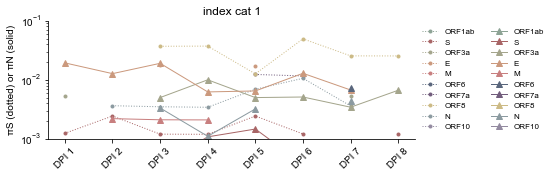

In [41]:
# merge all plots for each pair into one figure 

# generate a figure with sub-plots (one for each gene segment)
fig = plt.figure(figsize=(10,10), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(4, 6)

ax1 = fig.add_subplot(gs[0,0:4])

# get right of top and right frame of each subplot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)

# create a marker palette
colors = itertools.cycle(('#8DA395','#A86566','#A4A58C','#CB997D', '#C87F7F', '#59667C', '#715C7C', '#CCBA85', '#8B9AA0', '#938AA0')) 

# plot the synonymous lines 
num=0
for column in syn_cat1:
    num+=1
    ax1.plot(syn_cat1[column], marker='.', linewidth=1, alpha=1, label=column, linestyle='dotted', color=next(colors))
    
num=0
for column in nonsyn_cat1:
    num+=1
    ax1.plot(nonsyn_cat1[column], marker='^', linewidth=1, alpha=1, label=column, linestyle='solid', color=next(colors))

# add title and x axis text
ax1.set(xlabel="",ylabel="πS (dotted) or πN (solid)")

# adjust axes
ax1.set_yscale('log')
ax1.set_ylim([0.001, 0.1])

# add legend
ax1.legend(bbox_to_anchor=(1.0, 1.0), fontsize=8, frameon=False, ncol=2)

ax1.title.set_text('index cat 1')

# rotate x tick labels 45 degrees
plt.setp(ax1.get_xticklabels(), rotation=45)
    
# use tight_layout to optimize spacing of axes and titles within each subplot
plt.tight_layout()

#save figure 
plt.savefig("../figures/cat1_π.svg", bbox_inches='tight', dpi=300)

# #

In [30]:
df2_1 = pd.concat([rep1_2_1, rep2_2_1], axis=1)
df2_1['piN_avg_1'] = df2_1[['piN_1', 'piN_2']].mean(axis=1)
df2_1['piS_avg_1'] = df2_1[['piS', 'piS']].mean(axis=1)
df2_1 = df2_1[['piN_avg_1', 'piS_avg_1']]

df2_2 = pd.concat([rep1_2_2, rep2_2_2], axis=1)
df2_2['piN_avg_2'] = df2_2[['piN_1', 'piN_2']].mean(axis=1)
df2_2['piS_avg_2'] = df2_2[['piS', 'piS']].mean(axis=1)
df2_2 = df2_2[['piN_avg_2', 'piS_avg_2']]

df2_3 = pd.concat([rep1_2_3, rep2_2_3], axis=1)
df2_3['piN_avg_3'] = df2_3[['piN_1', 'piN_2']].mean(axis=1)
df2_3['piS_avg_3'] = df2_3[['piS', 'piS']].mean(axis=1)
df2_3 = df2_3[['piN_avg_3', 'piS_avg_3']]

df2_4 = pd.concat([rep1_2_4, rep2_2_4], axis=1)
df2_4['piN_avg_4'] = df2_4[['piN_1', 'piN_2']].mean(axis=1)
df2_4['piS_avg_4'] = df2_4[['piS', 'piS']].mean(axis=1)
df2_4 = df2_4[['piN_avg_4', 'piS_avg_4']]

df2_5 = pd.concat([rep1_2_5, rep2_2_5], axis=1)
df2_5['piN_avg_5'] = df2_5[['piN_1', 'piN_2']].mean(axis=1)
df2_5['piS_avg_5'] = df2_5[['piS', 'piS']].mean(axis=1)
df2_5 = df2_5[['piN_avg_5', 'piS_avg_5']]

df2_6 = pd.concat([rep1_2_6, rep2_2_6], axis=1)
df2_6['piN_avg_6'] = df2_6[['piN_1', 'piN_2']].mean(axis=1)
df2_6['piS_avg_6'] = df2_6[['piS', 'piS']].mean(axis=1)
df2_6 = df2_6[['piN_avg_6', 'piS_avg_6']]

df2_7 = pd.concat([rep1_2_7, rep2_2_7], axis=1)
df2_7['piN_avg_7'] = df2_7[['piN_1', 'piN_2']].mean(axis=1)
df2_7['piS_avg_7'] = df2_7[['piS', 'piS']].mean(axis=1)
df2_7 = df2_7[['piN_avg_7', 'piS_avg_7']]

df2_8 = pd.concat([rep1_2_8, rep2_2_8], axis=1)
df2_8['piN_avg_8'] = df2_8[['piN_1', 'piN_2']].mean(axis=1)
df2_8['piS_avg_8'] = df2_8[['piS', 'piS']].mean(axis=1)
df2_8 = df2_8[['piN_avg_8', 'piS_avg_8']]

dfa = pd.concat([df2_1, df2_2, df2_3, df2_4, df2_5, df2_6, df2_7, df2_8], axis=1)
dfa = dfa.reset_index(drop=True)
dfa = dfa.T
dfa = dfa.reset_index(drop=True)
dfc = pd.DataFrame({'sort': ['piN_avg_1', 'piS_avg_1', 'piN_avg_2', 'piS_avg_2', 'piN_avg_3', 'piS_avg_3', 'piN_avg_4', 'piS_avg_4', 'piN_avg_5', 'piS_avg_5', 'piN_avg_6', 'piS_avg_6', 'piN_avg_7', 'piS_avg_7', 'piN_avg_8', 'piS_avg_8']})
# dfb = pd.DataFrame({'genes': ['ORF1ab', 'S', 'ORF3a', 'E', 'M', 'ORF6', 'ORF7a', 'ORF8', 'N', 'ORF10']})
df2 = pd.concat([dfa, dfc], axis=1)
syn1 = df2[~df2.sort.str.contains("piN", na=False)]
nonsyn1 = df2[~df2.sort.str.contains("piS", na=False)]
syn1 = syn1.set_index('sort')
nonsyn1 = nonsyn1.set_index('sort')
syn1 = syn1.T
nonsyn1 = nonsyn1.T
dfb = pd.DataFrame({'genes': ['ORF1ab', 'S', 'ORF3a', 'E', 'M', 'ORF6', 'ORF7a', 'ORF8', 'N', 'ORF10']})
syn_cat2 = pd.concat([syn1, dfb], axis=1)
syn_cat2 = syn_cat2.set_index('genes')
nonsyn_cat2 = pd.concat([nonsyn1, dfb], axis=1)
nonsyn_cat2 = nonsyn_cat2.set_index('genes')
syn_cat2 = syn_cat2.rename(columns={'piS_avg_1':'DPI 1', 'piS_avg_2':'DPI 2', 'piS_avg_3':'DPI 3', 'piS_avg_4':'DPI 4', 'piS_avg_5':'DPI 5', 'piS_avg_6':'DPI 6', 'piS_avg_7':'DPI 7', 'piS_avg_8': 'DPI 8'})
nonsyn_cat2 = nonsyn_cat2.rename(columns={'piN_avg_1':'DPI 1', 'piN_avg_2':'DPI 2', 'piN_avg_3':'DPI 3', 'piN_avg_4':'DPI 4', 'piN_avg_5':'DPI 5', 'piN_avg_6':'DPI 6', 'piN_avg_7':'DPI 7', 'piN_avg_8': 'DPI 8'})

syn_cat2 = syn_cat2.T
nonsyn_cat2 = nonsyn_cat2.T

syn_cat2 = syn_cat2.replace(0, np.nan)
nonsyn_cat2 = nonsyn_cat2.replace(0, np.nan)

# syn_cat2
# nonsyn_cat2
#

/Users/katbraun/anaconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


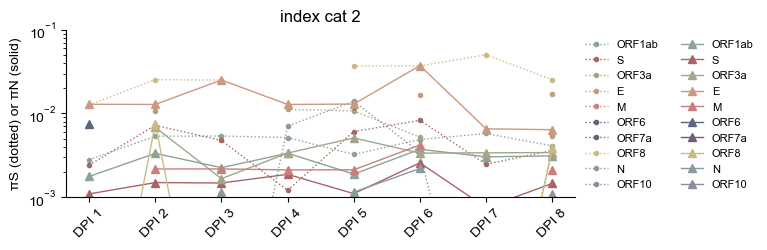

In [31]:
# merge all plots for each pair into one figure 

# generate a figure with sub-plots (one for each gene segment)
fig = plt.figure(figsize=(10,10), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(4, 6)

ax1 = fig.add_subplot(gs[0,0:4])

# get right of top and right frame of each subplot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)

# create a marker palette
colors = itertools.cycle(('#8DA395','#A86566','#A4A58C','#CB997D', '#C87F7F', '#59667C', '#715C7C', '#CCBA85', '#8B9AA0', '#938AA0')) 

# plot the synonymous lines 
num=0
for column in syn_cat2:
    num+=1
    ax1.plot(syn_cat2[column], marker='.', linewidth=1, alpha=1, label=column, linestyle='dotted', color=next(colors))
    
num=0
for column in nonsyn_cat2:
    num+=1
    ax1.plot(nonsyn_cat2[column], marker='^', linewidth=1, alpha=1, label=column, linestyle='solid', color=next(colors))

# add title and x axis text
ax1.set(xlabel="",ylabel="πS (dotted) or πN (solid)")

# adjust axes
ax1.set_yscale('log')
ax1.set_ylim([0.001, 0.1])

# add legend
ax1.legend(bbox_to_anchor=(1.0, 1.0), fontsize=8, frameon=False, ncol=2)

ax1.title.set_text('index cat 2')

# rotate x tick labels 45 degrees
plt.setp(ax1.get_xticklabels(), rotation=45)
    
# use tight_layout to optimize spacing of axes and titles within each subplot
plt.tight_layout()

#save figure 
plt.savefig("../figures/cat2_π.svg", bbox_inches='tight', dpi=300)

# #

In [32]:
df3_1 = pd.concat([rep1_3_1, rep2_3_1], axis=1)
df3_1['piN_avg_1'] = df3_1[['piN_1', 'piN_2']].mean(axis=1)
df3_1['piS_avg_1'] = df3_1[['piS', 'piS']].mean(axis=1)
df3_1 = df3_1[['piN_avg_1', 'piS_avg_1']]

df3_2 = pd.concat([rep1_3_2, rep2_3_2], axis=1)
df3_2['piN_avg_2'] = df3_2[['piN_1', 'piN_2']].mean(axis=1)
df3_2['piS_avg_2'] = df3_2[['piS', 'piS']].mean(axis=1)
df3_2 = df3_2[['piN_avg_2', 'piS_avg_2']]

df3_3 = pd.concat([rep1_3_3, rep2_3_3], axis=1)
df3_3['piN_avg_3'] = df3_3[['piN_1', 'piN_2']].mean(axis=1)
df3_3['piS_avg_3'] = df3_3[['piS', 'piS']].mean(axis=1)
df3_3 = df3_3[['piN_avg_3', 'piS_avg_3']]

df3_4 = pd.concat([rep1_3_4, rep2_3_4], axis=1)
df3_4['piN_avg_4'] = df3_4[['piN_1', 'piN_2']].mean(axis=1)
df3_4['piS_avg_4'] = df3_4[['piS', 'piS']].mean(axis=1)
df3_4 = df3_4[['piN_avg_4', 'piS_avg_4']]

df3_5 = pd.concat([rep1_3_5, rep2_3_5], axis=1)
df3_5['piN_avg_5'] = df3_5[['piN_1', 'piN_2']].mean(axis=1)
df3_5['piS_avg_5'] = df3_5[['piS', 'piS']].mean(axis=1)
df3_5 = df3_5[['piN_avg_5', 'piS_avg_5']]

df3_6 = pd.concat([rep1_3_6, rep2_3_6], axis=1)
df3_6['piN_avg_6'] = df3_6[['piN_1', 'piN_2']].mean(axis=1)
df3_6['piS_avg_6'] = df3_6[['piS', 'piS']].mean(axis=1)
df3_6 = df3_6[['piN_avg_6', 'piS_avg_6']]

df3_7 = pd.concat([rep1_3_7, rep2_3_7], axis=1)
df3_7['piN_avg_7'] = df3_7[['piN_1', 'piN_2']].mean(axis=1)
df3_7['piS_avg_7'] = df3_7[['piS', 'piS']].mean(axis=1)
df3_7 = df3_7[['piN_avg_7', 'piS_avg_7']]

df3_8 = pd.concat([rep1_3_8, rep2_3_8], axis=1)
df3_8['piN_avg_8'] = df3_8[['piN_1', 'piN_2']].mean(axis=1)
df3_8['piS_avg_8'] = df3_8[['piS', 'piS']].mean(axis=1)
df3_8 = df3_8[['piN_avg_8', 'piS_avg_8']]

dfa = pd.concat([df3_1, df3_2, df3_3, df3_4, df3_5, df3_6, df3_7, df3_8], axis=1)
dfa = dfa.reset_index(drop=True)
dfa = dfa.T
dfa = dfa.reset_index(drop=True)
dfc = pd.DataFrame({'sort': ['piN_avg_1', 'piS_avg_1', 'piN_avg_2', 'piS_avg_2', 'piN_avg_3', 'piS_avg_3', 'piN_avg_4', 'piS_avg_4', 'piN_avg_5', 'piS_avg_5', 'piN_avg_6', 'piS_avg_6', 'piN_avg_7', 'piS_avg_7', 'piN_avg_8', 'piS_avg_8']})
# dfb = pd.DataFrame({'genes': ['ORF1ab', 'S', 'ORF3a', 'E', 'M', 'ORF6', 'ORF7a', 'ORF8', 'N', 'ORF10']})
df3 = pd.concat([dfa, dfc], axis=1)
syn1 = df3[~df3.sort.str.contains("piN", na=False)]
nonsyn1 = df3[~df3.sort.str.contains("piS", na=False)]
syn1 = syn1.set_index('sort')
nonsyn1 = nonsyn1.set_index('sort')
syn1 = syn1.T
nonsyn1 = nonsyn1.T
dfb = pd.DataFrame({'genes': ['ORF1ab', 'S', 'ORF3a', 'E', 'M', 'ORF6', 'ORF7a', 'ORF8', 'N', 'ORF10']})
syn_cat3 = pd.concat([syn1, dfb], axis=1)
syn_cat3 = syn_cat3.set_index('genes')
nonsyn_cat3 = pd.concat([nonsyn1, dfb], axis=1)
nonsyn_cat3 = nonsyn_cat3.set_index('genes')
syn_cat3 = syn_cat3.rename(columns={'piS_avg_1':'DPI 1', 'piS_avg_2':'DPI 2', 'piS_avg_3':'DPI 3', 'piS_avg_4':'DPI 4', 'piS_avg_5':'DPI 5', 'piS_avg_6':'DPI 6', 'piS_avg_7':'DPI 7', 'piS_avg_8': 'DPI 8'})
nonsyn_cat3 = nonsyn_cat3.rename(columns={'piN_avg_1':'DPI 1', 'piN_avg_2':'DPI 2', 'piN_avg_3':'DPI 3', 'piN_avg_4':'DPI 4', 'piN_avg_5':'DPI 5', 'piN_avg_6':'DPI 6', 'piN_avg_7':'DPI 7', 'piN_avg_8': 'DPI 8'})

syn_cat3 = syn_cat3.T
nonsyn_cat3 = nonsyn_cat3.T

syn_cat3 = syn_cat3.replace(0, np.nan)
nonsyn_cat3 = nonsyn_cat3.replace(0, np.nan)

# syn_cat3
# nonsyn_cat3
#

/Users/katbraun/anaconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


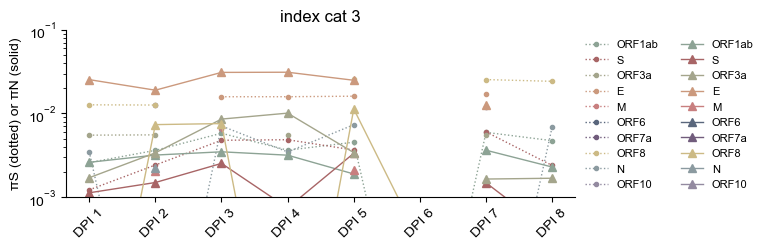

In [33]:
# merge all plots for each pair into one figure 

# generate a figure with sub-plots (one for each gene segment)
fig = plt.figure(figsize=(10,10), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(4, 6)

ax1 = fig.add_subplot(gs[0,0:4])

# get right of top and right frame of each subplot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)

# create a marker palette
colors = itertools.cycle(('#8DA395','#A86566','#A4A58C','#CB997D', '#C87F7F', '#59667C', '#715C7C', '#CCBA85', '#8B9AA0', '#938AA0')) 

# plot the synonymous lines 
num=0
for column in syn_cat3:
    num+=1
    ax1.plot(syn_cat3[column], marker='.', linewidth=1, alpha=1, label=column, linestyle='dotted', color=next(colors))
    
num=0
for column in nonsyn_cat3:
    num+=1
    ax1.plot(nonsyn_cat3[column], marker='^', linewidth=1, alpha=1, label=column, linestyle='solid', color=next(colors))

# add title and x axis text
ax1.set(xlabel="",ylabel="πS (dotted) or πN (solid)")

# adjust axes
ax1.set_yscale('log')
ax1.set_ylim([0.001, 0.1])

# add legend
ax1.legend(bbox_to_anchor=(1.0, 1.0), fontsize=8, frameon=False, ncol=2)

ax1.title.set_text('index cat 3')

# rotate x tick labels 45 degrees
plt.setp(ax1.get_xticklabels(), rotation=45)
    
# use tight_layout to optimize spacing of axes and titles within each subplot
plt.tight_layout()

#save figure 
plt.savefig("../figures/cat3_π.svg", bbox_inches='tight', dpi=300)

# #

In [34]:
df4_3 = pd.concat([rep1_4_3, rep2_4_3], axis=1)
df4_3['piN_avg_3'] = df4_3[['piN_1', 'piN_2']].mean(axis=1)
df4_3['piS_avg_3'] = df4_3[['piS', 'piS']].mean(axis=1)
df4_3 = df4_3[['piN_avg_3', 'piS_avg_3']]

df4_4 = pd.concat([rep1_4_4, rep2_4_4], axis=1)
df4_4['piN_avg_4'] = df4_4[['piN_1', 'piN_2']].mean(axis=1)
df4_4['piS_avg_4'] = df4_4[['piS', 'piS']].mean(axis=1)
df4_4 = df4_4[['piN_avg_4', 'piS_avg_4']]

df4_5 = pd.concat([rep1_4_5, rep2_4_5], axis=1)
df4_5['piN_avg_5'] = df4_5[['piN_1', 'piN_2']].mean(axis=1)
df4_5['piS_avg_5'] = df4_5[['piS', 'piS']].mean(axis=1)
df4_5 = df4_5[['piN_avg_5', 'piS_avg_5']]

df4_6 = pd.concat([rep1_4_6, rep2_4_6], axis=1)
df4_6['piN_avg_6'] = df4_6[['piN_1', 'piN_2']].mean(axis=1)
df4_6['piS_avg_6'] = df4_6[['piS', 'piS']].mean(axis=1)
df4_6 = df4_6[['piN_avg_6', 'piS_avg_6']]

df4_7 = pd.concat([rep1_4_7, rep2_4_7], axis=1)
df4_7['piN_avg_7'] = df4_7[['piN_1', 'piN_2']].mean(axis=1)
df4_7['piS_avg_7'] = df4_7[['piS', 'piS']].mean(axis=1)
df4_7 = df4_7[['piN_avg_7', 'piS_avg_7']]

df4_8 = pd.concat([rep1_4_8, rep2_4_8], axis=1)
df4_8['piN_avg_8'] = df4_8[['piN_1', 'piN_2']].mean(axis=1)
df4_8['piS_avg_8'] = df4_8[['piS', 'piS']].mean(axis=1)
df4_8 = df4_8[['piN_avg_8', 'piS_avg_8']]

df4_9 = pd.concat([rep1_4_9, rep2_4_9], axis=1)
df4_9['piN_avg_9'] = df4_9[['piN_1', 'piN_2']].mean(axis=1)
df4_9['piS_avg_9'] = df4_9[['piS', 'piS']].mean(axis=1)
df4_9 = df4_9[['piN_avg_9', 'piS_avg_9']]

df4_10 = pd.concat([rep1_4_10, rep2_4_10], axis=1)
df4_10['piN_avg_10'] = df4_10[['piN_1', 'piN_2']].mean(axis=1)
df4_10['piS_avg_10'] = df4_10[['piS', 'piS']].mean(axis=1)
df4_10 = df4_10[['piN_avg_10', 'piS_avg_10']]



dfa = pd.concat([df4_3, df4_4, df4_5, df4_6, df4_7, df4_8, df4_9, df4_10], axis=1)
dfa = dfa.reset_index(drop=True)
dfa = dfa.T
dfa = dfa.reset_index(drop=True)
dfc = pd.DataFrame({'sort': ['piN_avg_3', 'piS_avg_3', 'piN_avg_4', 'piS_avg_4', 'piN_avg_5', 'piS_avg_5', 'piN_avg_6', 'piS_avg_6', 'piN_avg_7', 'piS_avg_7', 'piN_avg_8', 'piS_avg_8', 'piN_avg_9', 'piS_avg_9', 'piN_avg_10', 'piS_avg_10']})
# dfb = pd.DataFrame({'genes': ['ORF1ab', 'S', 'ORF3a', 'E', 'M', 'ORF6', 'ORF7a', 'ORF8', 'N', 'ORF10']})
df4 = pd.concat([dfa, dfc], axis=1)
syn1 = df4[~df4.sort.str.contains("piN", na=False)]
nonsyn1 = df4[~df4.sort.str.contains("piS", na=False)]
syn1 = syn1.set_index('sort')
nonsyn1 = nonsyn1.set_index('sort')
syn1 = syn1.T
nonsyn1 = nonsyn1.T
dfb = pd.DataFrame({'genes': ['ORF1ab', 'S', 'ORF3a', 'E', 'M', 'ORF6', 'ORF7a', 'ORF8', 'N', 'ORF10']})
syn_cat4 = pd.concat([syn1, dfb], axis=1)
syn_cat4 = syn_cat4.set_index('genes')
nonsyn_cat4 = pd.concat([nonsyn1, dfb], axis=1)
nonsyn_cat4 = nonsyn_cat4.set_index('genes')
syn_cat4 = syn_cat4.rename(columns={'piS_avg_3':'DPI 3', 'piS_avg_4':'DPI 4', 'piS_avg_5':'DPI 5', 'piS_avg_6':'DPI 6', 'piS_avg_7':'DPI 7', 'piS_avg_8': 'DPI 8', 'piS_avg_9':'DPI 9', 'piS_avg_10': 'DPI 10'})
nonsyn_cat4 = nonsyn_cat4.rename(columns={'piN_avg_3':'DPI 3', 'piN_avg_4':'DPI 4', 'piN_avg_5':'DPI 5', 'piN_avg_6':'DPI 6', 'piN_avg_7':'DPI 7', 'piN_avg_8': 'DPI 8', 'piN_avg_9':'DPI 9', 'piN_avg_10':'DPI 10'})

syn_cat4 = syn_cat4.T
nonsyn_cat4 = nonsyn_cat4.T

syn_cat4 = syn_cat4.replace(0, np.nan)
nonsyn_cat4 = nonsyn_cat4.replace(0, np.nan)

# syn_cat4
# nonsyn_cat4
#

/Users/katbraun/anaconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


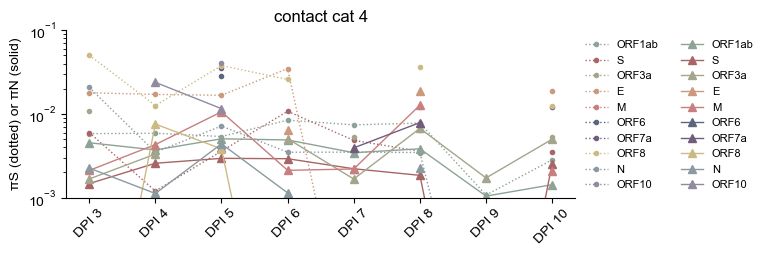

In [35]:
# merge all plots for each pair into one figure 

# generate a figure with sub-plots (one for each gene segment)
fig = plt.figure(figsize=(10,10), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(4, 6)

ax1 = fig.add_subplot(gs[0,0:4])

# get right of top and right frame of each subplot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)

# create a marker palette
colors = itertools.cycle(('#8DA395','#A86566','#A4A58C','#CB997D', '#C87F7F', '#59667C', '#715C7C', '#CCBA85', '#8B9AA0', '#938AA0')) 

# plot the synonymous lines 
num=0
for column in syn_cat4:
    num+=1
    ax1.plot(syn_cat4[column], marker='.', linewidth=1, alpha=1, label=column, linestyle='dotted', color=next(colors))
    
num=0
for column in nonsyn_cat4:
    num+=1
    ax1.plot(nonsyn_cat4[column], marker='^', linewidth=1, alpha=1, label=column, linestyle='solid', color=next(colors))

# add title and x axis text
ax1.set(xlabel="",ylabel="πS (dotted) or πN (solid)")

# adjust axes
ax1.set_yscale('log')
ax1.set_ylim([0.001, 0.1])

# add legend
ax1.legend(bbox_to_anchor=(1.0, 1.0), fontsize=8, frameon=False, ncol=2)

ax1.title.set_text('contact cat 4')

# rotate x tick labels 45 degrees
plt.setp(ax1.get_xticklabels(), rotation=45)
    
# use tight_layout to optimize spacing of axes and titles within each subplot
plt.tight_layout()

#save figure 
plt.savefig("../figures/cat4_π.svg", bbox_inches='tight', dpi=300)

# #

In [36]:
df5_3 = pd.concat([rep1_5_3, rep2_5_3], axis=1)
df5_3['piN_avg_3'] = df5_3[['piN_1', 'piN_2']].mean(axis=1)
df5_3['piS_avg_3'] = df5_3[['piS', 'piS']].mean(axis=1)
df5_3 = df5_3[['piN_avg_3', 'piS_avg_3']]

df5_4 = pd.concat([rep1_5_4, rep2_5_4], axis=1)
df5_4['piN_avg_4'] = df5_4[['piN_1', 'piN_2']].mean(axis=1)
df5_4['piS_avg_4'] = df5_4[['piS', 'piS']].mean(axis=1)
df5_4 = df5_4[['piN_avg_4', 'piS_avg_4']]

df5_5 = pd.concat([rep1_5_5, rep2_5_5], axis=1)
df5_5['piN_avg_5'] = df5_5[['piN_1', 'piN_2']].mean(axis=1)
df5_5['piS_avg_5'] = df5_5[['piS', 'piS']].mean(axis=1)
df5_5 = df5_5[['piN_avg_5', 'piS_avg_5']]

df5_6 = pd.concat([rep1_5_6, rep2_5_6], axis=1)
df5_6['piN_avg_6'] = df5_6[['piN_1', 'piN_2']].mean(axis=1)
df5_6['piS_avg_6'] = df5_6[['piS', 'piS']].mean(axis=1)
df5_6 = df5_6[['piN_avg_6', 'piS_avg_6']]

df5_7 = pd.concat([rep1_5_7, rep2_5_7], axis=1)
df5_7['piN_avg_7'] = df5_7[['piN_1', 'piN_2']].mean(axis=1)
df5_7['piS_avg_7'] = df5_7[['piS', 'piS']].mean(axis=1)
df5_7 = df5_7[['piN_avg_7', 'piS_avg_7']]

df5_8 = pd.concat([rep1_5_8, rep2_5_8], axis=1)
df5_8['piN_avg_8'] = df5_8[['piN_1', 'piN_2']].mean(axis=1)
df5_8['piS_avg_8'] = df5_8[['piS', 'piS']].mean(axis=1)
df5_8 = df5_8[['piN_avg_8', 'piS_avg_8']]

df5_9 = pd.concat([rep1_5_9, rep2_5_9], axis=1)
df5_9['piN_avg_9'] = df5_9[['piN_1', 'piN_2']].mean(axis=1)
df5_9['piS_avg_9'] = df5_9[['piS', 'piS']].mean(axis=1)
df5_9 = df5_9[['piN_avg_9', 'piS_avg_9']]

df5_10 = pd.concat([rep1_5_10, rep2_5_10], axis=1)
df5_10['piN_avg_10'] = df5_10[['piN_1', 'piN_2']].mean(axis=1)
df5_10['piS_avg_10'] = df5_10[['piS', 'piS']].mean(axis=1)
df5_10 = df5_10[['piN_avg_10', 'piS_avg_10']]

dfa = pd.concat([df5_3, df5_4, df5_5, df5_6, df5_7, df5_8, df5_9, df5_10], axis=1)
dfa = dfa.reset_index(drop=True)
dfa = dfa.T
dfa = dfa.reset_index(drop=True)
dfc = pd.DataFrame({'sort': ['piN_avg_3', 'piS_avg_3', 'piN_avg_4', 'piS_avg_4', 'piN_avg_5', 'piS_avg_5', 'piN_avg_6', 'piS_avg_6', 'piN_avg_7', 'piS_avg_7', 'piN_avg_8', 'piS_avg_8', 'piN_avg_9', 'piS_avg_9', 'piN_avg_10', 'piS_avg_10']})
# dfb = pd.DataFrame({'genes': ['ORF1ab', 'S', 'ORF3a', 'E', 'M', 'ORF6', 'ORF7a', 'ORF8', 'N', 'ORF10']})
df5 = pd.concat([dfa, dfc], axis=1)
syn1 = df5[~df5.sort.str.contains("piN", na=False)]
nonsyn1 = df5[~df5.sort.str.contains("piS", na=False)]
syn1 = syn1.set_index('sort')
nonsyn1 = nonsyn1.set_index('sort')
syn1 = syn1.T
nonsyn1 = nonsyn1.T
dfb = pd.DataFrame({'genes': ['ORF1ab', 'S', 'ORF3a', 'E', 'M', 'ORF6', 'ORF7a', 'ORF8', 'N', 'ORF10']})
syn_cat5 = pd.concat([syn1, dfb], axis=1)
syn_cat5 = syn_cat5.set_index('genes')
nonsyn_cat5 = pd.concat([nonsyn1, dfb], axis=1)
nonsyn_cat5 = nonsyn_cat5.set_index('genes')
syn_cat5 = syn_cat5.rename(columns={'piS_avg_3':'DPI 3', 'piS_avg_4':'DPI 4', 'piS_avg_5':'DPI 5', 'piS_avg_6':'DPI 6', 'piS_avg_7':'DPI 7', 'piS_avg_8': 'DPI 8', 'piS_avg_9':'DPI 9', 'piS_avg_10': 'DPI 10'})
nonsyn_cat5 = nonsyn_cat5.rename(columns={'piN_avg_3':'DPI 3', 'piN_avg_4':'DPI 4', 'piN_avg_5':'DPI 5', 'piN_avg_6':'DPI 6', 'piN_avg_7':'DPI 7', 'piN_avg_8': 'DPI 8', 'piN_avg_9':'DPI 9', 'piN_avg_10':'DPI 10'})

syn_cat5 = syn_cat5.T
nonsyn_cat5 = nonsyn_cat5.T

syn_cat5 = syn_cat5.replace(0, np.nan)
nonsyn_cat5 = nonsyn_cat5.replace(0, np.nan)

# syn_cat5
# nonsyn_cat5
#

/Users/katbraun/anaconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


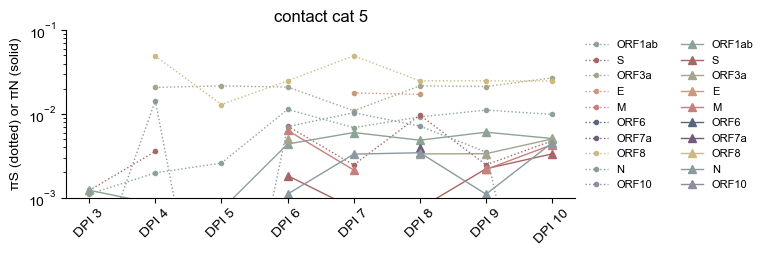

In [37]:
# merge all plots for each pair into one figure 

# generate a figure with sub-plots (one for each gene segment)
fig = plt.figure(figsize=(10,10), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(4, 6)

ax1 = fig.add_subplot(gs[0,0:4])

# get right of top and right frame of each subplot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)

# create a marker palette
colors = itertools.cycle(('#8DA395','#A86566','#A4A58C','#CB997D', '#C87F7F', '#59667C', '#715C7C', '#CCBA85', '#8B9AA0', '#938AA0')) 

# plot the synonymous lines 
num=0
for column in syn_cat5:
    num+=1
    ax1.plot(syn_cat5[column], marker='.', linewidth=1, alpha=1, label=column, linestyle='dotted', color=next(colors))
    
num=0
for column in nonsyn_cat5:
    num+=1
    ax1.plot(nonsyn_cat5[column], marker='^', linewidth=1, alpha=1, label=column, linestyle='solid', color=next(colors))

# add title and x axis text
ax1.set(xlabel="",ylabel="πS (dotted) or πN (solid)")

# adjust axes
ax1.set_yscale('log')
ax1.set_ylim([0.001, 0.1])

# add legend
ax1.legend(bbox_to_anchor=(1.0, 1.0), fontsize=8, frameon=False, ncol=2)

ax1.title.set_text('contact cat 5')

# rotate x tick labels 45 degrees
plt.setp(ax1.get_xticklabels(), rotation=45)
    
# use tight_layout to optimize spacing of axes and titles within each subplot
plt.tight_layout()

#save figure 
plt.savefig("../figures/cat5_π.svg", bbox_inches='tight', dpi=300)

# #

In [38]:
df6_3 = pd.concat([rep1_6_3, rep2_6_3], axis=1)
df6_3['piN_avg_3'] = df6_3[['piN_1', 'piN_2']].mean(axis=1)
df6_3['piS_avg_3'] = df6_3[['piS', 'piS']].mean(axis=1)
df6_3 = df6_3[['piN_avg_3', 'piS_avg_3']]

df6_4 = pd.concat([rep1_6_4, rep2_6_4], axis=1)
df6_4['piN_avg_4'] = df6_4[['piN_1', 'piN_2']].mean(axis=1)
df6_4['piS_avg_4'] = df6_4[['piS', 'piS']].mean(axis=1)
df6_4 = df6_4[['piN_avg_4', 'piS_avg_4']]

df6_5 = pd.concat([rep1_6_5, rep2_6_5], axis=1)
df6_5['piN_avg_5'] = df6_5[['piN_1', 'piN_2']].mean(axis=1)
df6_5['piS_avg_5'] = df6_5[['piS', 'piS']].mean(axis=1)
df6_5 = df6_5[['piN_avg_5', 'piS_avg_5']]

df6_6 = pd.concat([rep1_6_6, rep2_6_6], axis=1)
df6_6['piN_avg_6'] = df6_6[['piN_1', 'piN_2']].mean(axis=1)
df6_6['piS_avg_6'] = df6_6[['piS', 'piS']].mean(axis=1)
df6_6 = df6_6[['piN_avg_6', 'piS_avg_6']]

df6_7 = pd.concat([rep1_6_7, rep2_6_7], axis=1)
df6_7['piN_avg_7'] = df6_7[['piN_1', 'piN_2']].mean(axis=1)
df6_7['piS_avg_7'] = df6_7[['piS', 'piS']].mean(axis=1)
df6_7 = df6_7[['piN_avg_7', 'piS_avg_7']]

df6_8 = pd.concat([rep1_6_8, rep2_6_8], axis=1)
df6_8['piN_avg_8'] = df6_8[['piN_1', 'piN_2']].mean(axis=1)
df6_8['piS_avg_8'] = df6_8[['piS', 'piS']].mean(axis=1)
df6_8 = df6_8[['piN_avg_8', 'piS_avg_8']]

df6_9 = pd.concat([rep1_6_9, rep2_6_9], axis=1)
df6_9['piN_avg_9'] = df6_9[['piN_1', 'piN_2']].mean(axis=1)
df6_9['piS_avg_9'] = df6_9[['piS', 'piS']].mean(axis=1)
df6_9 = df6_9[['piN_avg_9', 'piS_avg_9']]

df6_10 = pd.concat([rep1_6_10, rep2_6_10], axis=1)
df6_10['piN_avg_10'] = df6_10[['piN_1', 'piN_2']].mean(axis=1)
df6_10['piS_avg_10'] = df6_10[['piS', 'piS']].mean(axis=1)
df6_10 = df6_10[['piN_avg_10', 'piS_avg_10']]

dfa = pd.concat([df6_3, df6_4, df6_5, df6_6, df6_7, df6_8, df6_9, df6_10], axis=1)
dfa = dfa.reset_index(drop=True)
dfa = dfa.T
dfa = dfa.reset_index(drop=True)
dfc = pd.DataFrame({'sort': ['piN_avg_3', 'piS_avg_3', 'piN_avg_4', 'piS_avg_4', 'piN_avg_5', 'piS_avg_5', 'piN_avg_6', 'piS_avg_6', 'piN_avg_7', 'piS_avg_7', 'piN_avg_8', 'piS_avg_8', 'piN_avg_9', 'piS_avg_9', 'piN_avg_10', 'piS_avg_10']})
# dfb = pd.DataFrame({'genes': ['ORF1ab', 'S', 'ORF3a', 'E', 'M', 'ORF6', 'ORF7a', 'ORF8', 'N', 'ORF10']})
df6 = pd.concat([dfa, dfc], axis=1)
syn1 = df6[~df6.sort.str.contains("piN", na=False)]
nonsyn1 = df6[~df6.sort.str.contains("piS", na=False)]
syn1 = syn1.set_index('sort')
nonsyn1 = nonsyn1.set_index('sort')
syn1 = syn1.T
nonsyn1 = nonsyn1.T
dfb = pd.DataFrame({'genes': ['ORF1ab', 'S', 'ORF3a', 'E', 'M', 'ORF6', 'ORF7a', 'ORF8', 'N', 'ORF10']})
syn_cat6 = pd.concat([syn1, dfb], axis=1)
syn_cat6 = syn_cat6.set_index('genes')
nonsyn_cat6 = pd.concat([nonsyn1, dfb], axis=1)
nonsyn_cat6 = nonsyn_cat6.set_index('genes')
syn_cat6 = syn_cat6.rename(columns={'piS_avg_3':'DPI 3', 'piS_avg_4':'DPI 4', 'piS_avg_5':'DPI 5', 'piS_avg_6':'DPI 6', 'piS_avg_7':'DPI 7', 'piS_avg_8': 'DPI 8', 'piS_avg_9':'DPI 9', 'piS_avg_10': 'DPI 10'})
nonsyn_cat6 = nonsyn_cat6.rename(columns={'piN_avg_3':'DPI 3', 'piN_avg_4':'DPI 4', 'piN_avg_5':'DPI 5', 'piN_avg_6':'DPI 6', 'piN_avg_7':'DPI 7', 'piN_avg_8': 'DPI 8', 'piN_avg_9':'DPI 9', 'piN_avg_10':'DPI 10'})

syn_cat6 = syn_cat6.T
nonsyn_cat6 = nonsyn_cat6.T

syn_cat6 = syn_cat6.replace(0, np.nan)
nonsyn_cat6 = nonsyn_cat6.replace(0, np.nan)

# syn_cat6
# nonsyn_cat6
#

/Users/katbraun/anaconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


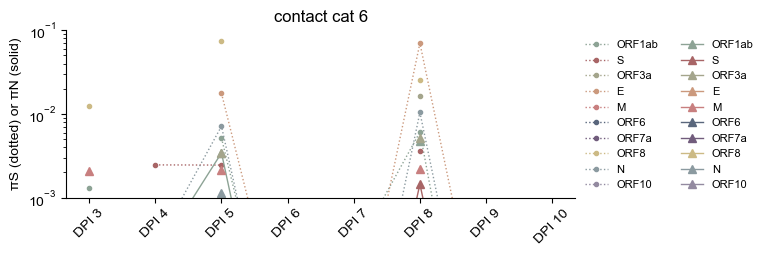

In [39]:
# merge all plots for each pair into one figure 

# generate a figure with sub-plots (one for each gene segment)
fig = plt.figure(figsize=(10,10), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(4, 6)

ax1 = fig.add_subplot(gs[0,0:4])

# get right of top and right frame of each subplot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)

# create a marker palette
colors = itertools.cycle(('#8DA395','#A86566','#A4A58C','#CB997D', '#C87F7F', '#59667C', '#715C7C', '#CCBA85', '#8B9AA0', '#938AA0')) 

# plot the synonymous lines 
num=0
for column in syn_cat6:
    num+=1
    ax1.plot(syn_cat6[column], marker='.', linewidth=1, alpha=1, label=column, linestyle='dotted', color=next(colors))
    
num=0
for column in nonsyn_cat6:
    num+=1
    ax1.plot(nonsyn_cat6[column], marker='^', linewidth=1, alpha=1, label=column, linestyle='solid', color=next(colors))

# add title and x axis text
ax1.set(xlabel="",ylabel="πS (dotted) or πN (solid)")

# adjust axes
ax1.set_yscale('log')
ax1.set_ylim([0.001, 0.1])

# add legend
ax1.legend(bbox_to_anchor=(1.0, 1.0), fontsize=8, frameon=False, ncol=2)

ax1.title.set_text('contact cat 6')

# rotate x tick labels 45 degrees
plt.setp(ax1.get_xticklabels(), rotation=45)
    
# use tight_layout to optimize spacing of axes and titles within each subplot
plt.tight_layout()

#save figure 
plt.savefig("../figures/cat6_π.svg", bbox_inches='tight', dpi=300)

# #

# transmission event 

In [40]:
syn_cat1_index = syn_cat1.loc[['DPI 2']]
nonsyn_cat1_index = nonsyn_cat1.loc[['DPI 2']]

syn_cat4_contact = syn_cat4.loc[['DPI 3']]
nonsyn_cat4_contact = nonsyn_cat4.loc[['DPI 3']]

pair1_syn = pd.concat([syn_cat1_index , syn_cat4_contact])
pair1_nonsyn = pd.concat([nonsyn_cat1_index , nonsyn_cat4_contact])

#

/Users/katbraun/anaconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


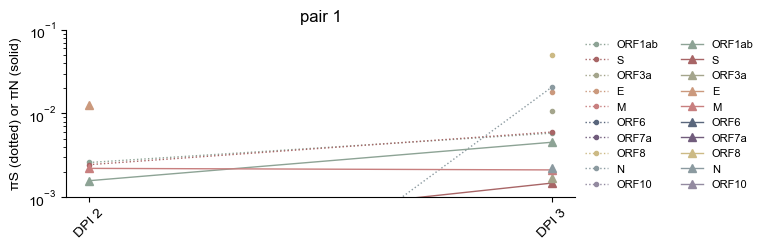

In [41]:
# merge all plots for each pair into one figure 

# generate a figure with sub-plots (one for each gene segment)
fig = plt.figure(figsize=(10,10), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(4, 6)

ax1 = fig.add_subplot(gs[0,0:4])

# get right of top and right frame of each subplot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)

# create a marker palette
colors = itertools.cycle(('#8DA395','#A86566','#A4A58C','#CB997D', '#C87F7F', '#59667C', '#715C7C', '#CCBA85', '#8B9AA0', '#938AA0')) 

# plot the synonymous lines 
num=0
for column in pair1_syn:
    num+=1
    ax1.plot(pair1_syn[column], marker='.', linewidth=1, alpha=1, label=column, linestyle='dotted', color=next(colors))
    
num=0
for column in pair1_nonsyn:
    num+=1
    ax1.plot(pair1_nonsyn[column], marker='^', linewidth=1, alpha=1, label=column, linestyle='solid', color=next(colors))

# add title and x axis text
ax1.set(xlabel="",ylabel="πS (dotted) or πN (solid)")

# adjust axes
ax1.set_yscale('log')
ax1.set_ylim([0.001, 0.1])

# add legend
ax1.legend(bbox_to_anchor=(1.0, 1.0), fontsize=8, frameon=False, ncol=2)

ax1.title.set_text('pair 1')

# rotate x tick labels 45 degrees
plt.setp(ax1.get_xticklabels(), rotation=45)
    
# use tight_layout to optimize spacing of axes and titles within each subplot
plt.tight_layout()

#save figure 
plt.savefig("../figures/pair1_π.svg", bbox_inches='tight', dpi=300)

# #

In [42]:
syn_cat2_index = syn_cat2.loc[['DPI 5']]
nonsyn_cat2_index = nonsyn_cat2.loc[['DPI 5']]

syn_cat5_contact = syn_cat5.loc[['DPI 6']]
nonsyn_cat5_contact = nonsyn_cat5.loc[['DPI 6']]

pair2_syn = pd.concat([syn_cat2_index , syn_cat5_contact])
pair2_nonsyn = pd.concat([nonsyn_cat2_index , nonsyn_cat5_contact])

#

/Users/katbraun/anaconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


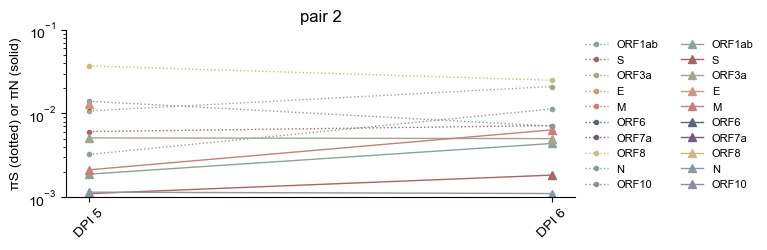

In [43]:
# merge all plots for each pair into one figure 

# generate a figure with sub-plots (one for each gene segment)
fig = plt.figure(figsize=(10,10), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(4, 6)

ax1 = fig.add_subplot(gs[0,0:4])

# get right of top and right frame of each subplot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)

# create a marker palette
colors = itertools.cycle(('#8DA395','#A86566','#A4A58C','#CB997D', '#C87F7F', '#59667C', '#715C7C', '#CCBA85', '#8B9AA0', '#938AA0')) 

# plot the synonymous lines 
num=0
for column in pair2_syn:
    num+=1
    ax1.plot(pair2_syn[column], marker='.', linewidth=1, alpha=1, label=column, linestyle='dotted', color=next(colors))
    
num=0
for column in pair2_nonsyn:
    num+=1
    ax1.plot(pair2_nonsyn[column], marker='^', linewidth=1, alpha=1, label=column, linestyle='solid', color=next(colors))

# add title and x axis text
ax1.set(xlabel="",ylabel="πS (dotted) or πN (solid)")

# adjust axes
ax1.set_yscale('log')
ax1.set_ylim([0.001, 0.1])

# add legend
ax1.legend(bbox_to_anchor=(1.0, 1.0), fontsize=8, frameon=False, ncol=2)

ax1.title.set_text('pair 2')

# rotate x tick labels 45 degrees
plt.setp(ax1.get_xticklabels(), rotation=45)
    
# use tight_layout to optimize spacing of axes and titles within each subplot
plt.tight_layout()

#save figure 
plt.savefig("../figures/pair2_π.svg", bbox_inches='tight', dpi=300)

# #

In [44]:
syn_cat3_index = syn_cat3.loc[['DPI 4']]
nonsyn_cat3_index = nonsyn_cat3.loc[['DPI 4']]

syn_cat6_contact = syn_cat6.loc[['DPI 5']]
nonsyn_cat6_contact = nonsyn_cat6.loc[['DPI 5']]

pair3_syn = pd.concat([syn_cat3_index , syn_cat6_contact])
pair3_nonsyn = pd.concat([nonsyn_cat3_index , nonsyn_cat6_contact])

#

/Users/katbraun/anaconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


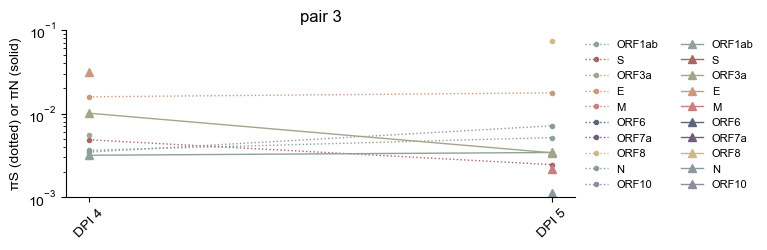

In [45]:
# merge all plots for each pair into one figure 

# generate a figure with sub-plots (one for each gene segment)
fig = plt.figure(figsize=(10,10), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(4, 6)

ax1 = fig.add_subplot(gs[0,0:4])

# get right of top and right frame of each subplot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)

# create a marker palette
colors = itertools.cycle(('#8DA395','#A86566','#A4A58C','#CB997D', '#C87F7F', '#59667C', '#715C7C', '#CCBA85', '#8B9AA0', '#938AA0')) 

# plot the synonymous lines 
num=0
for column in pair3_syn:
    num+=1
    ax1.plot(pair3_syn[column], marker='.', linewidth=1, alpha=1, label=column, linestyle='dotted', color=next(colors))
    
num=0
for column in pair3_nonsyn:
    num+=1
    ax1.plot(pair3_nonsyn[column], marker='^', linewidth=1, alpha=1, label=column, linestyle='solid', color=next(colors))

# add title and x axis text
ax1.set(xlabel="",ylabel="πS (dotted) or πN (solid)")

# adjust axes
ax1.set_yscale('log')
ax1.set_ylim([0.001, 0.1])

# add legend
ax1.legend(bbox_to_anchor=(1.0, 1.0), fontsize=8, frameon=False, ncol=2)

ax1.title.set_text('pair 3')

# rotate x tick labels 45 degrees
plt.setp(ax1.get_xticklabels(), rotation=45)
    
# use tight_layout to optimize spacing of axes and titles within each subplot
plt.tight_layout()

#save figure 
plt.savefig("../figures/pair3_π.svg", bbox_inches='tight', dpi=300)

# #

# Plot πN/πS now

- \>1 suggests diversifying selection   
- ~1 suggests drift  
- <1 suggests purifying selection   

In [42]:
#calculate piN/piS

df1_1['DPI 1'] = df1_1['piN_avg_1'] / df1_1['piS_avg_1']
df1_1n = df1_1[['DPI 1']]

df1_2['DPI 2'] = df1_2['piN_avg_2'] / df1_2['piS_avg_2']
df1_2n = df1_2[['DPI 2']]

df1_3['DPI 3'] = df1_3['piN_avg_3'] / df1_3['piS_avg_3']
df1_3n = df1_3[['DPI 3']]

df1_4['DPI 4'] = df1_4['piN_avg_4'] / df1_4['piS_avg_4']
df1_4n = df1_4[['DPI 4']]

df1_5['DPI 5'] = df1_5['piN_avg_5'] / df1_5['piS_avg_5']
df1_5n = df1_5[['DPI 5']]

df1_6['DPI 6'] = df1_6['piN_avg_6'] / df1_6['piS_avg_6']
df1_6n = df1_6[['DPI 6']]

df1_7['DPI 7'] = df1_7['piN_avg_7'] / df1_7['piS_avg_7']
df1_7n = df1_7[['DPI 7']]

df1_8['DPI 8'] = df1_8['piN_avg_8'] / df1_8['piS_avg_8']
df1_8n = df1_8[['DPI 8']]

df1n = pd.concat([df1_1n, df1_2n, df1_3n, df1_4n, df1_5n, df1_6n, df1_7n, df1_8n], axis=1)

df1n_T = df1n.T

df1n_T = df1n_T.replace(np.inf, np.nan)
df1n_T = df1n_T.replace(0, np.nan)

df1n_T

#

product  gene-orf1ab         gene-S     gene-ORF3a         gene-E  gene-M  \
DPI 1            nan 0.000712040364            nan            nan     nan   
DPI 2            nan 0.153663238603            nan            nan     nan   
DPI 3            nan 0.304823324554            nan 1.061470422576     nan   
DPI 4            nan 0.906542005666            nan            nan     nan   
DPI 5            nan 0.602277176153            nan 0.377730910664     nan   
DPI 6            nan 0.310993488480            nan            nan     nan   
DPI 7            nan            nan 0.641899015115            nan     nan   
DPI 8            nan 0.618956097592            nan            nan     nan   

product  gene-ORF6  gene-ORF7a  gene-ORF8         gene-N  gene-ORF10  
DPI 1          nan         nan        nan            nan         nan  
DPI 2          nan         nan        nan            nan         nan  
DPI 3          nan         nan        nan 0.953965010816         nan  
DPI 4          nan         nan        nan 0.322614718615         nan  
DPI 5          nan         nan        nan 0.464937557200         nan  
DPI 6          nan         nan        nan            nan         nan  
DPI 7          nan         nan        nan 1.236984878215         nan  
DPI 8          nan         nan        nan            nan         nan

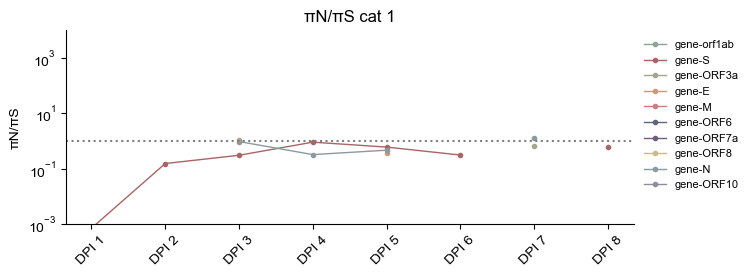

In [43]:
# merge all plots for each pair into one figure 

# generate a figure with sub-plots (one for each gene segment)
fig = plt.figure(figsize=(10,10), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(4, 6)

ax1 = fig.add_subplot(gs[0,0:4])

# get right of top and right frame of each subplot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)

# create a marker palette
colors = itertools.cycle(('#8DA395','#A86566','#A4A58C','#CB997D', '#C87F7F', '#59667C', '#715C7C', '#CCBA85', '#8B9AA0', '#938AA0')) 

# plot the synonymous lines 
num=0
for column in df1n_T:
    num+=1
    ax1.plot(df1n_T[column], marker='.', linewidth=1, alpha=1, label=column, linestyle='solid', color=next(colors))

# add title and x axis text
ax1.set(xlabel="",ylabel="πN/πS")

# adjust axes
ax1.set_yscale('log')
ax1.set_ylim([0.001, 10000])

#plot horizontal line at y=1
plt.axhline(y=1, color='grey', linestyle='dotted')

# add legend
ax1.legend(bbox_to_anchor=(1.0, 1.0), fontsize=8, frameon=False, ncol=1)

ax1.title.set_text('πN/πS cat 1')

# rotate x tick labels 45 degrees
plt.setp(ax1.get_xticklabels(), rotation=45)
    
# use tight_layout to optimize spacing of axes and titles within each subplot
plt.tight_layout()

#save figure 
plt.savefig("../figures/cat1_πN_over_πS.svg", bbox_inches='tight', dpi=300)

# #

In [48]:
#calculate piN/piS

df2_1['DPI 1'] = df2_1['piN_avg_1'] / df2_1['piS_avg_1']
df2_1n = df2_1[['DPI 1']]

df2_2['DPI 2'] = df2_2['piN_avg_2'] / df2_2['piS_avg_2']
df2_2n = df2_2[['DPI 2']]

df2_3['DPI 3'] = df2_3['piN_avg_3'] / df2_3['piS_avg_3']
df2_3n = df2_3[['DPI 3']]

df2_4['DPI 4'] = df2_4['piN_avg_4'] / df2_4['piS_avg_4']
df2_4n = df2_4[['DPI 4']]

df2_5['DPI 5'] = df2_5['piN_avg_5'] / df2_5['piS_avg_5']
df2_5n = df2_5[['DPI 5']]

df2_6['DPI 6'] = df2_6['piN_avg_6'] / df2_6['piS_avg_6']
df2_6n = df2_6[['DPI 6']]

df2_7['DPI 7'] = df2_7['piN_avg_7'] / df2_7['piS_avg_7']
df2_7n = df2_7[['DPI 7']]

df2_8['DPI 8'] = df2_8['piN_avg_8'] / df2_8['piS_avg_8']
df2_8n = df2_8[['DPI 8']]

df2n = pd.concat([df2_1n, df2_2n, df2_3n, df2_4n, df2_5n, df2_6n, df2_7n, df2_8n], axis=1)

df2n_T = df2n.T

df2n_T = df2n_T.replace(np.inf, np.nan)
df2n_T = df2n_T.replace(0, np.nan)

df2n_T

#

product    gene-orf1ab         gene-S     gene-ORF3a           gene-E  gene-M  \
DPI 1   0.628387496577 0.453036507109            nan 967.610405012866     nan   
DPI 2   0.625322386563 0.207019408543 0.631840277405              nan     nan   
DPI 3   0.418593453617 0.310372438905            nan              nan     nan   
DPI 4   0.649394303854 1.552769106296 0.300556609333 775.258106512255     nan   
DPI 5   0.582471841243 0.181339766428 0.476196629356              nan     nan   
DPI 6   0.763888369402 0.310678410260 0.644545424369   2.244441895808     nan   
DPI 7   0.525776113347 0.303147483906            nan              nan     nan   
DPI 8   0.760328455817 0.404532711867 0.626257645565   0.376065280119     nan   

product  gene-ORF6  gene-ORF7a      gene-ORF8           gene-N  gene-ORF10  
DPI 1          nan         nan 0.000056950913              nan         nan  
DPI 2          nan         nan 0.297628985512              nan         nan  
DPI 3          nan         nan 0.000029938948 890.688759626128         nan  
DPI 4          nan         nan            nan              nan         nan  
DPI 5          nan         nan 0.000013750116   0.082025929245         nan  
DPI 6          nan         nan 0.000006300954   0.644801425996         nan  
DPI 7          nan         nan 0.000013985571              nan         nan  
DPI 8          nan         nan 0.151547467706   0.311356406097         nan

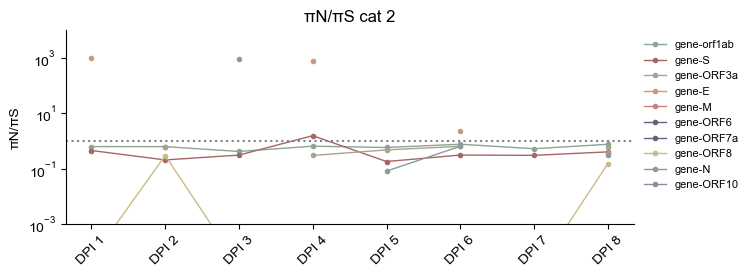

In [49]:
# merge all plots for each pair into one figure 

# generate a figure with sub-plots (one for each gene segment)
fig = plt.figure(figsize=(10,10), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(4, 6)

ax1 = fig.add_subplot(gs[0,0:4])

# get right of top and right frame of each subplot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)

# create a marker palette
colors = itertools.cycle(('#8DA395','#A86566','#A4A58C','#CB997D', '#C87F7F', '#59667C', '#715C7C', '#CCBA85', '#8B9AA0', '#938AA0')) 

# plot the synonymous lines 
num=0
for column in df2n_T:
    num+=1
    ax1.plot(df2n_T[column], marker='.', linewidth=1, alpha=1, label=column, linestyle='solid', color=next(colors))

# add title and x axis text
ax1.set(xlabel="",ylabel="πN/πS")

# adjust axes
ax1.set_yscale('log')
ax1.set_ylim([0.001, 10000])

#plot horizontal line at y=1
plt.axhline(y=1, color='grey', linestyle='dotted')

# add legend
ax1.legend(bbox_to_anchor=(1.0, 1.0), fontsize=8, frameon=False, ncol=1)

ax1.title.set_text('πN/πS cat 2')

# rotate x tick labels 45 degrees
plt.setp(ax1.get_xticklabels(), rotation=45)
    
# use tight_layout to optimize spacing of axes and titles within each subplot
plt.tight_layout()

#save figure 
plt.savefig("../figures/cat2_πN_over_πS.svg", bbox_inches='tight', dpi=300)

# #

In [50]:
#calculate piN/piS

df3_1['DPI 1'] = df3_1['piN_avg_1'] / df3_1['piS_avg_1']
df3_1n = df3_1[['DPI 1']]

df3_2['DPI 2'] = df3_2['piN_avg_2'] / df3_2['piS_avg_2']
df3_2n = df3_2[['DPI 2']]

df3_3['DPI 3'] = df3_3['piN_avg_3'] / df3_3['piS_avg_3']
df3_3n = df3_3[['DPI 3']]

df3_4['DPI 4'] = df3_4['piN_avg_4'] / df3_4['piS_avg_4']
df3_4n = df3_4[['DPI 4']]

df3_5['DPI 5'] = df3_5['piN_avg_5'] / df3_5['piS_avg_5']
df3_5n = df3_5[['DPI 5']]

df3_6['DPI 6'] = df3_6['piN_avg_6'] / df3_6['piS_avg_6']
df3_6n = df3_6[['DPI 6']]

df3_7['DPI 7'] = df3_7['piN_avg_7'] / df3_7['piS_avg_7']
df3_7n = df3_7[['DPI 7']]

df3_8['DPI 8'] = df3_8['piN_avg_8'] / df3_8['piS_avg_8']
df3_8n = df3_8[['DPI 8']]

df3n = pd.concat([df3_1n, df3_2n, df3_3n, df3_4n, df3_5n, df3_6n, df3_7n, df3_8n], axis=1)

df3n_T = df3n.T

df3n_T = df3n_T.replace(np.inf, np.nan)
df3n_T = df3n_T.replace(0, np.nan)

df3n_T

#

product    gene-orf1ab         gene-S     gene-ORF3a         gene-E  gene-M  \
DPI 1   1.008263334789 0.921914816548 0.310025907643            nan     nan   
DPI 2   0.878649082672 0.617982747800 0.609776533538            nan     nan   
DPI 3   0.600264420025 0.529244675705            nan 1.953825469777     nan   
DPI 4   0.871860514903 0.153167113579 1.843224573993 1.961332198582     nan   
DPI 5   0.417239468009 0.913354817680            nan 1.549882277082     nan   
DPI 6              nan            nan            nan            nan     nan   
DPI 7   0.611338654816 0.246694888079 0.296545944349 0.749285724519     nan   
DPI 8   0.484210509313 0.154682944114            nan            nan     nan   

product  gene-ORF6  gene-ORF7a      gene-ORF8             gene-N  gene-ORF10  
DPI 1          nan         nan 0.000069191126                nan         nan  
DPI 2          nan         nan 0.583689184806 2,076.667661625307         nan  
DPI 3          nan         nan            nan                nan         nan  
DPI 4          nan         nan            nan                nan         nan  
DPI 5          nan         nan 0.436073882761                nan         nan  
DPI 6          nan         nan            nan                nan         nan  
DPI 7          nan         nan 0.000028986109                nan         nan  
DPI 8          nan         nan 0.000022011689                nan         nan

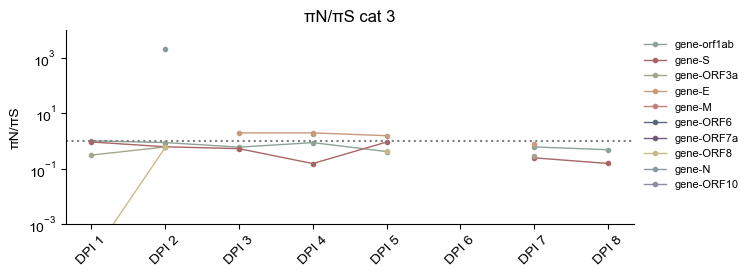

In [51]:
# merge all plots for each pair into one figure 

# generate a figure with sub-plots (one for each gene segment)
fig = plt.figure(figsize=(10,10), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(4, 6)

ax1 = fig.add_subplot(gs[0,0:4])

# get right of top and right frame of each subplot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)

# create a marker palette
colors = itertools.cycle(('#8DA395','#A86566','#A4A58C','#CB997D', '#C87F7F', '#59667C', '#715C7C', '#CCBA85', '#8B9AA0', '#938AA0')) 

# plot the synonymous lines 
num=0
for column in df3n_T:
    num+=1
    ax1.plot(df3n_T[column], marker='.', linewidth=1, alpha=1, label=column, linestyle='solid', color=next(colors))

# add title and x axis text
ax1.set(xlabel="",ylabel="πN/πS")

# adjust axes
ax1.set_yscale('log')
ax1.set_ylim([0.001, 10000])

#plot horizontal line at y=1
plt.axhline(y=1, color='grey', linestyle='dotted')

# add legend
ax1.legend(bbox_to_anchor=(1.0, 1.0), fontsize=8, frameon=False, ncol=1)

ax1.title.set_text('πN/πS cat 3')

# rotate x tick labels 45 degrees
plt.setp(ax1.get_xticklabels(), rotation=45)
    
# use tight_layout to optimize spacing of axes and titles within each subplot
plt.tight_layout()

#save figure 
plt.savefig("../figures/cat3_πN_over_πS.svg", bbox_inches='tight', dpi=300)

# #

In [52]:
#calculate piN/piS

df4_3['DPI 3'] = df4_3['piN_avg_3'] / df4_3['piS_avg_3']
df4_3n = df4_3[['DPI 3']]

df4_4['DPI 4'] = df4_4['piN_avg_4'] / df4_4['piS_avg_4']
df4_4n = df4_4[['DPI 4']]

df4_5['DPI 5'] = df4_5['piN_avg_5'] / df4_5['piS_avg_5']
df4_5n = df4_5[['DPI 5']]

df4_6['DPI 6'] = df4_6['piN_avg_6'] / df4_6['piS_avg_6']
df4_6n = df4_6[['DPI 6']]

df4_7['DPI 7'] = df4_7['piN_avg_7'] / df4_7['piS_avg_7']
df4_7n = df4_7[['DPI 7']]

df4_8['DPI 8'] = df4_8['piN_avg_8'] / df4_8['piS_avg_8']
df4_8n = df4_8[['DPI 8']]

df4_9['DPI 9'] = df4_9['piN_avg_9'] / df4_9['piS_avg_9']
df4_9n = df4_9[['DPI 9']]

df4_10['DPI 10'] = df4_10['piN_avg_10'] / df4_10['piS_avg_10']
df4_10n = df4_10[['DPI 10']]

df4n = pd.concat([df4_3n, df4_4n, df4_5n, df4_6n, df4_7n, df4_8n, df4_9n, df4_10n], axis=1)

df4n_T = df4n.T

df4n_T = df4n_T.replace(np.inf, np.nan)
df4n_T = df4n_T.replace(0, np.nan)

df4n_T

#

product    gene-orf1ab         gene-S     gene-ORF3a             gene-E  \
DPI 3   0.778252797529 0.245362310351 0.154208211498                nan   
DPI 4   0.631385785694 2.147703905362            nan                nan   
DPI 5   0.939180270836 0.821034042244            nan                nan   
DPI 6   0.580090042306 0.271225753280            nan     0.184501215940   
DPI 7   0.464741354302 0.457682565975 0.315183301374                nan   
DPI 8   0.493287531693 0.515401933324            nan 2,690.945799554382   
DPI 9   0.969839671362            nan            nan                nan   
DPI 10  0.505398241988 0.722017060615 0.946369748299                nan   

product         gene-M  gene-ORF6     gene-ORF7a      gene-ORF8  \
DPI 3              nan        nan            nan 0.000015624613   
DPI 4              nan        nan            nan 0.600017529215   
DPI 5              nan        nan 0.108856328719 0.101038096724   
DPI 6              nan        nan            nan 0.000027327032   
DPI 7              nan        nan            nan            nan   
DPI 8   2.005136730364        nan 0.649028369077 0.000016230670   
DPI 9              nan        nan            nan            nan   
DPI 10             nan        nan            nan 0.008998081853   

product         gene-N     gene-ORF10  
DPI 3   0.108592461071            nan  
DPI 4   0.321148306349            nan  
DPI 5   0.612720601741 0.282988657475  
DPI 6   0.326523987426            nan  
DPI 7              nan            nan  
DPI 8   0.654266738265            nan  
DPI 9              nan            nan  
DPI 10             nan            nan

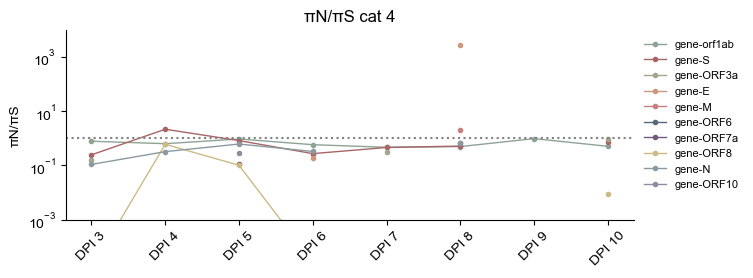

In [53]:
# merge all plots for each pair into one figure 

# generate a figure with sub-plots (one for each gene segment)
fig = plt.figure(figsize=(10,10), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(4, 6)

ax1 = fig.add_subplot(gs[0,0:4])

# get right of top and right frame of each subplot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)

# create a marker palette
colors = itertools.cycle(('#8DA395','#A86566','#A4A58C','#CB997D', '#C87F7F', '#59667C', '#715C7C', '#CCBA85', '#8B9AA0', '#938AA0')) 

# plot the synonymous lines 
num=0
for column in df4n_T:
    num+=1
    ax1.plot(df4n_T[column], marker='.', linewidth=1, alpha=1, label=column, linestyle='solid', color=next(colors))

# add title and x axis text
ax1.set(xlabel="",ylabel="πN/πS")

# adjust axes
ax1.set_yscale('log')
ax1.set_ylim([0.001, 10000])

#plot horizontal line at y=1
plt.axhline(y=1, color='grey', linestyle='dotted')

# add legend
ax1.legend(bbox_to_anchor=(1.0, 1.0), fontsize=8, frameon=False, ncol=1)

ax1.title.set_text('πN/πS cat 4')

# rotate x tick labels 45 degrees
plt.setp(ax1.get_xticklabels(), rotation=45)
    
# use tight_layout to optimize spacing of axes and titles within each subplot
plt.tight_layout()

#save figure 
plt.savefig("../figures/cat4_πN_over_πS.svg", bbox_inches='tight', dpi=300)

# #

In [54]:
#calculate piN/piS

df5_3['DPI 3'] = df5_3['piN_avg_3'] / df5_3['piS_avg_3']
df5_3n = df5_3[['DPI 3']]

df5_4['DPI 4'] = df5_4['piN_avg_4'] / df5_4['piS_avg_4']
df5_4n = df5_4[['DPI 4']]

df5_5['DPI 5'] = df5_5['piN_avg_5'] / df5_5['piS_avg_5']
df5_5n = df5_5[['DPI 5']]

df5_6['DPI 6'] = df5_6['piN_avg_6'] / df5_6['piS_avg_6']
df5_6n = df5_6[['DPI 6']]

df5_7['DPI 7'] = df5_7['piN_avg_7'] / df5_7['piS_avg_7']
df5_7n = df5_7[['DPI 7']]

df5_8['DPI 8'] = df5_8['piN_avg_8'] / df5_8['piS_avg_8']
df5_8n = df5_8[['DPI 8']]

df5_9['DPI 9'] = df5_9['piN_avg_9'] / df5_9['piS_avg_9']
df5_9n = df5_9[['DPI 9']]

df5_10['DPI 10'] = df5_10['piN_avg_10'] / df5_10['piS_avg_10']
df5_10n = df5_10[['DPI 10']]

df5n = pd.concat([df5_3n, df5_4n, df5_5n, df5_6n, df5_7n, df5_8n, df5_9n, df5_10n], axis=1)

df5n_T = df5n.T

df5n_T = df5n_T.replace(np.inf, np.nan)
df5n_T = df5n_T.replace(0, np.nan)

df5n_T

#

product    gene-orf1ab         gene-S     gene-ORF3a  gene-E  gene-M  \
DPI 3   1.110971404891 0.007623821580            nan     nan     nan   
DPI 4   0.428332404739 0.103459651762            nan     nan     nan   
DPI 5   0.276200410667            nan            nan     nan     nan   
DPI 6   0.386029814821 0.255993290372 0.238576820442     nan     nan   
DPI 7   0.873482134812 0.301454526762            nan     nan     nan   
DPI 8   0.527671199089 0.076959252630 0.153572342861     nan     nan   
DPI 9   0.543580782269 0.899025103378 0.157775142218     nan     nan   
DPI 10  0.515082407463 0.698688965837 0.186569299071     nan     nan   

product  gene-ORF6  gene-ORF7a      gene-ORF8             gene-N  gene-ORF10  
DPI 3          nan         nan            nan                nan         nan  
DPI 4          nan         nan 0.000010118742                nan         nan  
DPI 5          nan         nan 0.000093199184                nan         nan  
DPI 6          nan         nan 0.000022442260     0.156523459733         nan  
DPI 7          nan         nan 0.000013739101     0.319897583186         nan  
DPI 8          nan         nan 0.000025646531     0.481037120695         nan  
DPI 9          nan         nan 0.000023887629     0.313433762354         nan  
DPI 10         nan         nan 0.000020394867 3,825.939842397488         nan

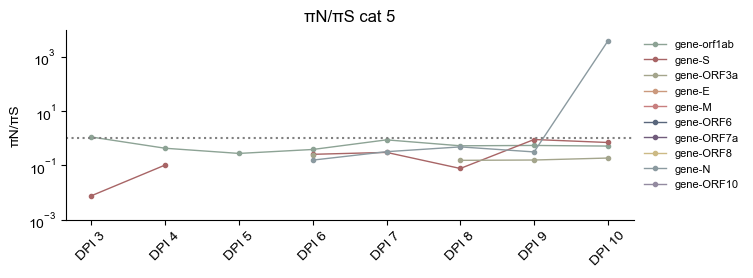

In [55]:
# merge all plots for each pair into one figure 

# generate a figure with sub-plots (one for each gene segment)
fig = plt.figure(figsize=(10,10), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(4, 6)

ax1 = fig.add_subplot(gs[0,0:4])

# get right of top and right frame of each subplot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)

# create a marker palette
colors = itertools.cycle(('#8DA395','#A86566','#A4A58C','#CB997D', '#C87F7F', '#59667C', '#715C7C', '#CCBA85', '#8B9AA0', '#938AA0')) 

# plot the synonymous lines 
num=0
for column in df5n_T:
    num+=1
    ax1.plot(df5n_T[column], marker='.', linewidth=1, alpha=1, label=column, linestyle='solid', color=next(colors))

# add title and x axis text
ax1.set(xlabel="",ylabel="πN/πS")

# adjust axes
ax1.set_yscale('log')
ax1.set_ylim([0.001, 10000])

#plot horizontal line at y=1
plt.axhline(y=1, color='grey', linestyle='dotted')

# add legend
ax1.legend(bbox_to_anchor=(1.0, 1.0), fontsize=8, frameon=False, ncol=1)

ax1.title.set_text('πN/πS cat 5')

# rotate x tick labels 45 degrees
plt.setp(ax1.get_xticklabels(), rotation=45)
    
# use tight_layout to optimize spacing of axes and titles within each subplot
plt.tight_layout()

#save figure 
plt.savefig("../figures/cat5_πN_over_πS.svg", bbox_inches='tight', dpi=300)

# #

In [56]:
#calculate piN/piS

df6_3['DPI 3'] = df6_3['piN_avg_3'] / df6_3['piS_avg_3']
df6_3n = df6_3[['DPI 3']]

df6_4['DPI 4'] = df6_4['piN_avg_4'] / df6_4['piS_avg_4']
df6_4n = df6_4[['DPI 4']]

df6_5['DPI 5'] = df6_5['piN_avg_5'] / df6_5['piS_avg_5']
df6_5n = df6_5[['DPI 5']]

df6_6['DPI 6'] = df6_6['piN_avg_6'] / df6_6['piS_avg_6']
df6_6n = df6_6[['DPI 6']]

df6_7['DPI 7'] = df6_7['piN_avg_7'] / df6_7['piS_avg_7']
df6_7n = df6_7[['DPI 7']]

df6_8['DPI 8'] = df6_8['piN_avg_8'] / df6_8['piS_avg_8']
df6_8n = df6_8[['DPI 8']]

df6_9['DPI 9'] = df6_9['piN_avg_9'] / df6_9['piS_avg_9']
df6_9n = df6_9[['DPI 9']]

df6_10['DPI 10'] = df6_10['piN_avg_10'] / df6_10['piS_avg_10']
df6_10n = df6_10[['DPI 10']]

df6n = pd.concat([df6_3n, df6_4n, df6_5n, df6_6n, df6_7n, df6_8n, df6_9n, df6_10n], axis=1)

df6n_T = df6n.T

df6n_T = df6n_T.replace(np.inf, np.nan)
df6n_T = df6n_T.replace(0, np.nan)

df6n_T

#

product    gene-orf1ab         gene-S     gene-ORF3a  gene-E  gene-M  \
DPI 3   0.149396737979            nan            nan     nan     nan   
DPI 4              nan 0.147158650265            nan     nan     nan   
DPI 5   0.663237006777 0.147939468986            nan     nan     nan   
DPI 6   0.261478378733            nan            nan     nan     nan   
DPI 7              nan            nan            nan     nan     nan   
DPI 8   0.779280668568 0.403460729870 0.312483304785     nan     nan   
DPI 9              nan            nan            nan     nan     nan   
DPI 10             nan            nan            nan     nan     nan   

product  gene-ORF6  gene-ORF7a      gene-ORF8         gene-N  gene-ORF10  
DPI 3          nan         nan 0.008973676885            nan         nan  
DPI 4          nan         nan            nan            nan         nan  
DPI 5          nan         nan 0.000010101645 0.159303585710         nan  
DPI 6          nan         nan            nan            nan         nan  
DPI 7          nan         nan            nan            nan         nan  
DPI 8          nan         nan 0.000032674054            nan         nan  
DPI 9          nan         nan            nan            nan         nan  
DPI 10         nan         nan            nan            nan         nan

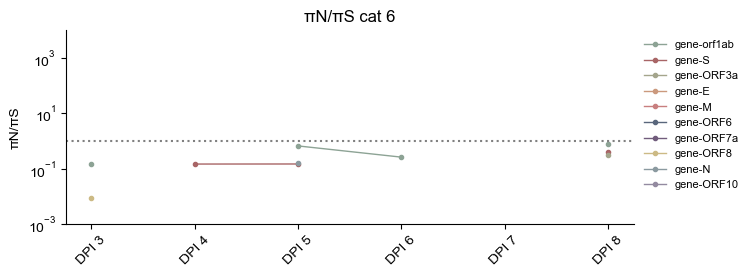

In [57]:
# merge all plots for each pair into one figure 

# generate a figure with sub-plots (one for each gene segment)
fig = plt.figure(figsize=(10,10), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(4, 6)

ax1 = fig.add_subplot(gs[0,0:4])

# get right of top and right frame of each subplot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)

# create a marker palette
colors = itertools.cycle(('#8DA395','#A86566','#A4A58C','#CB997D', '#C87F7F', '#59667C', '#715C7C', '#CCBA85', '#8B9AA0', '#938AA0')) 

# plot the synonymous lines 
num=0
for column in df6n_T:
    num+=1
    ax1.plot(df6n_T[column], marker='.', linewidth=1, alpha=1, label=column, linestyle='solid', color=next(colors))

# add title and x axis text
ax1.set(xlabel="",ylabel="πN/πS")

# adjust axes
ax1.set_yscale('log')
ax1.set_ylim([0.001, 10000])

#plot horizontal line at y=1
plt.axhline(y=1, color='grey', linestyle='dotted')

# add legend
ax1.legend(bbox_to_anchor=(1.0, 1.0), fontsize=8, frameon=False, ncol=1)

ax1.title.set_text('πN/πS cat 6')

# rotate x tick labels 45 degrees
plt.setp(ax1.get_xticklabels(), rotation=45)
    
# use tight_layout to optimize spacing of axes and titles within each subplot
plt.tight_layout()

#save figure 
plt.savefig("../figures/cat6_πN_over_πS.svg", bbox_inches='tight', dpi=300)

# #

## create a table with πN and πS and πN/πS 
### will probably use this as a supplemental table & will use to run some t-tests 

In [100]:
syn_cat1 = syn_cat1.rename(columns={'ORF1ab':'ORF1ab_πS', 'S':'S_πS', 'ORF3a':'ORF3a_πS', 'E':'E_πS', 'M':'M_πS', 'ORF6':'ORF6_πS', 'ORF7a':'ORF7a_πS', 'ORF8':'ORF8_πS', 'N':'N_πS', 'ORF10':'ORF10_πS'})
nonsyn_cat1 = nonsyn_cat1.rename(columns={'ORF1ab':'ORF1ab_πN', 'S':'S_πN', 'ORF3a':'ORF3a_πN', 'E':'E_πN', 'M':'M_πN', 'ORF6':'ORF6_πN', 'ORF7a':'ORF7a_πN', 'ORF8':'ORF8_πN', 'N':'N_πN', 'ORF10':'ORF10_πN'})

cat1 = pd.concat([syn_cat1, nonsyn_cat1], axis=1)

cat1['ORF1ab_πN_πS'] = cat1['ORF1ab_πN'] / cat1['ORF1ab_πS']
cat1['S_πN_πS'] = cat1['S_πN'] / cat1['S_πS']
cat1['ORF3a_πN_πS'] = cat1['ORF3a_πN'] / cat1['ORF3a_πS']
cat1['E_πN_πS'] = cat1['E_πN'] / cat1['E_πS']
cat1['M_πN_πS'] = cat1['M_πN'] / cat1['M_πS']
cat1['ORF6_πN_πS'] = cat1['ORF6_πN'] / cat1['ORF6_πS']
cat1['ORF7a_πN_πS'] = cat1['ORF7a_πN'] / cat1['ORF7a_πS']
cat1['ORF8_πN_πS'] = cat1['ORF8_πN'] / cat1['ORF8_πS']
cat1['N_πN_πS'] = cat1['N_πN'] / cat1['N_πS']
cat1['ORF10_πN_πS'] = cat1['ORF10_πN'] / cat1['ORF10_πS']

ORF1ab_πN_πS = cat1['ORF1ab_πN_πS'].mean()
S_πN_πS = cat1['S_πN_πS'].mean()
ORF3a_πN_πS = cat1['ORF3a_πN_πS'].mean()
E_πN_πS = cat1['E_πN_πS'].mean()
M_πN_πS = cat1['M_πN_πS'].mean()
ORF6_πN_πS = cat1['ORF6_πN_πS'].mean()
ORF7a_πN_πS = cat1['ORF7a_πN_πS'].mean()
ORF8_πN_πS = cat1['ORF8_πN_πS'].mean()
N_πN_πS = cat1['N_πN_πS'].mean()
ORF10_πN_πS = cat1['ORF10_πN_πS'].mean()

# cat1 = cat1[['ORF1ab_πN/πS', 'S_πN/πS', 'ORF3a_πN/πS', 'E_πN/πS', 'M_πN/πS', 'ORF6_πN/πS', 'ORF7a_πN/πS', 'ORF8_πN/πS', 'N_πN/πS', 'ORF10_πN/πS']]

# cat1 = cat1[['ORF1ab_πS', 'ORF1ab_πN', 'S_πS', 'S_πN', 'ORF3a_πS', 'ORF3a_πN', 'E_πS', 'E_πN', 'M_πS', 'M_πN', 'ORF6_πS', 'ORF6_πN', 'ORF7a_πS', 'ORF7a_πN', 'ORF8_πS', 'ORF8_πN', 'N_πS', 'N_πN', 'ORF10_πS', 'ORF10_πN']]

ttest_ORF1ab = ttest_ind(cat1['ORF1ab_πS'].dropna(), cat1['ORF1ab_πN'].dropna())
ttest_S = ttest_ind(cat1['S_πS'].dropna(), cat1['S_πN'].dropna())
ttest_ORF3a = ttest_ind(cat1['ORF3a_πS'].dropna(), cat1['ORF3a_πN'].dropna())
ttest_E = ttest_ind(cat1['E_πS'].dropna(), cat1['E_πN'].dropna())
ttest_M = ttest_ind(cat1['M_πS'].dropna(), cat1['M_πN'].dropna())
ttest_ORF6 = ttest_ind(cat1['ORF6_πS'].dropna(), cat1['ORF6_πN'].dropna())
ttest_ORF7a = ttest_ind(cat1['ORF7a_πS'].dropna(), cat1['ORF7a_πN'].dropna())
ttest_ORF8 = ttest_ind(cat1['ORF8_πS'].dropna(), cat1['ORF8_πN'].dropna())
ttest_N = ttest_ind(cat1['N_πS'].dropna(), cat1['N_πN'].dropna())
ttest_ORF10 = ttest_ind(cat1['ORF10_πS'].dropna(), cat1['ORF10_πN'].dropna())

avg_ORF1ab_πS = cat1['ORF1ab_πS'].mean()
avg_ORF1ab_πN = cat1['ORF1ab_πN'].mean()
std_ORF1ab_πS = cat1['ORF1ab_πS'].std()
std_ORF1ab_πN = cat1['ORF1ab_πN'].std()

avg_S_πS = cat1['S_πS'].mean()
avg_S_πN = cat1['S_πN'].mean()
std_S_πS = cat1['S_πS'].std()
std_S_πN = cat1['S_πN'].std()

avg_ORF3a_πS = cat1['ORF3a_πS'].mean()
avg_ORF3a_πN = cat1['ORF3a_πN'].mean()
std_ORF3a_πS = cat1['ORF3a_πS'].std()
std_ORF3a_πN = cat1['ORF3a_πN'].std()

avg_E_πS = cat1['E_πS'].mean()
avg_E_πN = cat1['E_πN'].mean()
std_E_πS = cat1['E_πS'].std()
std_E_πN = cat1['E_πN'].std()

avg_M_πS = cat1['M_πS'].mean()
avg_M_πN = cat1['M_πN'].mean()
std_M_πS = cat1['M_πS'].std()
std_M_πN = cat1['M_πN'].std()

avg_ORF6_πS = cat1['ORF6_πS'].mean()
avg_ORF6_πN = cat1['ORF6_πN'].mean()
std_ORF6_πS = cat1['ORF6_πS'].std()
std_ORF6_πN = cat1['ORF6_πN'].std()

avg_ORF7a_πS = cat1['ORF7a_πS'].mean()
avg_ORF7a_πN = cat1['ORF7a_πN'].mean()
std_ORF7a_πS = cat1['ORF7a_πS'].std()
std_ORF7a_πN = cat1['ORF7a_πN'].std()

avg_ORF8_πS = cat1['ORF8_πS'].mean()
avg_ORF8_πN = cat1['ORF8_πN'].mean()
std_ORF8_πS = cat1['ORF8_πS'].std()
std_ORF8_πN = cat1['ORF8_πN'].std()

avg_N_πS = cat1['N_πS'].mean()
avg_N_πN = cat1['N_πN'].mean()
std_N_πS = cat1['N_πS'].std()
std_N_πN = cat1['N_πN'].std()

avg_ORF10_πS = cat1['ORF10_πS'].mean()
avg_ORF10_πN = cat1['ORF10_πN'].mean()
std_ORF10_πS = cat1['ORF10_πS'].std()
std_ORF10_πN = cat1['ORF10_πN'].std()

# fill a new dataframe 

data_cat1 = [[avg_ORF1ab_πS, std_ORF1ab_πS, avg_ORF1ab_πN, std_ORF1ab_πN, ORF1ab_πN_πS, ttest_ORF1ab], [avg_S_πS, std_S_πS, avg_S_πN, std_S_πN, S_πN_πS, ttest_S], [avg_ORF3a_πS, std_ORF3a_πS, avg_ORF3a_πN, std_ORF3a_πN, ORF3a_πN_πS, ttest_ORF3a],[avg_E_πS, std_E_πS, avg_E_πN, std_E_πN, E_πN_πS, ttest_E],[avg_M_πS, std_M_πS, avg_M_πN, std_M_πN, M_πN_πS, ttest_M], [avg_ORF6_πS, std_ORF6_πS, avg_ORF6_πN, std_ORF6_πN, ORF6_πN_πS, ttest_ORF6], [avg_ORF7a_πS, std_ORF7a_πS, avg_ORF7a_πN, std_ORF7a_πN, ORF7a_πN_πS, ttest_ORF7a], [avg_ORF8_πS, std_ORF8_πS, avg_ORF8_πN, std_ORF8_πN, ORF8_πN_πS, ttest_ORF8], [avg_N_πS, std_N_πS, avg_N_πN, std_N_πN, N_πN_πS, ttest_N], [avg_ORF10_πS, std_ORF10_πS, avg_ORF10_πN, std_ORF10_πN, ORF10_πN_πS, ttest_ORF10]]  

cat1_nt_diversity = pd.DataFrame(data_cat1, columns = ['mean πS', 'std πS', 'mean πN', 'std πN', 'πN/πS', 'p-value'])

cat1_nt_diversity.index = ['ORF1ab', 'S', 'ORF3a', 'E', 'M', 'ORF6', 'ORF7a', 'ORF8', 'N', 'ORF10'] 

cat1_nt_diversity.to_csv('../data_derived/diversity/cat1_πN_and_πS_differences.csv', sep='\t')

# cat1_nt_diversity = cat1_nt_diversity.style.set_caption('index cat 1')

cat1_nt_diversity

#

mean πS         std πS        mean πN         std πN  \
ORF1ab 0.003254899263 0.000790575122 0.001729725636 0.000733024296   
S      0.001564329706 0.000599897295 0.000644412569 0.000467237165   
ORF3a  0.005366697274 0.000000863999 0.005878148377 0.002267179484   
E      0.011706915788 0.010139154789 0.011930123572 0.005718982767   
M                 nan            nan 0.002138025574 0.000059134729   
ORF6              nan            nan 0.007394829097            nan   
ORF7a  0.011992168965 0.000486884926            nan            nan   
ORF8   0.031185570654 0.012756366546 0.000000694627 0.000000317283   
N      0.002627939822 0.003114888124 0.002847384835 0.000629889588   
ORF10             nan            nan            nan            nan   

                  πN/πS                                       p-value  
ORF1ab   0.522877719550    (4.001279384471781, 0.0013127516712526026)  
S        0.413995338773    (3.3373872948409917, 0.005348877933120044)  
ORF3a    0.641899015115    (-0.30265960608105535, 0.7723676435255207)  
E        0.719600666620    (-0.04563882149954802, 0.9647168039234166)  
M                   nan                                    (nan, nan)  
ORF6                nan                                    (nan, nan)  
ORF7a               nan                                    (nan, nan)  
ORF8     0.000022109580  (7.0126030049840935, 1.4092716978331159e-05)  
N      517.849692663355    (-0.15313454345365826, 0.8810651830635272)  
ORF10               nan                                    (nan, nan)

In [101]:
syn_cat2 = syn_cat2.rename(columns={'ORF1ab':'ORF1ab_πS', 'S':'S_πS', 'ORF3a':'ORF3a_πS', 'E':'E_πS', 'M':'M_πS', 'ORF6':'ORF6_πS', 'ORF7a':'ORF7a_πS', 'ORF8':'ORF8_πS', 'N':'N_πS', 'ORF10':'ORF10_πS'})
nonsyn_cat2 = nonsyn_cat2.rename(columns={'ORF1ab':'ORF1ab_πN', 'S':'S_πN', 'ORF3a':'ORF3a_πN', 'E':'E_πN', 'M':'M_πN', 'ORF6':'ORF6_πN', 'ORF7a':'ORF7a_πN', 'ORF8':'ORF8_πN', 'N':'N_πN', 'ORF10':'ORF10_πN'})

cat2 = pd.concat([syn_cat2, nonsyn_cat2], axis=1)

cat2['ORF1ab_πN_πS'] = cat2['ORF1ab_πN'] / cat2['ORF1ab_πS']
cat2['S_πN_πS'] = cat2['S_πN'] / cat2['S_πS']
cat2['ORF3a_πN_πS'] = cat2['ORF3a_πN'] / cat2['ORF3a_πS']
cat2['E_πN_πS'] = cat2['E_πN'] / cat2['E_πS']
cat2['M_πN_πS'] = cat2['M_πN'] / cat2['M_πS']
cat2['ORF6_πN_πS'] = cat2['ORF6_πN'] / cat2['ORF6_πS']
cat2['ORF7a_πN_πS'] = cat2['ORF7a_πN'] / cat2['ORF7a_πS']
cat2['ORF8_πN_πS'] = cat2['ORF8_πN'] / cat2['ORF8_πS']
cat2['N_πN_πS'] = cat2['N_πN'] / cat2['N_πS']
cat2['ORF10_πN_πS'] = cat2['ORF10_πN'] / cat2['ORF10_πS']

ORF1ab_πN_πS = cat2['ORF1ab_πN_πS'].mean()
S_πN_πS = cat2['S_πN_πS'].mean()
ORF3a_πN_πS = cat2['ORF3a_πN_πS'].mean()
E_πN_πS = cat2['E_πN_πS'].mean()
M_πN_πS = cat2['M_πN_πS'].mean()
ORF6_πN_πS = cat2['ORF6_πN_πS'].mean()
ORF7a_πN_πS = cat2['ORF7a_πN_πS'].mean()
ORF8_πN_πS = cat2['ORF8_πN_πS'].mean()
N_πN_πS = cat2['N_πN_πS'].mean()
ORF10_πN_πS = cat2['ORF10_πN_πS'].mean()

# cat2 = cat2[['ORF1ab_πN/πS', 'S_πN/πS', 'ORF3a_πN/πS', 'E_πN/πS', 'M_πN/πS', 'ORF6_πN/πS', 'ORF7a_πN/πS', 'ORF8_πN/πS', 'N_πN/πS', 'ORF10_πN/πS']]

# cat2 = cat2[['ORF1ab_πS', 'ORF1ab_πN', 'S_πS', 'S_πN', 'ORF3a_πS', 'ORF3a_πN', 'E_πS', 'E_πN', 'M_πS', 'M_πN', 'ORF6_πS', 'ORF6_πN', 'ORF7a_πS', 'ORF7a_πN', 'ORF8_πS', 'ORF8_πN', 'N_πS', 'N_πN', 'ORF10_πS', 'ORF10_πN']]

ttest_ORF1ab = ttest_ind(cat2['ORF1ab_πS'].dropna(), cat2['ORF1ab_πN'].dropna())
ttest_S = ttest_ind(cat2['S_πS'].dropna(), cat2['S_πN'].dropna())
ttest_ORF3a = ttest_ind(cat2['ORF3a_πS'].dropna(), cat2['ORF3a_πN'].dropna())
ttest_E = ttest_ind(cat2['E_πS'].dropna(), cat2['E_πN'].dropna())
ttest_M = ttest_ind(cat2['M_πS'].dropna(), cat2['M_πN'].dropna())
ttest_ORF6 = ttest_ind(cat2['ORF6_πS'].dropna(), cat2['ORF6_πN'].dropna())
ttest_ORF7a = ttest_ind(cat2['ORF7a_πS'].dropna(), cat2['ORF7a_πN'].dropna())
ttest_ORF8 = ttest_ind(cat2['ORF8_πS'].dropna(), cat2['ORF8_πN'].dropna())
ttest_N = ttest_ind(cat2['N_πS'].dropna(), cat2['N_πN'].dropna())
ttest_ORF10 = ttest_ind(cat2['ORF10_πS'].dropna(), cat2['ORF10_πN'].dropna())

avg_ORF1ab_πS = cat2['ORF1ab_πS'].mean()
avg_ORF1ab_πN = cat2['ORF1ab_πN'].mean()
std_ORF1ab_πS = cat2['ORF1ab_πS'].std()
std_ORF1ab_πN = cat2['ORF1ab_πN'].std()

avg_S_πS = cat2['S_πS'].mean()
avg_S_πN = cat2['S_πN'].mean()
std_S_πS = cat2['S_πS'].std()
std_S_πN = cat2['S_πN'].std()

avg_ORF3a_πS = cat2['ORF3a_πS'].mean()
avg_ORF3a_πN = cat2['ORF3a_πN'].mean()
std_ORF3a_πS = cat2['ORF3a_πS'].std()
std_ORF3a_πN = cat2['ORF3a_πN'].std()

avg_E_πS = cat2['E_πS'].mean()
avg_E_πN = cat2['E_πN'].mean()
std_E_πS = cat2['E_πS'].std()
std_E_πN = cat2['E_πN'].std()

avg_M_πS = cat2['M_πS'].mean()
avg_M_πN = cat2['M_πN'].mean()
std_M_πS = cat2['M_πS'].std()
std_M_πN = cat2['M_πN'].std()

avg_ORF6_πS = cat2['ORF6_πS'].mean()
avg_ORF6_πN = cat2['ORF6_πN'].mean()
std_ORF6_πS = cat2['ORF6_πS'].std()
std_ORF6_πN = cat2['ORF6_πN'].std()

avg_ORF7a_πS = cat2['ORF7a_πS'].mean()
avg_ORF7a_πN = cat2['ORF7a_πN'].mean()
std_ORF7a_πS = cat2['ORF7a_πS'].std()
std_ORF7a_πN = cat2['ORF7a_πN'].std()

avg_ORF8_πS = cat2['ORF8_πS'].mean()
avg_ORF8_πN = cat2['ORF8_πN'].mean()
std_ORF8_πS = cat2['ORF8_πS'].std()
std_ORF8_πN = cat2['ORF8_πN'].std()

avg_N_πS = cat2['N_πS'].mean()
avg_N_πN = cat2['N_πN'].mean()
std_N_πS = cat2['N_πS'].std()
std_N_πN = cat2['N_πN'].std()

avg_ORF10_πS = cat2['ORF10_πS'].mean()
avg_ORF10_πN = cat2['ORF10_πN'].mean()
std_ORF10_πS = cat2['ORF10_πS'].std()
std_ORF10_πN = cat2['ORF10_πN'].std()

# fill a new dataframe 

data_cat2 = [[avg_ORF1ab_πS, std_ORF1ab_πS, avg_ORF1ab_πN, std_ORF1ab_πN, ORF1ab_πN_πS, ttest_ORF1ab], [avg_S_πS, std_S_πS, avg_S_πN, std_S_πN, S_πN_πS, ttest_S], [avg_ORF3a_πS, std_ORF3a_πS, avg_ORF3a_πN, std_ORF3a_πN, ORF3a_πN_πS, ttest_ORF3a],[avg_E_πS, std_E_πS, avg_E_πN, std_E_πN, E_πN_πS, ttest_E],[avg_M_πS, std_M_πS, avg_M_πN, std_M_πN, M_πN_πS, ttest_M], [avg_ORF6_πS, std_ORF6_πS, avg_ORF6_πN, std_ORF6_πN, ORF6_πN_πS, ttest_ORF6], [avg_ORF7a_πS, std_ORF7a_πS, avg_ORF7a_πN, std_ORF7a_πN, ORF7a_πN_πS, ttest_ORF7a], [avg_ORF8_πS, std_ORF8_πS, avg_ORF8_πN, std_ORF8_πN, ORF8_πN_πS, ttest_ORF8], [avg_N_πS, std_N_πS, avg_N_πN, std_N_πN, N_πN_πS, ttest_N], [avg_ORF10_πS, std_ORF10_πS, avg_ORF10_πN, std_ORF10_πN, ORF10_πN_πS, ttest_ORF10]]  

cat2_nt_diversity = pd.DataFrame(data_cat2, columns = ['mean πS', 'std πS', 'mean πN', 'std πN', 'πN/πS', 'p-value'])

cat2_nt_diversity.index = ['ORF1ab', 'S', 'ORF3a', 'E', 'M', 'ORF6', 'ORF7a', 'ORF8', 'N', 'ORF10'] 

cat2_nt_diversity.to_csv('../data_derived/diversity/cat2_πN_and_πS_differences.csv', sep='\t')

# cat2_nt_diversity = cat2_nt_diversity.style.set_caption('index cat 2')

cat2_nt_diversity

#

mean πS         std πS        mean πN         std πN  \
ORF1ab 0.004580288010 0.001080955181 0.002806538039 0.000737432071   
S      0.004499044257 0.002513152548 0.001475966710 0.000556205522   
ORF3a  0.008659907518 0.003051869379 0.003867129767 0.001629632445   
E      0.008410387913 0.009695572414 0.015841654199 0.010396372680   
M                 nan            nan 0.002479397945 0.000840508450   
ORF6              nan            nan 0.007467994310            nan   
ORF7a  0.011871927090            nan            nan            nan   
ORF8   0.030327844555 0.012095518407 0.001418808058 0.002806537378   
N      0.003495521933 0.004950036745 0.001398098918 0.000534669395   
ORF10             nan            nan            nan            nan   

                  πN/πS                                       p-value  
ORF1ab   0.619270302553     (3.833992425018132, 0.001824232550792722)  
S        0.465361979164    (3.3219378035647504, 0.005037527063330201)  
ORF3a    0.535879317206    (3.549084624668641, 0.0052762827836687716)  
E      436.372254675262     (-1.1907542106416624, 0.2612478621551355)  
M                   nan                                    (nan, nan)  
ORF6                nan                                    (nan, nan)  
ORF7a               nan                                    (nan, nan)  
ORF8     0.064185339960  (6.5936430679254725, 1.7323245697619232e-05)  
N      222.931735846866      (0.8249543255824092, 0.4286372063514504)  
ORF10               nan                                    (nan, nan)

In [102]:
syn_cat3 = syn_cat3.rename(columns={'ORF1ab':'ORF1ab_πS', 'S':'S_πS', 'ORF3a':'ORF3a_πS', 'E':'E_πS', 'M':'M_πS', 'ORF6':'ORF6_πS', 'ORF7a':'ORF7a_πS', 'ORF8':'ORF8_πS', 'N':'N_πS', 'ORF10':'ORF10_πS'})
nonsyn_cat3 = nonsyn_cat3.rename(columns={'ORF1ab':'ORF1ab_πN', 'S':'S_πN', 'ORF3a':'ORF3a_πN', 'E':'E_πN', 'M':'M_πN', 'ORF6':'ORF6_πN', 'ORF7a':'ORF7a_πN', 'ORF8':'ORF8_πN', 'N':'N_πN', 'ORF10':'ORF10_πN'})

cat3 = pd.concat([syn_cat3, nonsyn_cat3], axis=1)

cat3['ORF1ab_πN_πS'] = cat3['ORF1ab_πN'] / cat3['ORF1ab_πS']
cat3['S_πN_πS'] = cat3['S_πN'] / cat3['S_πS']
cat3['ORF3a_πN_πS'] = cat3['ORF3a_πN'] / cat3['ORF3a_πS']
cat3['E_πN_πS'] = cat3['E_πN'] / cat3['E_πS']
cat3['M_πN_πS'] = cat3['M_πN'] / cat3['M_πS']
cat3['ORF6_πN_πS'] = cat3['ORF6_πN'] / cat3['ORF6_πS']
cat3['ORF7a_πN_πS'] = cat3['ORF7a_πN'] / cat3['ORF7a_πS']
cat3['ORF8_πN_πS'] = cat3['ORF8_πN'] / cat3['ORF8_πS']
cat3['N_πN_πS'] = cat3['N_πN'] / cat3['N_πS']
cat3['ORF10_πN_πS'] = cat3['ORF10_πN'] / cat3['ORF10_πS']

ORF1ab_πN_πS = cat3['ORF1ab_πN_πS'].mean()
S_πN_πS = cat3['S_πN_πS'].mean()
ORF3a_πN_πS = cat3['ORF3a_πN_πS'].mean()
E_πN_πS = cat3['E_πN_πS'].mean()
M_πN_πS = cat3['M_πN_πS'].mean()
ORF6_πN_πS = cat3['ORF6_πN_πS'].mean()
ORF7a_πN_πS = cat3['ORF7a_πN_πS'].mean()
ORF8_πN_πS = cat3['ORF8_πN_πS'].mean()
N_πN_πS = cat3['N_πN_πS'].mean()
ORF10_πN_πS = cat3['ORF10_πN_πS'].mean()

# cat3 = cat3[['ORF1ab_πN/πS', 'S_πN/πS', 'ORF3a_πN/πS', 'E_πN/πS', 'M_πN/πS', 'ORF6_πN/πS', 'ORF7a_πN/πS', 'ORF8_πN/πS', 'N_πN/πS', 'ORF10_πN/πS']]

# cat3 = cat3[['ORF1ab_πS', 'ORF1ab_πN', 'S_πS', 'S_πN', 'ORF3a_πS', 'ORF3a_πN', 'E_πS', 'E_πN', 'M_πS', 'M_πN', 'ORF6_πS', 'ORF6_πN', 'ORF7a_πS', 'ORF7a_πN', 'ORF8_πS', 'ORF8_πN', 'N_πS', 'N_πN', 'ORF10_πS', 'ORF10_πN']]

ttest_ORF1ab = ttest_ind(cat3['ORF1ab_πS'].dropna(), cat3['ORF1ab_πN'].dropna())
ttest_S = ttest_ind(cat3['S_πS'].dropna(), cat3['S_πN'].dropna())
ttest_ORF3a = ttest_ind(cat3['ORF3a_πS'].dropna(), cat3['ORF3a_πN'].dropna())
ttest_E = ttest_ind(cat3['E_πS'].dropna(), cat3['E_πN'].dropna())
ttest_M = ttest_ind(cat3['M_πS'].dropna(), cat3['M_πN'].dropna())
ttest_ORF6 = ttest_ind(cat3['ORF6_πS'].dropna(), cat3['ORF6_πN'].dropna())
ttest_ORF7a = ttest_ind(cat3['ORF7a_πS'].dropna(), cat3['ORF7a_πN'].dropna())
ttest_ORF8 = ttest_ind(cat3['ORF8_πS'].dropna(), cat3['ORF8_πN'].dropna())
ttest_N = ttest_ind(cat3['N_πS'].dropna(), cat3['N_πN'].dropna())
ttest_ORF10 = ttest_ind(cat3['ORF10_πS'].dropna(), cat3['ORF10_πN'].dropna())

avg_ORF1ab_πS = cat3['ORF1ab_πS'].mean()
avg_ORF1ab_πN = cat3['ORF1ab_πN'].mean()
std_ORF1ab_πS = cat3['ORF1ab_πS'].std()
std_ORF1ab_πN = cat3['ORF1ab_πN'].std()

avg_S_πS = cat3['S_πS'].mean()
avg_S_πN = cat3['S_πN'].mean()
std_S_πS = cat3['S_πS'].std()
std_S_πN = cat3['S_πN'].std()

avg_ORF3a_πS = cat3['ORF3a_πS'].mean()
avg_ORF3a_πN = cat3['ORF3a_πN'].mean()
std_ORF3a_πS = cat3['ORF3a_πS'].std()
std_ORF3a_πN = cat3['ORF3a_πN'].std()

avg_E_πS = cat3['E_πS'].mean()
avg_E_πN = cat3['E_πN'].mean()
std_E_πS = cat3['E_πS'].std()
std_E_πN = cat3['E_πN'].std()

avg_M_πS = cat3['M_πS'].mean()
avg_M_πN = cat3['M_πN'].mean()
std_M_πS = cat3['M_πS'].std()
std_M_πN = cat3['M_πN'].std()

avg_ORF6_πS = cat3['ORF6_πS'].mean()
avg_ORF6_πN = cat3['ORF6_πN'].mean()
std_ORF6_πS = cat3['ORF6_πS'].std()
std_ORF6_πN = cat3['ORF6_πN'].std()

avg_ORF7a_πS = cat3['ORF7a_πS'].mean()
avg_ORF7a_πN = cat3['ORF7a_πN'].mean()
std_ORF7a_πS = cat3['ORF7a_πS'].std()
std_ORF7a_πN = cat3['ORF7a_πN'].std()

avg_ORF8_πS = cat3['ORF8_πS'].mean()
avg_ORF8_πN = cat3['ORF8_πN'].mean()
std_ORF8_πS = cat3['ORF8_πS'].std()
std_ORF8_πN = cat3['ORF8_πN'].std()

avg_N_πS = cat3['N_πS'].mean()
avg_N_πN = cat3['N_πN'].mean()
std_N_πS = cat3['N_πS'].std()
std_N_πN = cat3['N_πN'].std()

avg_ORF10_πS = cat3['ORF10_πS'].mean()
avg_ORF10_πN = cat3['ORF10_πN'].mean()
std_ORF10_πS = cat3['ORF10_πS'].std()
std_ORF10_πN = cat3['ORF10_πN'].std()

# fill a new dataframe 

data_cat3 = [[avg_ORF1ab_πS, std_ORF1ab_πS, avg_ORF1ab_πN, std_ORF1ab_πN, ORF1ab_πN_πS, ttest_ORF1ab], [avg_S_πS, std_S_πS, avg_S_πN, std_S_πN, S_πN_πS, ttest_S], [avg_ORF3a_πS, std_ORF3a_πS, avg_ORF3a_πN, std_ORF3a_πN, ORF3a_πN_πS, ttest_ORF3a],[avg_E_πS, std_E_πS, avg_E_πN, std_E_πN, E_πN_πS, ttest_E],[avg_M_πS, std_M_πS, avg_M_πN, std_M_πN, M_πN_πS, ttest_M], [avg_ORF6_πS, std_ORF6_πS, avg_ORF6_πN, std_ORF6_πN, ORF6_πN_πS, ttest_ORF6], [avg_ORF7a_πS, std_ORF7a_πS, avg_ORF7a_πN, std_ORF7a_πN, ORF7a_πN_πS, ttest_ORF7a], [avg_ORF8_πS, std_ORF8_πS, avg_ORF8_πN, std_ORF8_πN, ORF8_πN_πS, ttest_ORF8], [avg_N_πS, std_N_πS, avg_N_πN, std_N_πN, N_πN_πS, ttest_N], [avg_ORF10_πS, std_ORF10_πS, avg_ORF10_πN, std_ORF10_πN, ORF10_πN_πS, ttest_ORF10]]  

cat3_nt_diversity = pd.DataFrame(data_cat3, columns = ['mean πS', 'std πS', 'mean πN', 'std πN', 'πN/πS', 'p-value'])

cat3_nt_diversity.index = ['ORF1ab', 'S', 'ORF3a', 'E', 'M', 'ORF6', 'ORF7a', 'ORF8', 'N', 'ORF10'] 

cat3_nt_diversity.to_csv('../data_derived/diversity/cat3_πN_and_πS_differences.csv', sep='\t')

# cat3_nt_diversity = cat3_nt_diversity.style.set_caption('index cat 3')

cat3_nt_diversity

#

mean πS         std πS        mean πN         std πN  \
ORF1ab 0.003855357133 0.001924010865 0.002893026148 0.000646110253   
S      0.003618827179 0.001697462551 0.001583850105 0.001031590176   
ORF3a  0.005516012880 0.000037028592 0.004351303511 0.003508750120   
E      0.016173549533 0.000531567107 0.023985158729 0.007123332679   
M      0.006491853360            nan 0.002078111531 0.000006970067   
ORF6              nan            nan            nan            nan   
ORF7a  0.012293647247 0.000305477572            nan            nan   
ORF8   0.020153582853 0.006890576577 0.003315264342 0.004647905740   
N      0.004046434755 0.003208600648 0.002220276580            nan   
ORF10             nan            nan            nan            nan   

                    πN/πS                                     p-value  
ORF1ab     0.695975140647   (1.2576267985619685, 0.23064946958056118)  
S          0.505291714786  (2.7105308691860164, 0.018936780137019715)  
ORF3a      0.764893239881    (0.6486065639772325, 0.5327910137801566)  
E          1.553581417490   (-2.1453520623194593, 0.0642386911717377)  
M                     nan                                  (nan, nan)  
ORF6                  nan                                  (nan, nan)  
ORF7a                 nan                                  (nan, nan)  
ORF8       0.203976651298  (5.30378833233237, 0.00025094805307082245)  
N      2,076.667661625307                                  (nan, nan)  
ORF10                 nan                                  (nan, nan)

# comparing total π in index vs contact cats

In [141]:
cat1 = pd.DataFrame()

rep1_1_1 = pd.read_csv('../data_derived/diversity/1_1A/population_summary.txt', header=0, sep='\t', low_memory=False)
rep2_1_1 = pd.read_csv('../data_derived/diversity/1_1B/population_summary.txt', header=0, sep='\t', low_memory=False)

rep1_1_1 = rep1_1_1[['pi']]
rep2_1_1 = rep2_1_1[['pi']]

cat1['π DPI 1'] = (rep1_1_1['pi'] + rep2_1_1['pi']) / 2

rep1_1_2 = pd.read_csv('../data_derived/diversity/1_2A/population_summary.txt', header=0, sep='\t', low_memory=False)
rep2_1_2 = pd.read_csv('../data_derived/diversity/1_2B/population_summary.txt', header=0, sep='\t', low_memory=False)

rep1_1_2 = rep1_1_2[['pi']]
rep2_1_2 = rep2_1_2[['pi']]

cat1['π DPI 2'] = (rep1_1_2['pi'] + rep2_1_2['pi']) / 2

rep1_1_3 = pd.read_csv('../data_derived/diversity/1_3A/population_summary.txt', header=0, sep='\t', low_memory=False)
rep2_1_3 = pd.read_csv('../data_derived/diversity/1_3B/population_summary.txt', header=0, sep='\t', low_memory=False)

rep1_1_3 = rep1_1_3[['pi']]
rep2_1_3 = rep2_1_3[['pi']]

cat1['π DPI 3'] = (rep1_1_3['pi'] + rep2_1_3['pi']) / 2

rep1_1_4 = pd.read_csv('../data_derived/diversity/1_4A/population_summary.txt', header=0, sep='\t', low_memory=False)
rep2_1_4 = pd.read_csv('../data_derived/diversity/1_4B/population_summary.txt', header=0, sep='\t', low_memory=False)

rep1_1_4 = rep1_1_4[['pi']]
rep2_1_4 = rep2_1_4[['pi']]

cat1['π DPI 4'] = (rep1_1_4['pi'] + rep2_1_4['pi']) / 2

rep1_1_5 = pd.read_csv('../data_derived/diversity/1_5A/population_summary.txt', header=0, sep='\t', low_memory=False)
rep2_1_5 = pd.read_csv('../data_derived/diversity/1_5B/population_summary.txt', header=0, sep='\t', low_memory=False)

rep1_1_5 = rep1_1_5[['pi']]
rep2_1_5 = rep2_1_5[['pi']]

cat1['π DPI 5'] = (rep1_1_5['pi'] + rep2_1_5['pi']) / 2

rep1_1_6 = pd.read_csv('../data_derived/diversity/1_6A/population_summary.txt', header=0, sep='\t', low_memory=False)
rep2_1_6 = pd.read_csv('../data_derived/diversity/1_6B/population_summary.txt', header=0, sep='\t', low_memory=False)

rep1_1_6 = rep1_1_6[['pi']]
rep2_1_6 = rep2_1_6[['pi']]

cat1['π DPI 6'] = (rep1_1_6['pi'] + rep2_1_6['pi']) / 2

rep1_1_7 = pd.read_csv('../data_derived/diversity/1_7A/population_summary.txt', header=0, sep='\t', low_memory=False)
rep2_1_7 = pd.read_csv('../data_derived/diversity/1_7B/population_summary.txt', header=0, sep='\t', low_memory=False)

rep1_1_7 = rep1_1_7[['pi']]
rep2_1_7 = rep2_1_7[['pi']]

cat1['π DPI 7'] = (rep1_1_7['pi'] + rep2_1_7['pi']) / 2

rep1_1_8 = pd.read_csv('../data_derived/diversity/1_8A/population_summary.txt', header=0, sep='\t', low_memory=False)
rep2_1_8 = pd.read_csv('../data_derived/diversity/1_8B/population_summary.txt', header=0, sep='\t', low_memory=False)

rep1_1_8 = rep1_1_8[['pi']]
rep2_1_8 = rep2_1_8[['pi']]

cat1['π DPI 8'] = (rep1_1_8['pi'] + rep2_1_8['pi']) / 2

cat1['mean π'] = cat1.mean(axis=1)
cat1['std π'] = cat1.std(axis=1)

cat1

##

π DPI 1        π DPI 2        π DPI 3        π DPI 4        π DPI 5  \
0 0.000247181388 0.000316118583 0.000461541015 0.000602510619 0.000490704352   

         π DPI 6        π DPI 7        π DPI 8         mean π          std π  
0 0.000438553388 0.000348513275 0.000215985883 0.000390138563 0.000122798211

In [143]:
cat2 = pd.DataFrame()

rep1_2_1 = pd.read_csv('../data_derived/diversity/2_1A/population_summary.txt', header=0, sep='\t', low_memory=False)
rep2_2_1 = pd.read_csv('../data_derived/diversity/2_1B/population_summary.txt', header=0, sep='\t', low_memory=False)

rep1_2_1 = rep1_2_1[['pi']]
rep2_2_1 = rep2_2_1[['pi']]

cat2['π DPI 1'] = (rep1_2_1['pi'] + rep2_2_1['pi']) / 2

rep1_2_2 = pd.read_csv('../data_derived/diversity/2_2A/population_summary.txt', header=0, sep='\t', low_memory=False)
rep2_2_2 = pd.read_csv('../data_derived/diversity/2_2B/population_summary.txt', header=0, sep='\t', low_memory=False)

rep1_2_2 = rep1_2_2[['pi']]
rep2_2_2 = rep2_2_2[['pi']]

cat2['π DPI 2'] = (rep1_2_2['pi'] + rep2_2_2['pi']) / 2

rep1_2_3 = pd.read_csv('../data_derived/diversity/2_3A/population_summary.txt', header=0, sep='\t', low_memory=False)
rep2_2_3 = pd.read_csv('../data_derived/diversity/2_3B/population_summary.txt', header=0, sep='\t', low_memory=False)

rep1_2_3 = rep1_2_3[['pi']]
rep2_2_3 = rep2_2_3[['pi']]

cat2['π DPI 3'] = (rep1_2_3['pi'] + rep2_2_3['pi']) / 2

rep1_2_4 = pd.read_csv('../data_derived/diversity/2_4A/population_summary.txt', header=0, sep='\t', low_memory=False)
rep2_2_4 = pd.read_csv('../data_derived/diversity/2_4B/population_summary.txt', header=0, sep='\t', low_memory=False)

rep1_2_4 = rep1_2_4[['pi']]
rep2_2_4 = rep2_2_4[['pi']]

cat2['π DPI 4'] = (rep1_2_4['pi'] + rep2_2_4['pi']) / 2

rep1_2_5 = pd.read_csv('../data_derived/diversity/2_5A/population_summary.txt', header=0, sep='\t', low_memory=False)
rep2_2_5 = pd.read_csv('../data_derived/diversity/2_5B/population_summary.txt', header=0, sep='\t', low_memory=False)

rep1_2_5 = rep1_2_5[['pi']]
rep2_2_5 = rep2_2_5[['pi']]

cat2['π DPI 5'] = (rep1_2_5['pi'] + rep2_2_5['pi']) / 2

rep1_2_6 = pd.read_csv('../data_derived/diversity/2_6A/population_summary.txt', header=0, sep='\t', low_memory=False)
rep2_2_6 = pd.read_csv('../data_derived/diversity/2_6B/population_summary.txt', header=0, sep='\t', low_memory=False)

rep1_2_6 = rep1_2_6[['pi']]
rep2_2_6 = rep2_2_6[['pi']]

cat2['π DPI 6'] = (rep1_2_6['pi'] + rep2_2_6['pi']) / 2

rep1_2_7 = pd.read_csv('../data_derived/diversity/2_7A/population_summary.txt', header=0, sep='\t', low_memory=False)
rep2_2_7 = pd.read_csv('../data_derived/diversity/2_7B/population_summary.txt', header=0, sep='\t', low_memory=False)

rep1_2_7 = rep1_2_7[['pi']]
rep2_2_7 = rep2_2_7[['pi']]

cat2['π DPI 7'] = (rep1_2_7['pi'] + rep2_2_7['pi']) / 2

rep1_2_8 = pd.read_csv('../data_derived/diversity/2_8A/population_summary.txt', header=0, sep='\t', low_memory=False)
rep2_2_8 = pd.read_csv('../data_derived/diversity/2_8B/population_summary.txt', header=0, sep='\t', low_memory=False)

rep1_2_8 = rep1_2_8[['pi']]
rep2_2_8 = rep2_2_8[['pi']]

cat2['π DPI 8'] = (rep1_2_8['pi'] + rep2_2_8['pi']) / 2

cat2['mean π'] = cat2.mean(axis=1)
cat2['std π'] = cat2.std(axis=1)

cat2

##

π DPI 1        π DPI 2        π DPI 3        π DPI 4        π DPI 5  \
0 0.000290796472 0.000707183904 0.000550223047 0.000652105298 0.000514379493   

         π DPI 6        π DPI 7        π DPI 8         mean π          std π  
0 0.000738698253 0.000541790224 0.000592472505 0.000573456149 0.000130702156

In [144]:
cat3 = pd.DataFrame()

rep1_3_1 = pd.read_csv('../data_derived/diversity/3_1A/population_summary.txt', header=0, sep='\t', low_memory=False)
rep2_3_1 = pd.read_csv('../data_derived/diversity/3_1B/population_summary.txt', header=0, sep='\t', low_memory=False)

rep1_3_1 = rep1_3_1[['pi']]
rep2_3_1 = rep2_3_1[['pi']]

cat3['π DPI 1'] = (rep1_3_1['pi'] + rep2_3_1['pi']) / 2

rep1_3_2 = pd.read_csv('../data_derived/diversity/3_2A/population_summary.txt', header=0, sep='\t', low_memory=False)
rep2_3_2 = pd.read_csv('../data_derived/diversity/3_2B/population_summary.txt', header=0, sep='\t', low_memory=False)

rep1_3_2 = rep1_3_2[['pi']]
rep2_3_2 = rep2_3_2[['pi']]

cat3['π DPI 2'] = (rep1_3_2['pi'] + rep2_3_2['pi']) / 2

rep1_3_3 = pd.read_csv('../data_derived/diversity/3_3A/population_summary.txt', header=0, sep='\t', low_memory=False)
rep2_3_3 = pd.read_csv('../data_derived/diversity/3_3B/population_summary.txt', header=0, sep='\t', low_memory=False)

rep1_3_3 = rep1_3_3[['pi']]
rep2_3_3 = rep2_3_3[['pi']]

cat3['π DPI 3'] = (rep1_3_3['pi'] + rep2_3_3['pi']) / 2

rep1_3_4 = pd.read_csv('../data_derived/diversity/3_4A/population_summary.txt', header=0, sep='\t', low_memory=False)
rep2_3_4 = pd.read_csv('../data_derived/diversity/3_4B/population_summary.txt', header=0, sep='\t', low_memory=False)

rep1_3_4 = rep1_3_4[['pi']]
rep2_3_4 = rep2_3_4[['pi']]

cat3['π DPI 4'] = (rep1_3_4['pi'] + rep2_3_4['pi']) / 2

rep1_3_5 = pd.read_csv('../data_derived/diversity/3_5A/population_summary.txt', header=0, sep='\t', low_memory=False)
rep2_3_5 = pd.read_csv('../data_derived/diversity/3_5B/population_summary.txt', header=0, sep='\t', low_memory=False)

rep1_3_5 = rep1_3_5[['pi']]
rep2_3_5 = rep2_3_5[['pi']]

cat3['π DPI 5'] = (rep1_3_5['pi'] + rep2_3_5['pi']) / 2

rep1_3_6 = pd.read_csv('../data_derived/diversity/3_6A/population_summary.txt', header=0, sep='\t', low_memory=False)
rep2_3_6 = pd.read_csv('../data_derived/diversity/3_6B/population_summary.txt', header=0, sep='\t', low_memory=False)

rep1_3_6 = rep1_3_6[['pi']]
rep2_3_6 = rep2_3_6[['pi']]

cat3['π DPI 6'] = (rep1_3_6['pi'] + rep2_3_6['pi']) / 2

rep1_3_7 = pd.read_csv('../data_derived/diversity/3_7A/population_summary.txt', header=0, sep='\t', low_memory=False)
rep2_3_7 = pd.read_csv('../data_derived/diversity/3_7B/population_summary.txt', header=0, sep='\t', low_memory=False)

rep1_3_7 = rep1_3_7[['pi']]
rep2_3_7 = rep2_3_7[['pi']]

cat3['π DPI 7'] = (rep1_3_7['pi'] + rep2_3_7['pi']) / 2

rep1_3_8 = pd.read_csv('../data_derived/diversity/3_8A/population_summary.txt', header=0, sep='\t', low_memory=False)
rep2_3_8 = pd.read_csv('../data_derived/diversity/3_8B/population_summary.txt', header=0, sep='\t', low_memory=False)

rep1_3_8 = rep1_3_8[['pi']]
rep2_3_8 = rep2_3_8[['pi']]

cat3['π DPI 8'] = (rep1_3_8['pi'] + rep2_3_8['pi']) / 2

cat3['mean π'] = cat3.mean(axis=1)
cat3['std π'] = cat3.std(axis=1)

cat3

##

π DPI 1        π DPI 2        π DPI 3        π DPI 4        π DPI 5  \
0 0.000435236045 0.000543419310 0.000782330959 0.000569522213 0.000540823234   

         π DPI 6        π DPI 7        π DPI 8         mean π          std π  
0 0.000003044030 0.000692992075 0.000459456753 0.000503353077 0.000217386533

In [145]:
cat4 = pd.DataFrame()

rep1_4_3 = pd.read_csv('../data_derived/diversity/4_3A/population_summary.txt', header=0, sep='\t', low_memory=False)
rep2_4_3 = pd.read_csv('../data_derived/diversity/4_3B/population_summary.txt', header=0, sep='\t', low_memory=False)

rep1_4_3 = rep1_4_3[['pi']]
rep2_4_3 = rep2_4_3[['pi']]

cat4['π DPI 3'] = (rep1_4_3['pi'] + rep2_4_3['pi']) / 2

rep1_4_4 = pd.read_csv('../data_derived/diversity/4_4A/population_summary.txt', header=0, sep='\t', low_memory=False)
rep2_4_4 = pd.read_csv('../data_derived/diversity/4_4B/population_summary.txt', header=0, sep='\t', low_memory=False)

rep1_4_4 = rep1_4_4[['pi']]
rep2_4_4 = rep2_4_4[['pi']]

cat4['π DPI 4'] = (rep1_4_4['pi'] + rep2_4_4['pi']) / 2

rep1_4_5 = pd.read_csv('../data_derived/diversity/4_5A/population_summary.txt', header=0, sep='\t', low_memory=False)
rep2_4_5 = pd.read_csv('../data_derived/diversity/4_5B/population_summary.txt', header=0, sep='\t', low_memory=False)

rep1_4_5 = rep1_4_5[['pi']]
rep2_4_5 = rep2_4_5[['pi']]

cat4['π DPI 5'] = (rep1_4_5['pi'] + rep2_4_5['pi']) / 2

rep1_4_6 = pd.read_csv('../data_derived/diversity/4_6A/population_summary.txt', header=0, sep='\t', low_memory=False)
rep2_4_6 = pd.read_csv('../data_derived/diversity/4_6B/population_summary.txt', header=0, sep='\t', low_memory=False)

rep1_4_6 = rep1_4_6[['pi']]
rep2_4_6 = rep2_4_6[['pi']]

cat4['π DPI 6'] = (rep1_4_6['pi'] + rep2_4_6['pi']) / 2

rep1_4_7 = pd.read_csv('../data_derived/diversity/4_7A/population_summary.txt', header=0, sep='\t', low_memory=False)
rep2_4_7 = pd.read_csv('../data_derived/diversity/4_7B/population_summary.txt', header=0, sep='\t', low_memory=False)

rep1_4_7 = rep1_4_7[['pi']]
rep2_4_7 = rep2_4_7[['pi']]

cat4['π DPI 7'] = (rep1_4_7['pi'] + rep2_4_7['pi']) / 2

rep1_4_8 = pd.read_csv('../data_derived/diversity/4_8A/population_summary.txt', header=0, sep='\t', low_memory=False)
rep2_4_8 = pd.read_csv('../data_derived/diversity/4_8B/population_summary.txt', header=0, sep='\t', low_memory=False)

rep1_4_8 = rep1_4_8[['pi']]
rep2_4_8 = rep2_4_8[['pi']]

cat4['π DPI 8'] = (rep1_4_8['pi'] + rep2_4_8['pi']) / 2

rep1_4_9 = pd.read_csv('../data_derived/diversity/4_9A/population_summary.txt', header=0, sep='\t', low_memory=False)
rep2_4_9 = pd.read_csv('../data_derived/diversity/4_9B/population_summary.txt', header=0, sep='\t', low_memory=False)

rep1_4_9 = rep1_4_9[['pi']]
rep2_4_9 = rep2_4_9[['pi']]

cat4['π DPI 9'] = (rep1_4_9['pi'] + rep2_4_9['pi']) / 2

rep1_4_10 = pd.read_csv('../data_derived/diversity/4_10A/population_summary.txt', header=0, sep='\t', low_memory=False)
rep2_4_10 = pd.read_csv('../data_derived/diversity/4_10B/population_summary.txt', header=0, sep='\t', low_memory=False)

rep1_4_10 = rep1_4_10[['pi']]
rep2_4_10 = rep2_4_10[['pi']]

cat4['π DPI 10'] = (rep1_4_10['pi'] + rep2_4_10['pi']) / 2

cat4['mean π'] = cat4.mean(axis=1)
cat4['std π'] = cat4.std(axis=1)

cat4

##

π DPI 3        π DPI 4        π DPI 5        π DPI 6        π DPI 7  \
0 0.000713515985 0.000779306809 0.000984826273 0.000920113502 0.000723810893   

         π DPI 8        π DPI 9       π DPI 10         mean π          std π  
0 0.000871381874 0.000126073167 0.000380514415 0.000687442865 0.000272990044

In [146]:
cat5 = pd.DataFrame()

rep1_5_3 = pd.read_csv('../data_derived/diversity/5_3A/population_summary.txt', header=0, sep='\t', low_memory=False)
rep2_5_3 = pd.read_csv('../data_derived/diversity/5_3B/population_summary.txt', header=0, sep='\t', low_memory=False)

rep1_5_3 = rep1_5_3[['pi']]
rep2_5_3 = rep2_5_3[['pi']]

cat5['π DPI 3'] = (rep1_5_3['pi'] + rep2_5_3['pi']) / 2

rep1_5_4 = pd.read_csv('../data_derived/diversity/5_4A/population_summary.txt', header=0, sep='\t', low_memory=False)
rep2_5_4 = pd.read_csv('../data_derived/diversity/5_4B/population_summary.txt', header=0, sep='\t', low_memory=False)

rep1_5_4 = rep1_5_4[['pi']]
rep2_5_4 = rep2_5_4[['pi']]

cat5['π DPI 4'] = (rep1_5_4['pi'] + rep2_5_4['pi']) / 2

rep1_5_5 = pd.read_csv('../data_derived/diversity/5_5A/population_summary.txt', header=0, sep='\t', low_memory=False)
rep2_5_5 = pd.read_csv('../data_derived/diversity/5_5B/population_summary.txt', header=0, sep='\t', low_memory=False)

rep1_5_5 = rep1_5_5[['pi']]
rep2_5_5 = rep2_5_5[['pi']]

cat5['π DPI 5'] = (rep1_5_5['pi'] + rep2_5_5['pi']) / 2

rep1_5_6 = pd.read_csv('../data_derived/diversity/5_6A/population_summary.txt', header=0, sep='\t', low_memory=False)
rep2_5_6 = pd.read_csv('../data_derived/diversity/5_6B/population_summary.txt', header=0, sep='\t', low_memory=False)

rep1_5_6 = rep1_5_6[['pi']]
rep2_5_6 = rep2_5_6[['pi']]

cat5['π DPI 6'] = (rep1_5_6['pi'] + rep2_5_6['pi']) / 2

rep1_5_7 = pd.read_csv('../data_derived/diversity/5_7A/population_summary.txt', header=0, sep='\t', low_memory=False)
rep2_5_7 = pd.read_csv('../data_derived/diversity/5_7B/population_summary.txt', header=0, sep='\t', low_memory=False)

rep1_5_7 = rep1_5_7[['pi']]
rep2_5_7 = rep2_5_7[['pi']]

cat5['π DPI 7'] = (rep1_5_7['pi'] + rep2_5_7['pi']) / 2

rep1_5_8 = pd.read_csv('../data_derived/diversity/5_8A/population_summary.txt', header=0, sep='\t', low_memory=False)
rep2_5_8 = pd.read_csv('../data_derived/diversity/5_8B/population_summary.txt', header=0, sep='\t', low_memory=False)

rep1_5_8 = rep1_5_8[['pi']]
rep2_5_8 = rep2_5_8[['pi']]

cat5['π DPI 8'] = (rep1_5_8['pi'] + rep2_5_8['pi']) / 2

rep1_5_9 = pd.read_csv('../data_derived/diversity/5_9A/population_summary.txt', header=0, sep='\t', low_memory=False)
rep2_5_9 = pd.read_csv('../data_derived/diversity/5_9B/population_summary.txt', header=0, sep='\t', low_memory=False)

rep1_5_9 = rep1_5_9[['pi']]
rep2_5_9 = rep2_5_9[['pi']]

cat5['π DPI 9'] = (rep1_5_9['pi'] + rep2_5_9['pi']) / 2

rep1_5_10 = pd.read_csv('../data_derived/diversity/5_10A/population_summary.txt', header=0, sep='\t', low_memory=False)
rep2_5_10 = pd.read_csv('../data_derived/diversity/5_10B/population_summary.txt', header=0, sep='\t', low_memory=False)

rep1_5_10 = rep1_5_10[['pi']]
rep2_5_10 = rep2_5_10[['pi']]

cat5['π DPI 10'] = (rep1_5_10['pi'] + rep2_5_10['pi']) / 2

cat5['mean π'] = cat5.mean(axis=1)
cat5['std π'] = cat5.std(axis=1)

cat5

##

π DPI 3        π DPI 4        π DPI 5        π DPI 6        π DPI 7  \
0 0.000157807475 0.000207947918 0.000149583769 0.000857008224 0.000880498567   

         π DPI 8        π DPI 9       π DPI 10         mean π          std π  
0 0.000874662671 0.000967889869 0.000927542026 0.000627867565 0.000355088022

In [147]:
cat6 = pd.DataFrame()

rep1_6_3 = pd.read_csv('../data_derived/diversity/6_3A/population_summary.txt', header=0, sep='\t', low_memory=False)
rep2_6_3 = pd.read_csv('../data_derived/diversity/6_3B/population_summary.txt', header=0, sep='\t', low_memory=False)

rep1_6_3 = rep1_6_3[['pi']]
rep2_6_3 = rep2_6_3[['pi']]

cat6['π DPI 3'] = (rep1_6_3['pi'] + rep2_6_3['pi']) / 2

rep1_6_4 = pd.read_csv('../data_derived/diversity/6_4A/population_summary.txt', header=0, sep='\t', low_memory=False)
rep2_6_4 = pd.read_csv('../data_derived/diversity/6_4B/population_summary.txt', header=0, sep='\t', low_memory=False)

rep1_6_4 = rep1_6_4[['pi']]
rep2_6_4 = rep2_6_4[['pi']]

cat6['π DPI 4'] = (rep1_6_4['pi'] + rep2_6_4['pi']) / 2

rep1_6_5 = pd.read_csv('../data_derived/diversity/6_5A/population_summary.txt', header=0, sep='\t', low_memory=False)
rep2_6_5 = pd.read_csv('../data_derived/diversity/6_5B/population_summary.txt', header=0, sep='\t', low_memory=False)

rep1_6_5 = rep1_6_5[['pi']]
rep2_6_5 = rep2_6_5[['pi']]

cat6['π DPI 5'] = (rep1_6_5['pi'] + rep2_6_5['pi']) / 2

rep1_6_6 = pd.read_csv('../data_derived/diversity/6_6A/population_summary.txt', header=0, sep='\t', low_memory=False)
rep2_6_6 = pd.read_csv('../data_derived/diversity/6_6B/population_summary.txt', header=0, sep='\t', low_memory=False)

rep1_6_6 = rep1_6_6[['pi']]
rep2_6_6 = rep2_6_6[['pi']]

cat6['π DPI 6'] = (rep1_6_6['pi'] + rep2_6_6['pi']) / 2

rep1_6_7 = pd.read_csv('../data_derived/diversity/6_7A/population_summary.txt', header=0, sep='\t', low_memory=False)
rep2_6_7 = pd.read_csv('../data_derived/diversity/6_7B/population_summary.txt', header=0, sep='\t', low_memory=False)

rep1_6_7 = rep1_6_7[['pi']]
rep2_6_7 = rep2_6_7[['pi']]

cat6['π DPI 7'] = (rep1_6_7['pi'] + rep2_6_7['pi']) / 2

rep1_6_8 = pd.read_csv('../data_derived/diversity/6_8A/population_summary.txt', header=0, sep='\t', low_memory=False)
rep2_6_8 = pd.read_csv('../data_derived/diversity/6_8B/population_summary.txt', header=0, sep='\t', low_memory=False)

rep1_6_8 = rep1_6_8[['pi']]
rep2_6_8 = rep2_6_8[['pi']]

cat6['π DPI 8'] = (rep1_6_8['pi'] + rep2_6_8['pi']) / 2

rep1_6_9 = pd.read_csv('../data_derived/diversity/6_9A/population_summary.txt', header=0, sep='\t', low_memory=False)
rep2_6_9 = pd.read_csv('../data_derived/diversity/6_9B/population_summary.txt', header=0, sep='\t', low_memory=False)

rep1_6_9 = rep1_6_9[['pi']]
rep2_6_9 = rep2_6_9[['pi']]

cat6['π DPI 9'] = (rep1_6_9['pi'] + rep2_6_9['pi']) / 2

rep1_6_10 = pd.read_csv('../data_derived/diversity/6_10A/population_summary.txt', header=0, sep='\t', low_memory=False)
rep2_6_10 = pd.read_csv('../data_derived/diversity/6_10B/population_summary.txt', header=0, sep='\t', low_memory=False)

rep1_6_10 = rep1_6_10[['pi']]
rep2_6_10 = rep2_6_10[['pi']]

cat6['π DPI 10'] = (rep1_6_10['pi'] + rep2_6_10['pi']) / 2

cat6['mean π'] = cat6.mean(axis=1)
cat6['std π'] = cat6.std(axis=1)

cat6

##

π DPI 3        π DPI 4        π DPI 5        π DPI 6        π DPI 7  \
0 0.000085309889 0.000043186644 0.000577447484 0.000000969252 0.000008828667   

         π DPI 8        π DPI 9       π DPI 10         mean π          std π  
0 0.000722088383 0.000002924718 0.000004417014 0.000180646506 0.000274554585

In [148]:
cat1π = cat1.T
cat2π = cat2.T
cat3π = cat3.T
cat4π = cat4.T
cat5π = cat5.T
cat6π = cat6.T

In [149]:
# unpaired t-tests to compare reduction in diversity 

ttest_π_pair1 = ttest_ind(cat1π[0].dropna(), cat4π[0].dropna())
print(cat1π.mean())
print(cat4π.mean())
print(ttest_π_pair1)

0   0.000362756423
dtype: float64
0   0.000645997583
dtype: float64
Ttest_indResult(statistic=-2.7928369554590438, pvalue=0.012019754570037703)


In [150]:
# unpaired t-tests to compare reduction in diversity 

ttest_π_pair2 = ttest_ind(cat2π[0].dropna(), cat5π[0].dropna())
print(cat2π.mean())
print(cat5π.mean())
print(ttest_π_pair2)

0   0.000529180750
dtype: float64
0   0.000600589611
dtype: float64
Ttest_indResult(statistic=-0.5748568601270043, pvalue=0.5725039443327231)


In [151]:
# unpaired t-tests to compare reduction in diversity 

ttest_π_pair3 = ttest_ind(cat3π[0].dropna(), cat6π[0].dropna())
print(cat3π.mean())
print(cat6π.mean())
print(ttest_π_pair3)

0   0.000474756423
dtype: float64
0   0.000190037314
dtype: float64
Ttest_indResult(statistic=2.6202710259217135, pvalue=0.017343441674145595)


In [3]:
π = pd.concat([cat1, cat2, cat3, cat4, cat5, cat6], axis=0)

π.index = ['cat_1', 'cat_2', 'cat_3', 'cat_4', 'cat_5', 'cat_6']

π = π[['π DPI 1', 'π DPI 2', 'π DPI 3', 'π DPI 4', 'π DPI 5', 'π DPI 6', 'π DPI 7', 'π DPI 8', 'π DPI 9', 'π DPI 10', 'mean π', 'std π']]

π = π.replace(np.nan, '', regex=True)

pd.set_option('precision', 5)

π = π.T

π.to_csv('../data_derived/diversity/pairwise_nulceotide_diversity_across_all_cats_and_timepoints.csv', sep='\t')

π

#

NameError: name 'pd' is not defined